## **Problem Statement**

### Business Context

The  data comes from one  of  the  biggest  industry  in  Brazil  and  in  the  world.  It  is  an  urgent  need  for  industries/companies  around  the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

### Objective

To Design  a  ML/DL  based  chatbot  utility  which  can  help  the  professionals  to  highlight  the  safety  risk  as  per  the  incident description.

### Data Dictionary

The  database  is  basically  records  of  accidents  from 12  different  plants  in  03  different  countries which  every  line  in  the  data  is  an occurrence of an accident.

* **Data**: timestamp or time/date information.
* **Countries**: which country the accident occurred (anonymised)
* **Local**: the city where the manufacturing plant is located (anonymised)
* **Industry sector**: which sector the plant belongs to.
* **Accident level**: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe).
* **Potential Accident Level**: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident).
* **Genre**: if the person is male of female.
* **Employee or Third Party**: if the injured person is an employee or a third party.
* **Critical Risk**: Some description of the risk involved in the accident
* **Description**: Detailed description of how the accident happened

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing gensim libraries for word embeddings
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 require

In [ ]:
#installing the sentence-transformers
!pip install -U sentence-transformers transformers tqdm -q

In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.base import clone

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import vstack as sp_vstack

from keras.layers import Dropout, Flatten, SimpleRNN, LSTM, Input, Bidirectional, GlobalMaxPool1D, Embedding

# to use regular expressions for manipulating text data
import re

# To work with transformer models
import torch

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

from sentence_transformers import SentenceTransformer

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# TensorFlow libs
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.constraints import unit_norm


# To suppress warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#function to display unique values and count of categorical columns
def display_unique_values(df, cat_cols):

    for col in cat_cols:
        print("---------------------------------------------------------------\n")
        msg_1 = f'Unique values for "{col.upper()}"'
        msg_2 = 'Unique count per column'

        out_1 = list(df[col].unique())
        out_1.sort()
        out_2 = df[col].value_counts().sort_index(ascending=True)

        print(f'{msg_1 :<30} :\n{out_1}\n')
        print(f'{msg_2 :<20} :\n{out_2}\n')

        print("---------------------------------------------------------------\n")

## **Loading the dataset**

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#please modify the path accordingly to your setup/files placed before running this code section.
path="/content/drive/My Drive/Cap_Project/Work/industrial_safety_and_health_database_with_accidents_description.xlsx"
data=pd.read_excel(path)

## **Data Overview**

In [ ]:
data.head()

Unnamed: 0       Data   Countries     Local Industry Sector Accident Level  \
0           0 2016-01-01  Country_01  Local_01          Mining              I   
1           1 2016-01-02  Country_02  Local_02          Mining              I   
2           2 2016-01-06  Country_01  Local_03          Mining              I   
3           3 2016-01-08  Country_01  Local_04          Mining              I   
4           4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Genre Employee or Third Party        Critical Risk  \
0                       IV  Male             Third Party              Pressed   
1                       IV  Male                Employee  Pressurized Systems   
2                      III  Male    Third Party (Remote)         Manual Tools   
3                        I  Male             Third Party               Others   
4                       IV  Male             Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [ ]:
df.shape

(425, 11)

- There are 425 rows and 11 columns in the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                425 non-null    int64         
 1   Data                      425 non-null    datetime64[ns]
 2   Countries                 425 non-null    object        
 3   Local                     425 non-null    object        
 4   Industry Sector           425 non-null    object        
 5   Accident Level            425 non-null    object        
 6   Potential Accident Level  425 non-null    object        
 7   Genre                     425 non-null    object        
 8   Employee or Third Party   425 non-null    object        
 9   Critical Risk             425 non-null    object        
 10  Description               425 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.7+ KB


In [ ]:
# Let's check for missing values in the data and present % missing for each column
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Unnamed: 0                  0.0
Data                        0.0
Countries                   0.0
Local                       0.0
Industry Sector             0.0
Accident Level              0.0
Potential Accident Level    0.0
Genre                       0.0
Employee or Third Party     0.0
Critical Risk               0.0
Description                 0.0
dtype: float64

- There is 1 date/time column and 9 object type (8 categorical, 1 text) columns and 1 numerical (Unnamed:0) column.
- The number of non-null values of all 11 columns is equal to the number of total rows in the dataset i.e. no null value. No Missing Values in any columns.

In [ ]:
#Display unique values and number of rows carrying the unique values in each categorical column
#cat_cols=['Countries', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk']
#display_unique_values(df,cat_cols)
for col in df.columns:
    if (col!='Description') and (col!='Date'):
        print(df[col].value_counts().sort_index(ascending=True))
        print('*'*50)

Unnamed: 0
0      1
1      1
2      1
3      1
4      1
      ..
434    1
435    1
436    1
437    1
438    1
Name: count, Length: 425, dtype: int64
**************************************************
Data
2016-01-01    1
2016-01-02    1
2016-01-06    1
2016-01-08    1
2016-01-10    1
             ..
2017-06-29    1
2017-07-04    2
2017-07-05    1
2017-07-06    1
2017-07-09    1
Name: count, Length: 287, dtype: int64
**************************************************
Countries
Country_01    251
Country_02    130
Country_03     44
Name: count, dtype: int64
**************************************************
Local
Local_01    57
Local_02    24
Local_03    90
Local_04    56
Local_05    59
Local_06    46
Local_07    14
Local_08    27
Local_09     2
Local_10    44
Local_11     2
Local_12     4
Name: count, dtype: int64
**************************************************
Industry Sector
Metals    134
Mining    241
Others     50
Name: count, dtype: int64
*****************************************

#### **Data Overview Summary**:

- There are total of Three countries and Twelve plants/cities overall.
- Three type of Industry sectors exist namely namely: 'Mining', 'Metals'and Others.
- Five type of accident levels (1 to 5) are present.
- Six type of Potential Accident Levels (1 to 6) and we see that there is only one value registered under 'Accident level 6' and **it can be replaced to level 5 to reduce the complexity**
- Three type of employee types namely: 'Third Party', 'Employee', 'Third Party(Remote)'
- There are about 33 critical risks in which more than half of the incidents fall under the 'Others' category, these entries have been changed to 'Others' as part of the anonymization process.


## **Data Cleansing**

In [ ]:
# Remove 'Unnamed: 0' column from Data frame
df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee Type'}, inplace=True)

In [ ]:
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [ ]:
# checking for duplicate values
print('There are {} duplicates in the dataset as below:'.format(df.duplicated().sum()))
df[df.duplicated()]

There are 7 duplicates in the dataset as below:


Date     Country     Local Industry Sector Accident Level  \
77  2016-04-01  Country_01  Local_01          Mining              I   
262 2016-12-01  Country_01  Local_03          Mining              I   
303 2017-01-21  Country_02  Local_02          Mining              I   
345 2017-03-02  Country_03  Local_10          Others              I   
346 2017-03-02  Country_03  Local_10          Others              I   
355 2017-03-15  Country_03  Local_10          Others              I   
397 2017-05-23  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee Type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(418, 10)

In [ ]:
# Reset column index afte deleting duplicates
df.reset_index(drop=True, inplace=True)

In [ ]:
# Check the presence of missing values
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

- There is no missing values in all columns.

In [ ]:
# Replace Level 6 value to Level 5
df['Potential Accident Level'] = df['Potential Accident Level'].replace('VI', 'V')
#df['Potential Accident Level'].value_counts().sort_index()

In [ ]:
#Split Date column into Year, Month, Day for better analysis on timlines
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df.Date.apply(lambda x : x.year)
df['Month'] = df.Date.apply(lambda x : x.month)
df['Day'] = df.Date.apply(lambda x : x.day)
df['Weekday'] = df.Date.apply(lambda x : x.day_name())
df['WeekofYear'] = df.Date.apply(lambda x : x.weekofyear)

df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

#### **Data Cleansing Summary**:
1. Removed 'Unnamed: 0' column.
2. Renamed - 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in the dataset.
3. We had 7 duplicate instances in the dataset and dropped those duplicates.
4. There are no outliers in the dataset.
5. No missing values in dataset.
6. Number of Potential Accident Level Types made equal to number of Accident Level types.
7. Date column split for better analysis.
8. We are left with 418 rows and 10 columns after data cleansing.

## **Exploratory Data Analysis**

**Variable Identification:**
- **Target variable**: 'Accident Level', 'Potential Accident Level'
- **Predictors (Input varibles)**: 'Date', 'Country', 'Local', 'Industry Sector', 'Gender', 'Employee type', 'Critical Risk', 'Description'

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, rotate, perc=False, n=None, pltTitle=''):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    rotatate : Rotation degree required on x-label
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    pltTitle - optional
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=rotate, fontsize=15)
    plt.title(pltTitle)
    ax = sns.countplot(data=data,x=feature,palette="Paired", order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Creating a function to make univariate plots for analysis
def plot(col, title, palette, edgecolor):

    value = df[col].value_counts()[1]
    plt.figure(figsize = (15,10))
    plt.subplot(2,2,1)
    sns.countplot(df[col], palette = palette, edgecolor = edgecolor, order=df[col].value_counts().index, alpha = 1.0, saturation=1);
    #sns.lineplot(df[col].value_counts().index, df[col].value_counts().values, palette='seismic')
    plt.title(title);

    plt.subplot(2,2,2)
    # colors = ['yellowgreen', 'violet', 'orange', 'grey', 'cyan']

    plt.pie(df[col].value_counts(), autopct = "%.2f",
       labels = df[col].value_counts().index , shadow = True, explode = [0.1]*len(df[col].value_counts().index), startangle = -135);
    plt.title(title);
    plt.show()

### **Univariate Analysis**

#### `Country`

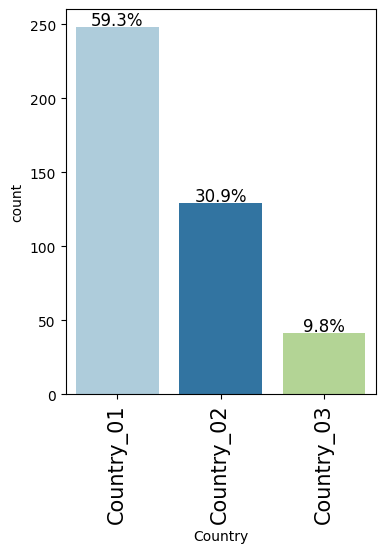

In [ ]:
labeled_barplot(df, 'Country', 90,perc=True)

**Observations:**

- 59% accidents occurred in Country_01,
- 31% accidents occurred in Country_02
- 10% accidents occurred in Country_03

#### `Local`

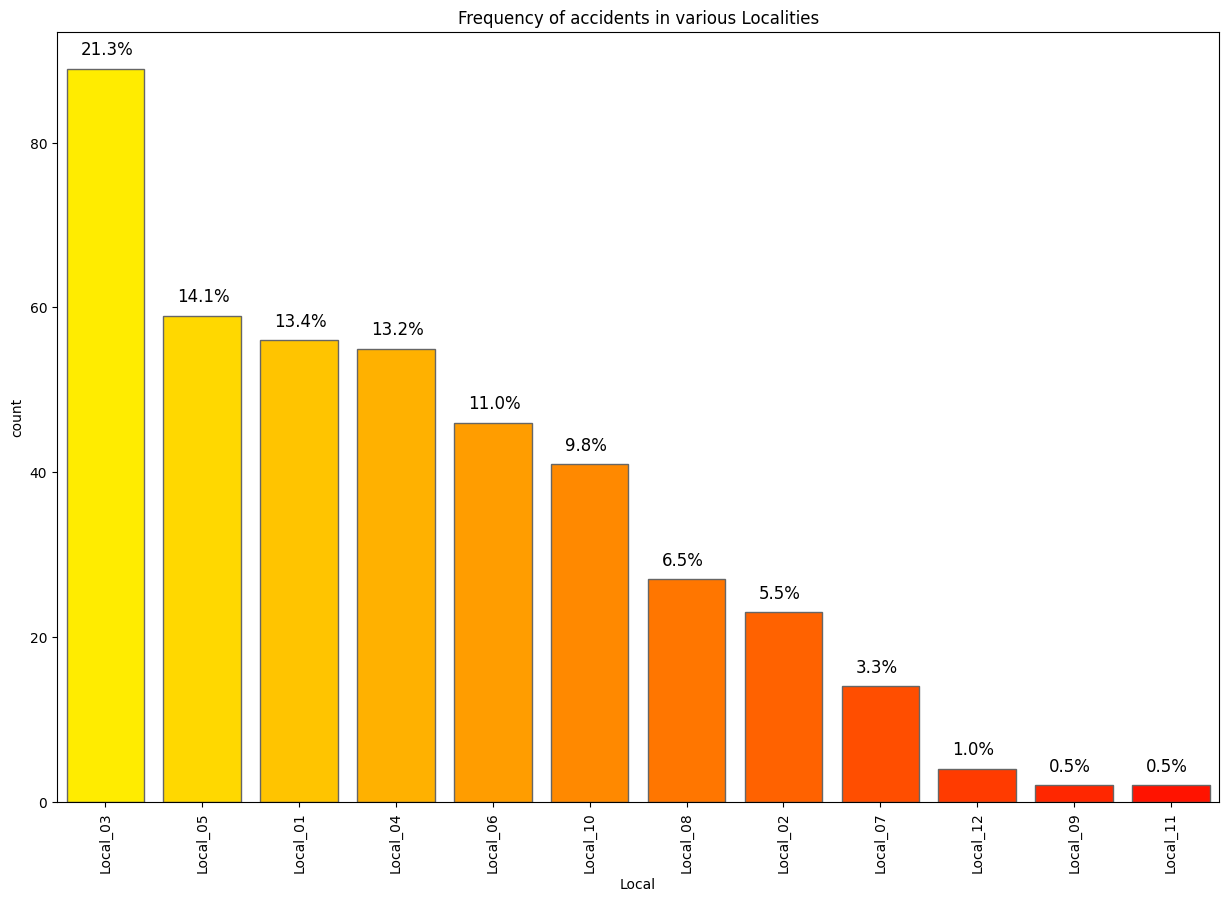

In [ ]:
# Locals Count
plt.figure(figsize = (15,10))
ax = sns.countplot(x = df['Local'], order=df['Local'].value_counts().index, palette = 'autumn_r', edgecolor='.4', saturation=1);

plt.title('Frequency of accidents in various Localities');
plt.xticks(rotation = 'vertical');

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (10, 10),
                 textcoords = 'offset points')

**Observations:**

- Local_03 has recorded maximum number of accidents which is approx 21% of all the plants in the country.
- This is followed by Local-05, Local-01 and so on.

#### `Industry Sector`

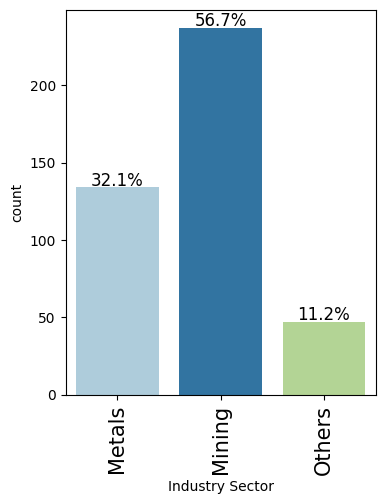

In [ ]:
labeled_barplot(df, 'Industry Sector', 90,perc=True)

**Observations:**

- 57% manufacturing plants belongs to Mining sector.
- 32% manufacturing plants belongs to Metals sector.
- 11% manufacturing plants belongs to Others sector.

#### `Accident Level` & `Potential Accident Level`

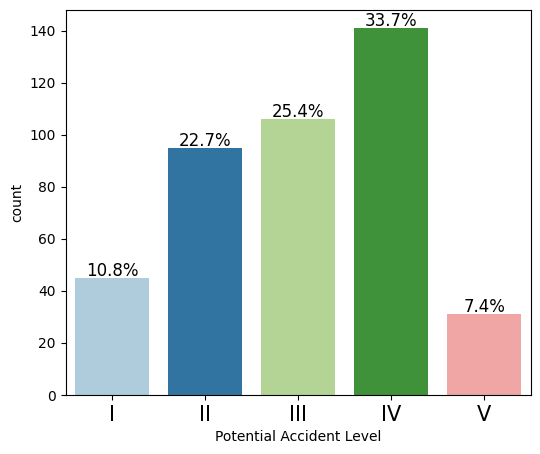

In [ ]:
labeled_barplot(df, 'Accident Level', 0,perc=True)
labeled_barplot(df, 'Potential Accident Level', 0,perc=True)

**Observations:**

- The number of accidents decreases as the Accident Level increases.
- Notice there is a significant difference between the severity of an incident, and the potential severity of the incident.
- The number of accidents increases as the Potential Accident Level increases until Type 4.

#### `Gender`

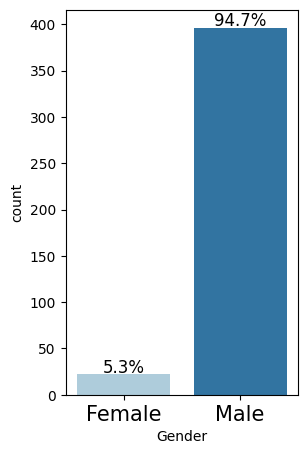

In [ ]:
labeled_barplot(df, 'Gender', 0,perc=True)

**Observations:**

- As a characteristic of the industry, there are more men working in this industry as compared to women.
- The dataset is biased towards Male employees.

#### `Employee Type`

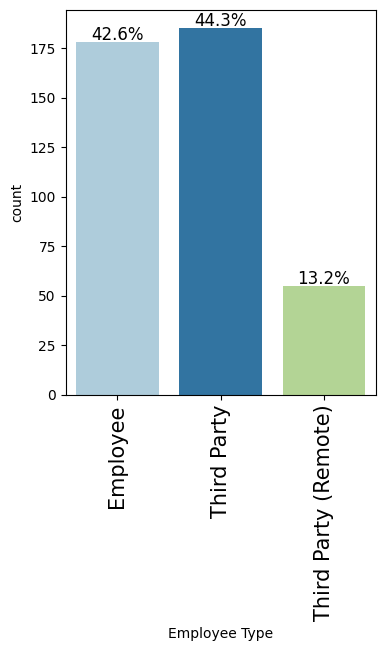

In [ ]:
labeled_barplot(df, 'Employee Type', 90,perc=True)


**Observations:**

- 44% Third party empoyees working in this industry.
- 43% own empoyees working in this industry.
- 13% Third party(Remote) empoyees working in this industry.

#### `Critical Risk`

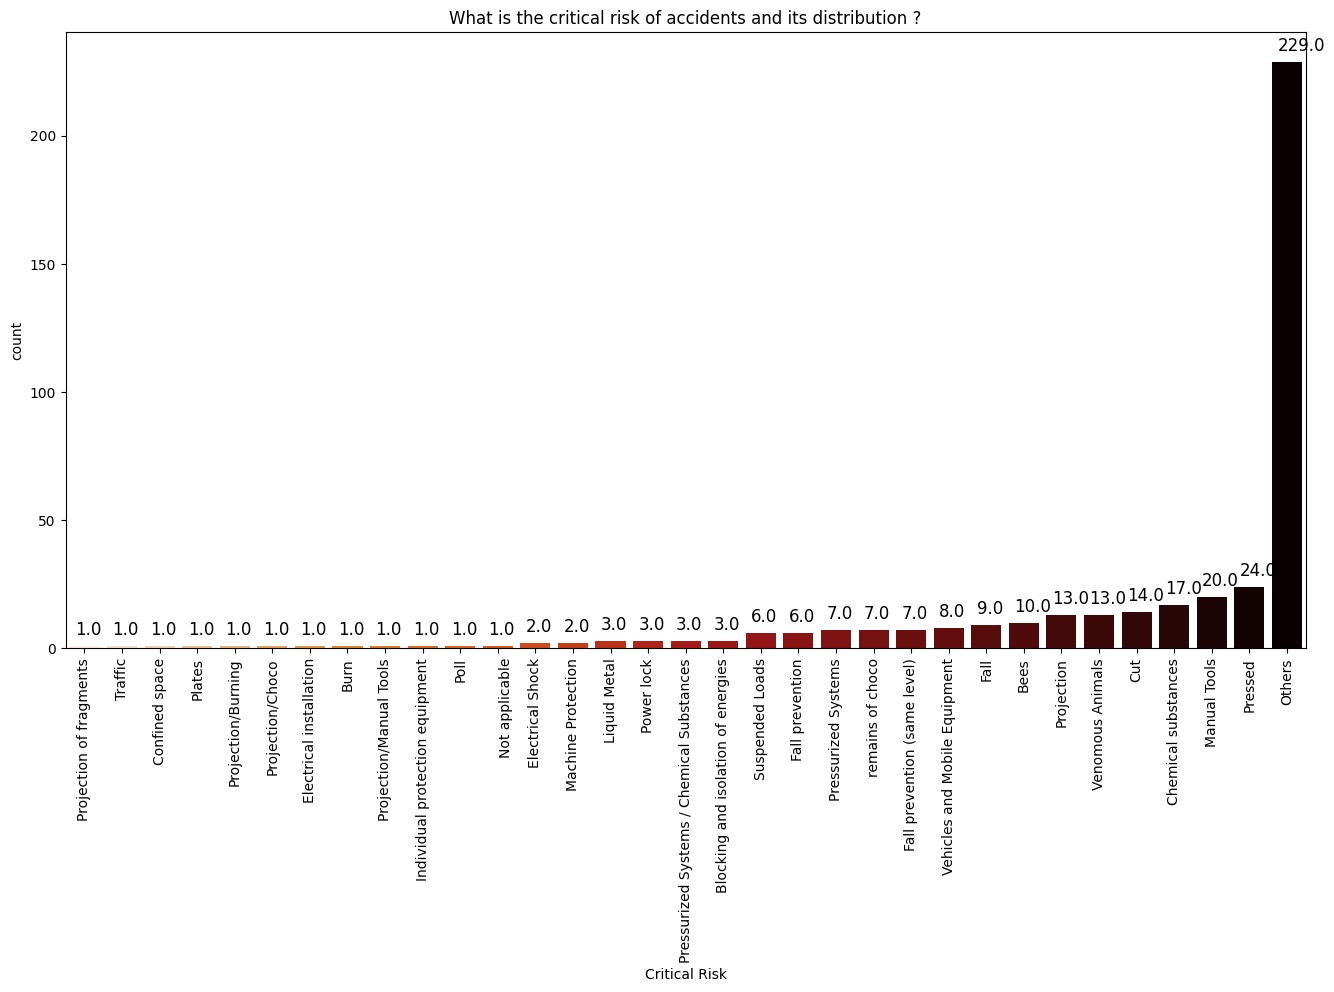

In [ ]:
# Critical Risk Count
plt.figure(figsize = (16,8))
ax = sns.countplot(x = df['Critical Risk'], order=df['Critical Risk'].value_counts().sort_values(ascending = True).index, palette = 'gist_heat_r');
plt.title('What is the critical risk of accidents and its distribution ?');
plt.xticks(rotation = 'vertical');

total = sum(df['Critical Risk'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (4, 8),
                 textcoords = 'offset points')

**Observations:**

- Most of the Critical Risks are classified as 'Others' that is almost 50% of the dataset, hence there are too many risks need to be classified precisely.
- This is followed by Pressed, Manual tools, Chemical substances, Cut etc

#### `Date`

In [ ]:
year_cnt = np.round(df['Year'].value_counts(normalize=True,sort=False) * 100)
print('*' *50)
print(year_cnt)
print('*' *50)
month_cnt = np.round(df['Month'].value_counts(normalize=True,sort=False) * 100)
print('*' *50)
print(month_cnt)
print('*' *50)
day_cnt = np.round(df['Day'].value_counts(normalize=True,sort=False) * 100)
print('*' *50)
print(day_cnt)
print('*' *50)
wday_cnt = np.round(df['Weekday'].value_counts(normalize=True,sort=False) * 100)
print('*' *50)
print(wday_cnt)
print('*' *50)

**************************************************
Year
2016    68.0
2017    32.0
Name: proportion, dtype: float64
**************************************************
**************************************************
Month
1      9.0
2     15.0
3     12.0
4     12.0
5     10.0
6     12.0
7      6.0
8      5.0
9      6.0
10     5.0
11     3.0
12     6.0
Name: proportion, dtype: float64
**************************************************
**************************************************
Day
1     3.0
2     3.0
6     3.0
8     6.0
10    3.0
12    3.0
16    5.0
17    4.0
19    3.0
26    2.0
28    1.0
30    3.0
4     5.0
7     3.0
21    2.0
25    4.0
9     3.0
15    3.0
14    3.0
13    4.0
20    3.0
18    4.0
22    4.0
24    4.0
29    3.0
27    2.0
3     2.0
5     3.0
11    4.0
31    2.0
23    4.0
Name: proportion, dtype: float64
**************************************************
**************************************************
Weekday
Friday       15.0
Saturday     13.0
Wednesday    15.0

**Observations:**

- There are high number of accidents in 2016 and less in 2017.
- Number of accidents are high in beginning of the year and it keeps decreasing later.
-Number of accidents are very high in particular days like 4, 8 and 16 in every month.
- More number of accidents happens on Tuesday and Thursday.

#### `Description`

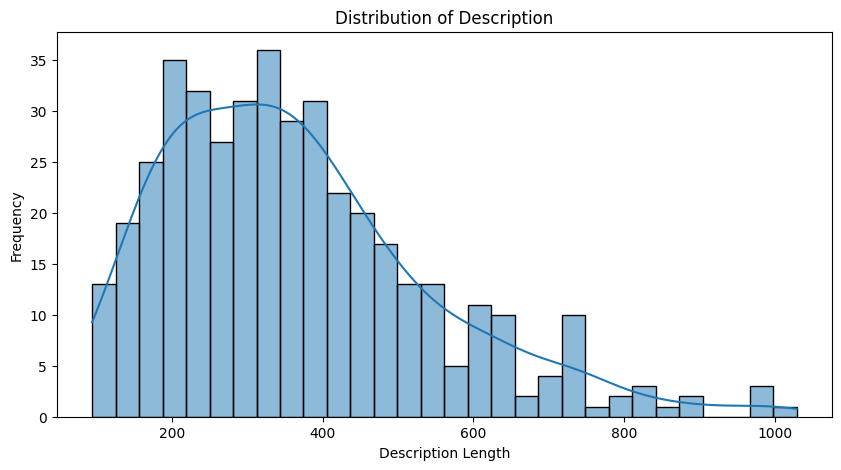

In [ ]:
df['desc_len'] = df['Description'].apply(len) #new column with length of words in description column

plt.figure(figsize=(10,5))
sns.histplot(df['desc_len'], bins=30, kde=True)
plt.title("Distribution of Description")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.show()

**Observations:**

- The Distribution is Right-Skewed, indicating most of the accident descriptions are short (less than 400 chars) and only for some cases it is medium to long.

##### WordCloud

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(df['Description'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, colormap='viridis').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Incident Descriptions")
plt.show()

1.	Most Frequent Terms
* The largest words (“employee”, “activity”, “operator”) appear most often in incident reports, indicating they are central to the majority of incidents.
2. Common Incident Themes
* Human Involvement: Words like employee, operator, worker, assistant, collaborator indicate high human presence in the events.
* Actions Leading to Incidents: Terms like causing, hit, cut, fall suggest physical contact or movement is often the cause.
* Equipment/Environment References: equipment, pipe, truck, pump, floor highlight frequent involvement of machinery and workplace infrastructure
* Situational Context: Words like time, moment, level, height, right hand, left hand may point to situational factors (e.g., location on site, part of the body affected).
3. Risk Indicators
* Words such as injury, accident, fall highlight safety concerns.
* Presence of height suggests possible fall-from-height risks.
* Right hand and left hand indicate hand injuries are common.


### **Bivariate Analysis**

#### `Potential Accident level` vs `Country`

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x='Country', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

total = sum(df['Country'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident Level Vs Country');
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations**:
- Country_01 has more number of severe accidents especially Level IV
- Country_02 has moderate accidents across all the levels
- Country_03 'level I' accidents are more compared to country_01 and country_02 but less severe accidents.

#### `Potential Accident level` vs `Local`

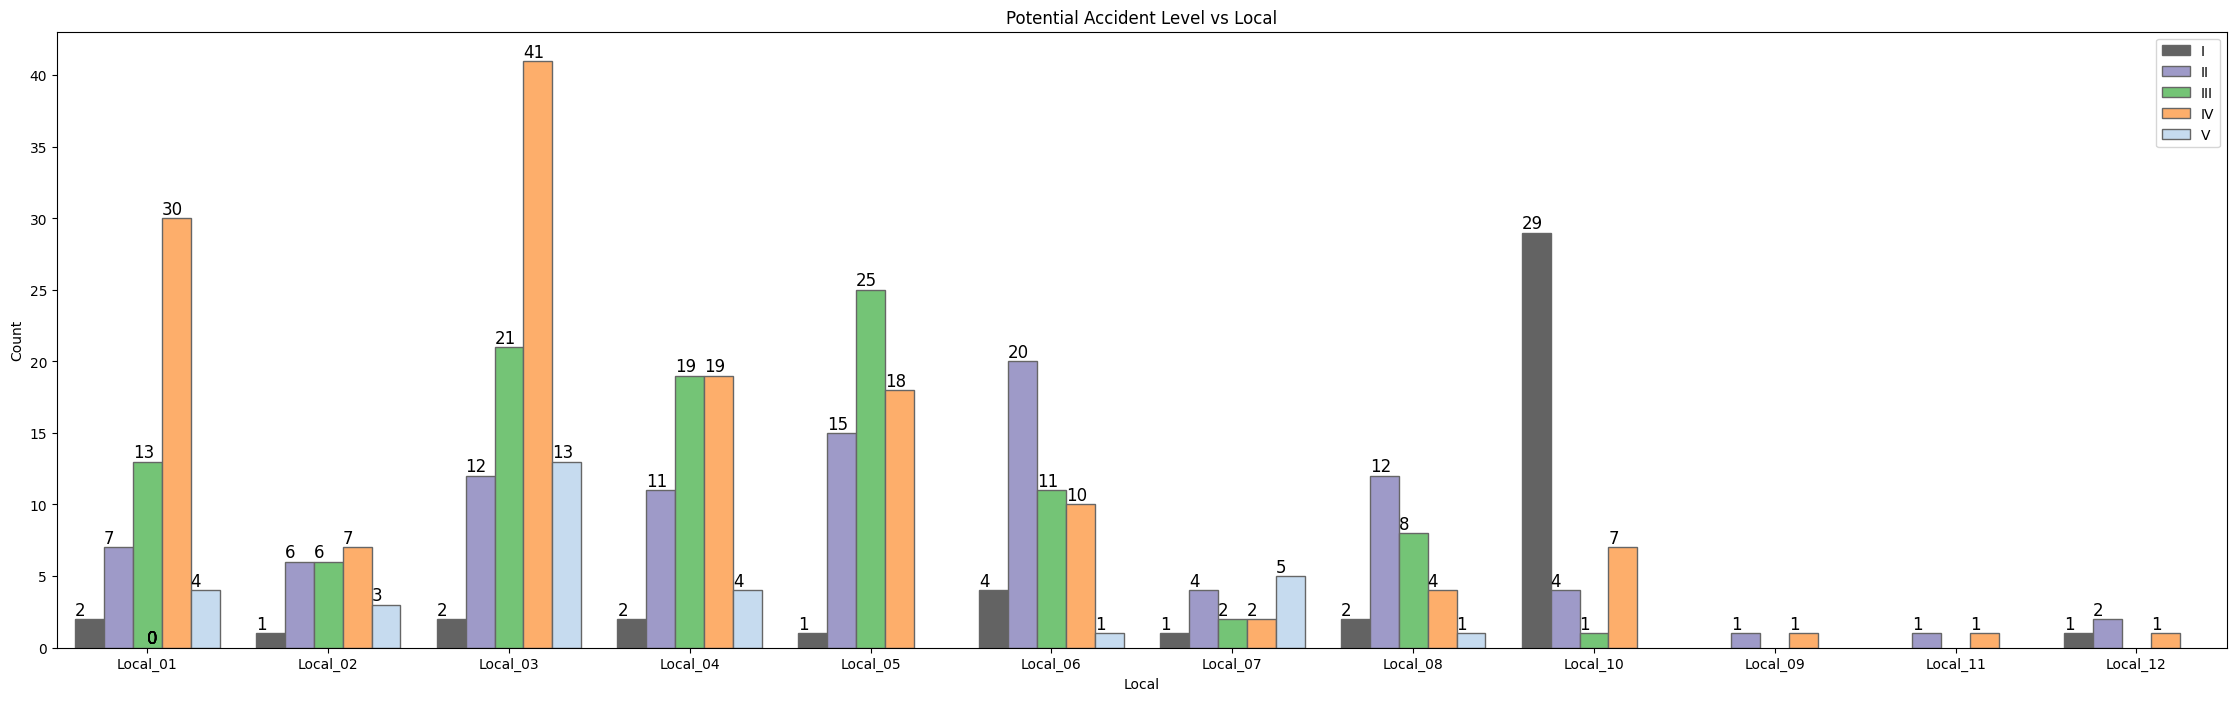

In [ ]:
plt.figure(figsize=(28,8))
ax = sns.countplot(data=df, x='Local', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='tab20c_r', edgecolor='.4', saturation=1)

total = sum(df['Local'].value_counts())
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident Level vs Local');
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations:**
- Local_03 is where most of the accidents happened followed by Local_10.

#### `Potential Accident level` vs `Industry Sector`

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x='Industry Sector', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='cool', edgecolor='1.0', saturation=1)

total = sum(df['Industry Sector'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident Level Vs Industry Sector');
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations:**
- Mining Industry has seen some accidents whose level is the most severe and the corresponding potential Accident level is also highest.
- This is followed by Metal industry and other.
- Severity levels of the incidents are more in Mining sector (rate of level 4 is slightly higher than the level 2 & 3)

#### `Potential Accident level` vs `Employee Type`

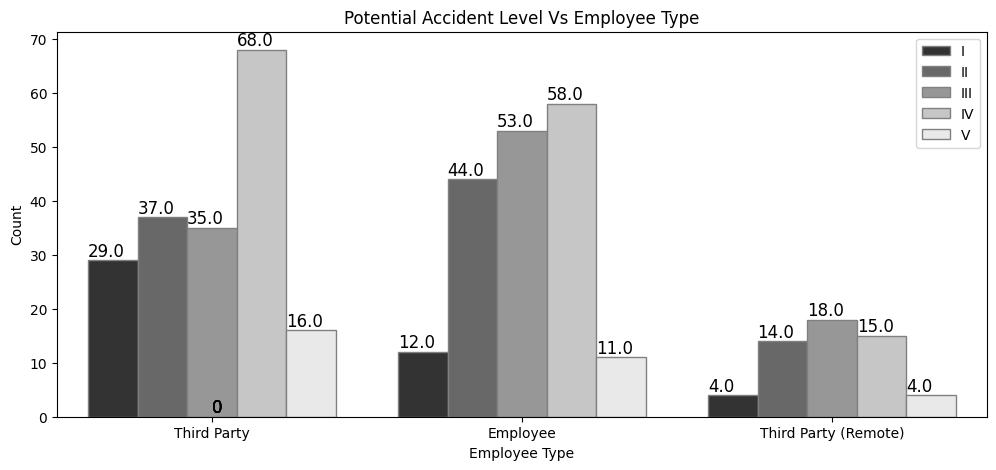

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x='Employee Type', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='Greys_r', edgecolor='.5', saturation=1);

total = sum(df['Employee Type'].value_counts())
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x(), p.get_height()),
                 size=12,
                 xytext = (0, 3),
                 textcoords = 'offset points')

plt.title('Potential Accident Level Vs Employee Type');
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations:**
- Third Party Employees were more involved in Accidents.

#### `Potential Accident level` vs `Critical Risk`

In [ ]:
plt.figure(figsize=(22,10))
ax = sns.countplot(data=df, x='Critical Risk', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index, palette='pastel', edgecolor='.4', saturation=1)

plt.title('Potential Accident Level Vs Critical Risk');
plt.xticks(rotation=90)
plt.ylabel('Count');
plt.legend(loc='upper right')

**Observations:**
- Most of the Potential Accident Levels are under critical risks classified as Others.

#### `Potential Accident level` vs `Gender`

In [ ]:
plt.figure(figsize=(12,5))
#sns.barplot(df['Gender'], df1['value'], hue=df1['Potential_Accident_Level'], palette='pastel', edgecolor='.4', saturation=1);
sns.countplot(data=df, x='Gender', hue='Potential Accident Level', hue_order=df['Potential Accident Level'].value_counts().sort_index().index)
plt.title('Potential Accident Level Vs Gender');
plt.ylabel('Count');

**Observations:**

- Males have a higher accident levels than females.
-There are many low risks at general accident level, but many high risks at potential accident level.

#### `Employee Type` vs `Gender`

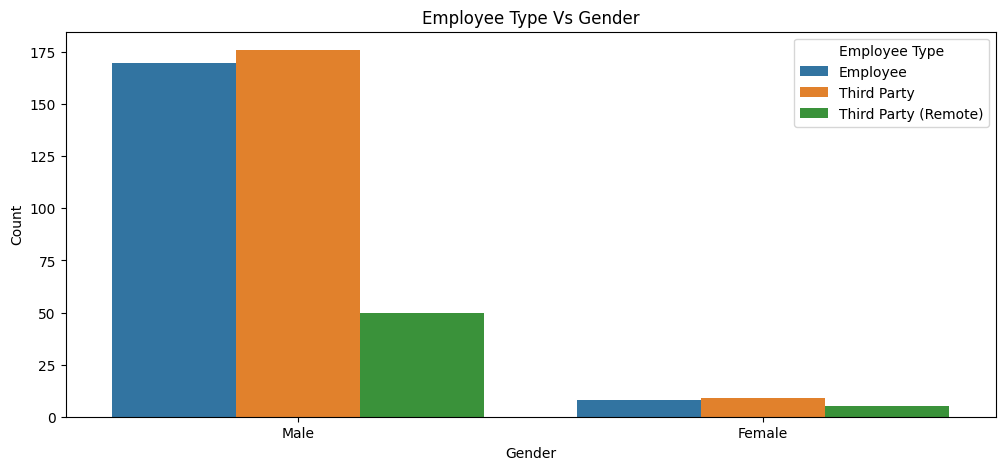

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Gender', hue='Employee Type', hue_order=df['Employee Type'].value_counts().sort_index().index)
plt.title('Employee Type Vs Gender');
plt.ylabel('Count');

**Observations:**

- Proportion of third party employees in each gender is equal.
- Proportion of third party(remote) employees in each gender is not equal.
- Proportion of own employees in each gender is not equal.

#### `Industry Sector` vs `Gender`

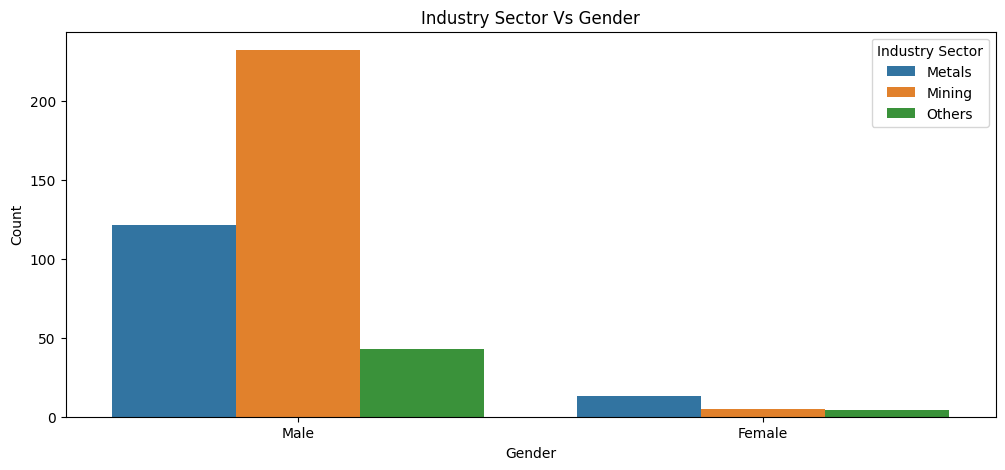

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Gender', hue='Industry Sector', hue_order=df['Industry Sector'].value_counts().sort_index().index)
plt.title('Industry Sector Vs Gender');
plt.ylabel('Count');

**Observations:**

- Proportion of Metals, Mining and Others sector employees in each gender are not equal.

#### `Correlation`

In [ ]:
# Encode categorical variables for correlation
df2= df[['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level','Potential Accident Level', 'Gender', 'Employee Type', 'Critical Risk', 'Description', 'desc_len']]

df_encoded = df2.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded

Date  Country  Local  Industry Sector  Accident Level  \
0   2016-01-01        0      0                1               0   
1   2016-01-02        1      1                1               0   
2   2016-01-06        0      2                1               0   
3   2016-01-08        0      3                1               0   
4   2016-01-10        0      3                1               3   
..         ...      ...    ...              ...             ...   
413 2017-07-04        0      3                1               0   
414 2017-07-04        0      2                1               0   
415 2017-07-05        1      8                0               0   
416 2017-07-06        1      4                0               0   
417 2017-07-09        0      3                1               0   

     Potential Accident Level  Gender  Employee Type  Critical Risk  \
0                           3       1              1             20   
1                           3       1              0             21   
2                           2       1              2             15   
3                           0       1              1             16   
4                           3       1              1             16   
..                        ...     ...            ...            ...   
413                         2       1              1             16   
414                         1       0              0             16   
415                         1       1              0             31   
416                         1       1              0              6   
417                         1       0              1             11   

     Description  desc_len  
0            398       457  
1            111       307  
2            240       314  
3             88       562  
4             16       487  
..           ...       ...  
413           93       220  
414          287       219  
415          123       251  
416          279       187  
417           20       208  

[418 rows x 11 columns]

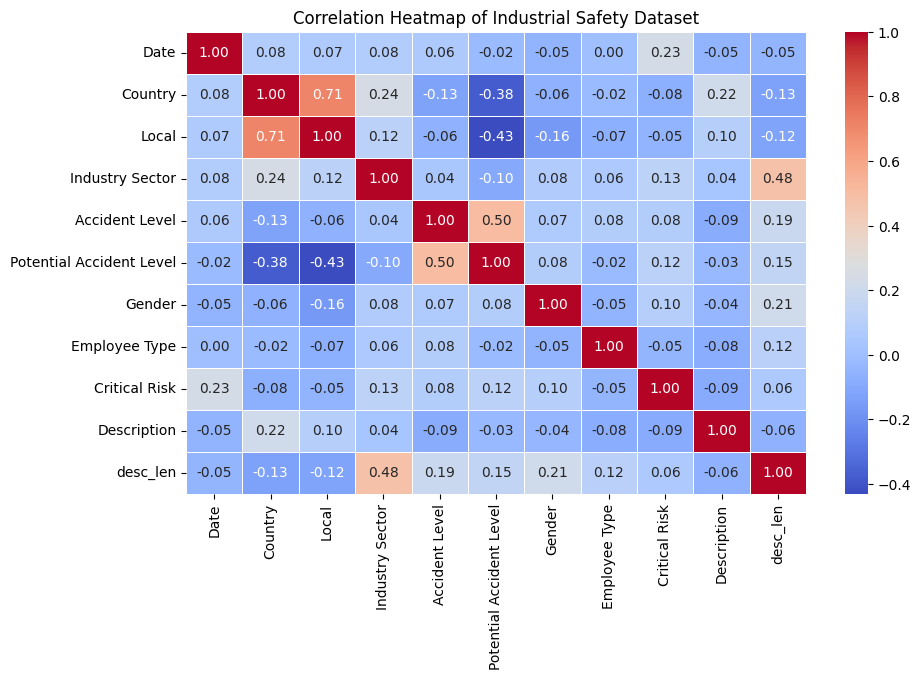

In [ ]:
# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Industrial Safety Dataset")
plt.show()

**Observations:**

- Countries -> Local show strong correlation (0.71), indicating redundancy
- Industry Sector -> description_length moderately correlated (0.48), meaning industry affects report detail.
- Severity fields (Accident Level, Potential Accident Level, Critical Risk) are largely independent.
- Overall low multicollinearity, good for modeling.

#### **Overall Observations**:
* Accident Level and Potential Accident Level show a strong correlation.
* Some Critical Risks consistently link to higher potential accident severity
* Gender and Employee Type status show weaker associations with potential severity.
* Plants in certain countries show systematically higher severity levels — this may point to:
  * Lower safety standards.
  * Higher operational complexity.
  * Differences in reporting culture.
* Certain Critical Risk categories map almost exclusively to high severity levels (e.g., Explosion → Mostly Level IV–VI).
* This creates a feature-target alignment that models can exploit, but also a risk of overfitting if categories are too granular.
* Cross-analysis of Industry Sector with severity shows some sectors (e.g., heavy manufacturing, chemicals) have more frequent high-severity accidents.
* Suggests potential class imbalance issues that we must handle via SMOTE or class weighting.

## **Text Preprocessing**

### Removing special characters from the text

In [ ]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [ ]:
# Applying the function to remove special characters
df['cleaned_text'] = df['Description'].apply(remove_special_characters)

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   

                                        cleaned_text  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub station MILPO located at level 170 ...  
3  Being 9 45 am approximately in the Nv 1880 CX ...

- We can observe that regex removed the special characters in the 3rd review, like '.', '-', +, and retained the alphabets.

### Lowercasing

In [ ]:
# changing the case of the text data to lower case
df['cleaned_text'] = df['cleaned_text'].str.lower()

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   

                                        cleaned_text  
0  while removing the drill rod of the jumbo 08 f...  
1  during the activation of a sodium sulphide pum...  
2  in the sub station milpo located at level 170 ...  
3  being 9 45 am approximately in the nv 1880 cx ...

- We can observe that all the text has now successfully been converted to lower case.

### Removing Extra White Space

In [ ]:
# removing extra whitespaces from the text
df['cleaned_text'] = df['cleaned_text'].str.strip()

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','cleaned_text']]

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   

                                        cleaned_text  
0  while removing the drill rod of the jumbo 08 f...  
1  during the activation of a sodium sulphide pum...  
2  in the sub station milpo located at level 170 ...  
3  being 9 45 am approximately in the nv 1880 cx ...

- Extra whitespaces are removed.

### Removing stopwords

* stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `Spacy` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Define a function to remove stopwords (excluding "not")
def remove_stopwords_spacy(text):
    # Create a custom stopword list excluding "not"
    stopwords = nlp.Defaults.stop_words - {"not"}

    # Process the text
    doc = nlp(text)

    # Filter tokens: keep if not a stopword or if it's "not"
    filtered_tokens = [token.text for token in doc if token.text.lower() not in stopwords]

    # Join back into a string
    clean_text = ' '.join(filtered_tokens)

    return clean_text

In [ ]:
# Applying the function to remove stop words using the NLTK library
df['cleaned_text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords_spacy)

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','cleaned_text_without_stopwords']]

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   

                      cleaned_text_without_stopwords  
0  removing drill rod jumbo 08 maintenance superv...  
1  activation sodium sulphide pump piping uncoupl...  
2  sub station milpo located level 170 collaborat...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...

### Lemmatization

*Stemming Vs Lemmetization*

- Stemming cuts words to their root form crudely (e.g., running ->runn)
- Lemmatization reduces words to their dictionary/base form properly (e.g., running -> run)
- Why lemmatization: It’s more accurate and preserves the correct meaning of words.



In [ ]:
# Lemmatization
def apply_lemmatization(text):

    # Load the English language model in spaCy
    nlp = spacy.load("en_core_web_sm")
    # Create a Doc object
    doc = nlp(text)
    lemma_text = []
    # Lemmatize each token and print the result
    for token in doc:
      lemma = token.lemma_
      lemma_text.append(lemma)

    return ' '.join(lemma_text)

In [ ]:
# Applying the function to perform lemmatization
df['final_cleaned_text'] = df['cleaned_text_without_stopwords'].apply(apply_lemmatization)

In [ ]:
# checking a couple of instances of cleaned data
df.loc[0:3, ['Description','cleaned_text_without_stopwords', 'final_cleaned_text']]
#df['final_cleaned_text'] = df['cleaned_text_without_stopwords']

Description  \
0  While removing the drill rod of the Jumbo 08 f...   
1  During the activation of a sodium sulphide pum...   
2  In the sub-station MILPO located at level +170...   
3  Being 9:45 am. approximately in the Nv. 1880 C...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...

**Cleaning and exporting the data to excel file**

In [ ]:
df_to_xl = df.copy()
df_to_xl.drop(columns=['Description', 'desc_len', 'cleaned_text', 'cleaned_text_without_stopwords'], inplace=True)
df_to_xl.to_excel("/content/drive/My Drive/Cap_Project/Work/clean_data.xlsx", index=False)
df_to_xl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      418 non-null    datetime64[ns]
 1   Country                   418 non-null    object        
 2   Local                     418 non-null    object        
 3   Industry Sector           418 non-null    object        
 4   Accident Level            418 non-null    object        
 5   Potential Accident Level  418 non-null    object        
 6   Gender                    418 non-null    object        
 7   Employee Type             418 non-null    object        
 8   Critical Risk             418 non-null    object        
 9   Year                      418 non-null    int64         
 10  Month                     418 non-null    int64         
 11  Day                       418 non-null    int64         
 12  Weekday               

## **Design, Train and Test Basic Machine Learning Classifiers**

### **Model Building - Approach**

We will build 2 models.

* **Model 1**:
  * Target Variable = Potential Accident Level
  * We will drop column 'Accident Level' from the dataset to proceed.

* **Model 2**:
  * Target Variable = Accident Level.
  * Output of Model 1 (Potential Accident Level) will be used with other columns to predict target variable of Model 2.

### **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            418 non-null    datetime64[ns]
 1   Country                         418 non-null    object        
 2   Local                           418 non-null    object        
 3   Industry Sector                 418 non-null    object        
 4   Accident Level                  418 non-null    object        
 5   Potential Accident Level        418 non-null    object        
 6   Gender                          418 non-null    object        
 7   Employee Type                   418 non-null    object        
 8   Critical Risk                   418 non-null    object        
 9   Description                     418 non-null    object        
 10  Year                            418 non-null    int64         
 11  Month 

In [ ]:
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  desc_len  \
0     Friday          53       457   
1   Saturday          53       307   
2  Wednesday           1       314   
3     Friday           1       562   
4     Sunday           1       487   

                                        cleaned_text  \
0  while removing the drill rod of the jumbo 08 f...   
1  during the activation of a sodium sulphide pum...   
2  in the sub station milpo located at level 170 ...   
3  being 9 45 am approximately in the nv 1880 cx ...   
4  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Apply Label Encoding
le = LabelEncoder()
df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)
df['Weekday'] = LabelEncoder().fit_transform(df['Weekday']).astype(np.int8)

In [ ]:
df.head()

Date     Country     Local Industry Sector  Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining               0   
1 2016-01-02  Country_02  Local_02          Mining               0   
2 2016-01-06  Country_01  Local_03          Mining               0   
3 2016-01-08  Country_01  Local_04          Mining               0   
4 2016-01-10  Country_01  Local_04          Mining               3   

   Potential Accident Level Gender         Employee Type        Critical Risk  \
0                         3   Male           Third Party              Pressed   
1                         3   Male              Employee  Pressurized Systems   
2                         2   Male  Third Party (Remote)         Manual Tools   
3                         0   Male           Third Party               Others   
4                         3   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

   Weekday  WeekofYear                                       cleaned_text  \
0        0          53  while removing the drill rod of the jumbo 08 f...   
1        2          53  during the activation of a sodium sulphide pum...   
2        6           1  in the sub station milpo located at level 170 ...   
3        0           1  being 9 45 am approximately in the nv 1880 cx ...   
4        3           1  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Display accident level counts
df['Potential Accident Level'].value_counts().sort_index()

Potential Accident Level
0     45
1     95
2    106
3    141
4     31
Name: count, dtype: int64

In [ ]:
X = df.drop(['Accident Level','Potential Accident Level','cleaned_text','cleaned_text_without_stopwords','Description'], axis = 1)
y = df['Potential Accident Level']

In [ ]:
X
#y.value_counts()

Date     Country     Local Industry Sector  Gender  \
0   2016-01-01  Country_01  Local_01          Mining    Male   
1   2016-01-02  Country_02  Local_02          Mining    Male   
2   2016-01-06  Country_01  Local_03          Mining    Male   
3   2016-01-08  Country_01  Local_04          Mining    Male   
4   2016-01-10  Country_01  Local_04          Mining    Male   
..         ...         ...       ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining    Male   
414 2017-07-04  Country_01  Local_03          Mining  Female   
415 2017-07-05  Country_02  Local_09          Metals    Male   
416 2017-07-06  Country_02  Local_05          Metals    Male   
417 2017-07-09  Country_01  Local_04          Mining  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  
0          0          53  remove drill rod jumbo 08 maintenance supervis...  
1          2          53  activation sodium sulphide pump pipe uncouple ...  
2          6           1  sub station milpo locate level 170 collaborato...  
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...  
4          3           1  approximately 11 45 m circumstance mechanic an...  
..       ...         ...                                                ...  
413        5          27  approximately 5 00 m approximately lift kelly ...  
414        5          27  collaborator move infrastructure office julio ...  
415        6          27  environmental monitoring activity area employe...  
416        4          27  employee perform activity strip cathode pull c...  
417        3          27  10 00 m assistant clean floor module e central...  

[418 rows x 13 columns]

In [ ]:
# Columns
categorical_cols = ['Country', 'Local', 'Industry Sector', 'Gender','Employee Type', 'Critical Risk']
numeric_cols = ['Month','Day','Weekday','WeekofYear']
text_col = 'final_cleaned_text'

# --- Structured-only preprocessor (for Word2Vec / GloVe / Transformers)
structured_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

### **Model 1**

#### Spliting the Data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (292, 13) (292,)
Validation: (63, 13) (63,)
Test: (63, 13) (63,)


##### Preprocessing on Split Data


In [ ]:
# Fit structured features
structured_train = structured_preprocessor.fit_transform(X_train)
structured_val = structured_preprocessor.transform(X_val)
structured_test = structured_preprocessor.transform(X_test)

In [ ]:
print('Shape of Split Data after Preprocessing/Encoding:')
print('*'*50)
print("Train:", structured_train.shape)
print("Validation:", structured_val.shape)
print("Test:", structured_test.shape)

Shape of Split Data after Preprocessing/Encoding:
**************************************************
Train: (292, 55)
Validation: (63, 55)
Test: (63, 55)


#### Preparation of Various Embeddings on Original Data

##### TF-IDF

In [ ]:
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf = tfidf_preprocessor.fit_transform(X_train)
X_val_tfidf   = tfidf_preprocessor.transform(X_val)
X_test_tfidf  = tfidf_preprocessor.transform(X_test)

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)
#print("TF-IDF shapes:", X_train_tfidf.shape, X_test_tfidf.shape)

TF-IDF shapes: (292, 2057) (63, 2057) (63, 2057)


##### Word2Vec

In [ ]:
# Word2Vec + Structured
def tokenize_text(text):
    return text.split()

tokenized_train = X_train[text_col].apply(tokenize_text)
tokenized_val = X_val[text_col].apply(tokenize_text)
tokenized_test = X_test[text_col].apply(tokenize_text)

In [ ]:
# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train = np.vstack(tokenized_train.apply(lambda x: document_vector(x, w2v_model)))
w2v_val   = np.vstack(tokenized_val.apply(lambda x: document_vector(x, w2v_model)))
w2v_test  = np.vstack(tokenized_test.apply(lambda x: document_vector(x, w2v_model)))

X_train_w2v = np.hstack([w2v_train, structured_train.toarray()])
X_val_w2v   = np.hstack([w2v_val, structured_val.toarray()])
X_test_w2v  = np.hstack([w2v_test, structured_test.toarray()])

print("Word2Vec shapes:", X_train_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)
#print("Word2Vec shapes:", X_train_w2v.shape, X_test_w2v.shape)

Word2Vec shapes: (292, 355) (63, 355) (63, 355)


##### GloVe

In [ ]:
# Load GloVe vectors
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train = np.vstack(tokenized_train.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_val   = np.vstack(tokenized_val.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test  = np.vstack(tokenized_test.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove = np.hstack([glove_train, structured_train.toarray()])
X_val_glove   = np.hstack([glove_val, structured_val.toarray()])
X_test_glove  = np.hstack([glove_test, structured_test.toarray()])

print("GloVe shapes:", X_train_glove.shape, X_val_glove.shape, X_test_glove.shape)
#print("GloVe shapes:", X_train_glove.shape, X_test_glove.shape)

GloVe shapes: (292, 155) (63, 155) (63, 155)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

bert_train = transformer_model.encode(X_train[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_val   = transformer_model.encode(X_val[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test  = transformer_model.encode(X_test[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert = np.hstack([bert_train, structured_train.toarray()])
X_val_bert   = np.hstack([bert_val, structured_val.toarray()])
X_test_bert  = np.hstack([bert_test, structured_test.toarray()])

print("all-MiniLM-L6-v2 shapes:", X_train_bert.shape, X_val_bert.shape, X_test_bert.shape)
#print("all-MiniLM-L6-v2 shapes:", X_train_bert.shape, X_test_bert.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

all-MiniLM-L6-v2 shapes: (292, 439) (63, 439) (63, 439)


#### Model Building (Original Data)

In [ ]:
#function to evavulate the models and print its metrics (accuracy, F1)
def evaluate_models(models_dict, feature_sets, y_train, y_val):
    results = []

    for feat_name, (X_tr, X_val) in feature_sets.items():
        for model_name, model in models_dict.items():
            model = clone(model)  # Avoid state carryover

            # Handle sparse/dense conversion for GaussianNB
            if model_name == "GaussianNB":
                if hasattr(X_tr, "toarray"):
                    X_tr_use = X_tr.toarray()
                    X_val_use = X_val.toarray()
                else:
                    X_tr_use = X_tr
                    X_val_use = X_val
            else:
                X_tr_use = X_tr
                X_val_use = X_val

            # Skip MultinomialNB if data contains negatives
            if model_name == "MultinomialNB":
                try:
                    if hasattr(X_tr_use, "data"):
                        has_negatives = np.any(np.asarray(X_tr_use.data) < 0)
                    else:
                        has_negatives = np.any(X_tr_use < 0)

                    if has_negatives:
                        print(f" Skipping {model_name} for {feat_name} due to negative values.")
                        continue
                except Exception as e:
                    print(f" Error checking negatives for {model_name} on {feat_name}: {e}")
                    continue

            try:
                model.fit(X_tr_use, y_train)
                y_pred = model.predict(X_val_use)
                acc = accuracy_score(y_val, y_pred)
                f1 = f1_score(y_val, y_pred, average='weighted')
                pres = precision_score(y_val, y_pred, average='weighted')
                recal = recall_score(y_val, y_pred, average='weighted')

                results.append({
                    "Embedding": feat_name,
                    "Model": model_name,
                    "Validation Accuracy": acc,
                    "Validation F1": f1,
                    "Validation Precision": pres,
                    "Validation Recall": recal
                })

                print(f" {feat_name} + {model_name} --> Precision: {pres:.4f}, Recall: {recal:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}")

            except Exception as e:
                print(f" Error with {feat_name} + {model_name}: {e}")

    return results

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, n_jobs=-1, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "MultinomialNB": MultinomialNB(alpha=0.5),
    "SVM": SVC(kernel='linear', C=1.0),
    "GaussianNB": GaussianNB()
}

In [ ]:
feature_sets = {
    "TF-IDF": (X_train_tfidf, X_val_tfidf),
    "Word2Vec": (X_train_w2v, X_val_w2v),
    "GloVe": (X_train_glove, X_val_glove),
    "Transformer": (X_train_bert, X_val_bert)
}

In [ ]:
#results = evaluate_models(models, feature_sets, y_train_enc, y_val_enc)
results = evaluate_models(models, feature_sets, y_train, y_val)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# --- Results DataFrame ---
results_df = pd.DataFrame(results)

# Sort by 'Accuracy' in descending order, then by 'F1' in descending order
sorted_results_df = results_df.sort_values(by=['Validation Accuracy', 'Validation F1'], ascending=[False, False])
sorted_results_df_reset = sorted_results_df.reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1):")
sorted_results_df_reset.head(10)


Final Results (sorted based on Accuracy and F1):


Embedding                Model  Validation Accuracy  Validation F1  \
0       TF-IDF                  SVM             0.507937       0.513632   
1     Word2Vec                  SVM             0.507937       0.502475   
2       TF-IDF        Random Forest             0.507937       0.486950   
3       TF-IDF  Logistic Regression             0.492063       0.474625   
4  Transformer                  SVM             0.476190       0.474495   
5     Word2Vec  Logistic Regression             0.476190       0.456816   
6        GloVe        Random Forest             0.460317       0.435760   
7  Transformer  Logistic Regression             0.444444       0.428166   
8        GloVe              XGBoost             0.444444       0.427131   
9        GloVe                  SVM             0.428571       0.423009   

   Validation Precision  Validation Recall  
0              0.550028           0.507937  
1              0.543884           0.507937  
2              0.544444           0.507937  
3              0.479107           0.492063  
4              0.505656           0.476190  
5              0.449735           0.476190  
6              0.525097           0.460317  
7              0.419312           0.444444  
8              0.425549           0.444444  
9              0.427699           0.428571

**Observations**
- SVM Model with TF-IDF embedding gives Highest Accuracy of 51%, Precision of 55% and F1 score of 51.5% on validation data.

#### Checking Test Data Performance

In [ ]:
# ================================
# Final Test Evaluation Block
# ================================
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import vstack as sp_vstack

# --- Pick top 3 candidates from validation leaderboard ---
best_candidates = [
    ("TF-IDF", "SVM"),
    ("Word2Vec", "SVM"),
    ("TF-IDF", "Random Forest")
]

test_results = []

for best_emb, best_model_name in best_candidates:
    print("\n" + "="*40)
    print(f"Evaluating {best_emb} + {best_model_name} on Test Set")
    print("="*40)

    # Select feature matrices
    if best_emb == "TF-IDF":
        X_train_final = sp_vstack([X_train_tfidf, X_val_tfidf])
        X_test_final  = X_test_tfidf
        #y_train_final_enc = np.concatenate([y_train_tfidf, y_val])
    elif best_emb == "Word2Vec":
        X_train_final = np.vstack([X_train_w2v, X_val_w2v])
        X_test_final  = X_test_w2v
        #y_train_final_enc = np.concatenate([y_train_w2v, y_val])
    elif best_emb == "GloVe":
        X_train_final = np.vstack([X_train_glove, X_val_glove])
        X_test_final  = X_test_glove
        #y_train_final_enc = np.concatenate([y_train_glove, y_val])
    elif best_emb == "Transformer":
        X_train_final = np.vstack([X_train_bert, X_val_bert])
        X_test_final  = X_test_bert
        #y_train_final_enc = np.concatenate([y_train_bert, y_val])

    y_train_final_enc = np.concatenate([y_train, y_val])

    # Clone & train model
    model = clone(models[best_model_name])
    model.fit(X_train_final, y_train_final_enc)

    # Predictions
    y_test_pred = model.predict(X_test_final)

    # Metrics
    acc = accuracy_score(y_test, y_test_pred)
    f1  = f1_score(y_test, y_test_pred, average="weighted")

    test_results.append({
        "Embedding": best_emb,
        "Model": best_model_name,
        "Test Accuracy": acc,
        "Test F1": f1
    })


Evaluating TF-IDF + SVM on Test Set

Evaluating Word2Vec + SVM on Test Set

Evaluating TF-IDF + Random Forest on Test Set


In [ ]:
test_results_df = pd.DataFrame(test_results)
display(test_results_df.sort_values(by=['Test Accuracy', 'Test F1'], ascending=[False, False]))

Embedding          Model  Test Accuracy   Test F1
2    TF-IDF  Random Forest       0.428571  0.405864
1  Word2Vec            SVM       0.412698  0.411220
0    TF-IDF            SVM       0.365079  0.362233

**Observations:**

- Random Forest Model with TF-IDF embedding gives Highest Accuracy of 43% and F1 score of 41% on test data.
- Since the Test Accuracy and F1 score is not high, we can try model building with Upsampled Training Data.

#### Preparation of Various Embeddings on Upsampled Training Data

##### TF-IDF

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ------------------------------
# TF-IDF + Structured + SMOTE
# ------------------------------
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf = tfidf_preprocessor.fit_transform(X_train)
X_val_tfidf   = tfidf_preprocessor.transform(X_val)
X_test_tfidf  = tfidf_preprocessor.transform(X_test)

print("Before SMOTE (TF-IDF):", Counter(y_train))
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res_tfidf, y_train_res_tfidf = smote.fit_resample(X_train_tfidf, y_train)
print("After SMOTE (TF-IDF):", Counter(y_train_res_tfidf))

print("TF-IDF shapes:", X_train_res_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)

Before SMOTE (TF-IDF): Counter({3: 99, 2: 74, 1: 66, 0: 31, 4: 22})
After SMOTE (TF-IDF): Counter({1: 99, 0: 99, 4: 99, 3: 99, 2: 99})
TF-IDF shapes: (495, 2057) (63, 2057) (63, 2057)


##### Word2Vec

In [ ]:
# ------------------------------
# Word2Vec + Structured + SMOTE
# ------------------------------
def tokenize_text(text):
    return text.split()

tokenized_train = X_train[text_col].apply(tokenize_text)
tokenized_val   = X_val[text_col].apply(tokenize_text)
tokenized_test  = X_test[text_col].apply(tokenize_text)

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train = np.vstack(tokenized_train.apply(lambda x: document_vector(x, w2v_model)))
w2v_val   = np.vstack(tokenized_val.apply(lambda x: document_vector(x, w2v_model)))
w2v_test  = np.vstack(tokenized_test.apply(lambda x: document_vector(x, w2v_model)))

X_train_w2v = np.hstack([w2v_train, structured_train.toarray()])
X_val_w2v   = np.hstack([w2v_val, structured_val.toarray()])
X_test_w2v  = np.hstack([w2v_test, structured_test.toarray()])

print("Before SMOTE (Word2Vec):", Counter(y_train))
X_train_res_w2v, y_train_res_w2v = smote.fit_resample(X_train_w2v, y_train)
print("After SMOTE (Word2Vec):", Counter(y_train_res_w2v))

print("Word2Vec shapes:", X_train_res_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)

Before SMOTE (Word2Vec): Counter({3: 99, 2: 74, 1: 66, 0: 31, 4: 22})
After SMOTE (Word2Vec): Counter({1: 99, 0: 99, 4: 99, 3: 99, 2: 99})
Word2Vec shapes: (495, 355) (63, 355) (63, 355)


##### GloVe

In [ ]:
# ------------------------------
# GloVe + Structured + SMOTE
# ------------------------------
#please change the path below to point your word2vec file
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()

        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train = np.vstack(tokenized_train.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_val   = np.vstack(tokenized_val.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test  = np.vstack(tokenized_test.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove = np.hstack([glove_train, structured_train.toarray()])
X_val_glove   = np.hstack([glove_val, structured_val.toarray()])
X_test_glove  = np.hstack([glove_test, structured_test.toarray()])

print("Before SMOTE (GloVe):", Counter(y_train))
X_train_res_glove, y_train_res_glove = smote.fit_resample(X_train_glove, y_train)
print("After SMOTE (GloVe):", Counter(y_train_res_glove))

print("GloVe shapes:", X_train_res_glove.shape, X_val_glove.shape, X_test_glove.shape)


Before SMOTE (GloVe): Counter({3: 99, 2: 74, 1: 66, 0: 31, 4: 22})
After SMOTE (GloVe): Counter({1: 99, 0: 99, 4: 99, 3: 99, 2: 99})
GloVe shapes: (495, 155) (63, 155) (63, 155)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
# ------------------------------
# all-MiniLM-L6-v2 + Structured + SMOTE
# ------------------------------
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

bert_train = transformer_model.encode(X_train[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_val   = transformer_model.encode(X_val[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test  = transformer_model.encode(X_test[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert = np.hstack([bert_train, structured_train.toarray()])
X_val_bert   = np.hstack([bert_val, structured_val.toarray()])
X_test_bert  = np.hstack([bert_test, structured_test.toarray()])

print("Before SMOTE (all-MiniLM-L6-v2):", Counter(y_train))
X_train_res_bert, y_train_res_bert = smote.fit_resample(X_train_bert, y_train)
print("After SMOTE (all-MiniLM-L6-v2):", Counter(y_train_res_bert))

print("all-MiniLM-L6-v2 shapes:", X_train_res_bert.shape, X_val_bert.shape, X_test_bert.shape)


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Before SMOTE (all-MiniLM-L6-v2): Counter({3: 99, 2: 74, 1: 66, 0: 31, 4: 22})
After SMOTE (all-MiniLM-L6-v2): Counter({1: 99, 0: 99, 4: 99, 3: 99, 2: 99})
all-MiniLM-L6-v2 shapes: (495, 439) (63, 439) (63, 439)


#### Model Building (Upsampled Data)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import clone
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Define Models
# =========================================================
# Compute class weights for encoded labels
classes = np.unique(y_train)
class_weight_vals = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {c: w for c, w in zip(classes, class_weight_vals)}

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, n_jobs=-1, class_weight="balanced", multi_class="auto"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced_subsample"
    ),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="mlogloss", n_jobs=-1, random_state=42,
        tree_method="hist", max_depth=6, n_estimators=400
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=400, random_state=42, n_jobs=-1,
        class_weight=class_weight_dict
    ),
    "Linear SVM": LinearSVC(
        C=1.0, class_weight="balanced", dual=False
    ),
    "MultinomialNB": MultinomialNB(alpha=0.5),
    "GaussianNB": GaussianNB()
}

In [ ]:

# Define Feature Sets (already preprocessed + SMOTE applied for train)
# =========================================================
feature_sets = {
    "TF-IDF": (X_train_res_tfidf, X_val_tfidf),
    "Word2Vec": (X_train_res_w2v, X_val_w2v),
    "GloVe": (X_train_res_glove, X_val_glove),
    "Transformer": (X_train_res_bert, X_val_bert)
}

# Match resampled y labels to each embedding
y_train_dict = {
    "TF-IDF": y_train_res_tfidf,
    "Word2Vec": y_train_res_w2v,
    "GloVe": y_train_res_glove,
    "Transformer": y_train_res_bert
}

In [ ]:
# Evaluation Function (Validation Set Only)
# =========================================================
def evaluate_models(models_dict, feature_sets, y_train_dict, y_val_enc):
    """
    Trains and evaluates models on validation set across embeddings.
    Returns DataFrame with accuracy and F1 scores.
    """
    results = []

    for feat_name, (X_tr, X_val) in feature_sets.items():
        y_train_use = y_train_dict[feat_name]

        for model_name, model in models_dict.items():
            model = clone(model)  # fresh instance per run

            # Handle sparse/dense conversion for GaussianNB
            if model_name == "GaussianNB":
                if hasattr(X_tr, "toarray"):
                    X_tr_use, X_val_use = X_tr.toarray(), X_val.toarray()
                else:
                    X_tr_use, X_val_use = X_tr, X_val
            else:
                X_tr_use, X_val_use = X_tr, X_val

            # Skip MultinomialNB for embeddings with negative values
            if model_name == "MultinomialNB":
                try:
                    if hasattr(X_tr_use, "data"):
                        has_negatives = np.any(np.asarray(X_tr_use.data) < 0)
                    else:
                        has_negatives = np.any(X_tr_use < 0)
                    if has_negatives:
                        print(f" Skipping {model_name} for {feat_name} due to negative values.")
                        continue
                except Exception as e:
                    print(f" Error checking negatives for {model_name} on {feat_name}: {e}")
                    continue

            try:
                # Train and predict
                model.fit(X_tr_use, y_train_use)
                y_pred = model.predict(X_val_use)

                # Metrics
                acc = accuracy_score(y_val_enc, y_pred)
                f1 = f1_score(y_val_enc, y_pred, average='weighted')
                pres = precision_score(y_val_enc, y_pred, average='weighted')
                recal = recall_score(y_val_enc, y_pred, average='weighted')

                results.append({
                    "Embedding": feat_name,
                    "Model": model_name,
                    "Validation Accuracy": acc,
                    "Validation F1": f1,
                    "Validation Precision": pres,
                    "Validation Recall": recal
                })

                print(f" {feat_name} + {model_name} --> Acc: {acc:.4f}, F1: {f1:.4f}, Pres: {pres:.4f}, Recal: {recal:.4f}")

            except Exception as e:
                print(f" Error with {feat_name} + {model_name}: {e}")

    return pd.DataFrame(results)

In [ ]:
# Run Evaluation
res_results_df = evaluate_models(models, feature_sets, y_train_dict, y_val)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Sort by Accuracy and F1
sorted_res_results_df = res_results_df.sort_values(by=['Validation Accuracy', 'Validation F1'],ascending=[False, False]).reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1) on *Upsampled Data*:")
#print(sorted_res_results_df)
sorted_res_results_df.head(10)


Final Results (sorted based on Accuracy and F1) on *Upsampled Data*:


Embedding                Model  Validation Accuracy  Validation F1  \
0       TF-IDF        Random Forest             0.523810       0.499658   
1       TF-IDF             LightGBM             0.507937       0.503980   
2        GloVe        Random Forest             0.492063       0.478586   
3       TF-IDF           Linear SVM             0.476190       0.483479   
4  Transformer        Random Forest             0.444444       0.447429   
5     Word2Vec           Linear SVM             0.444444       0.445153   
6  Transformer           Linear SVM             0.444444       0.443348   
7       TF-IDF              XGBoost             0.428571       0.432099   
8       TF-IDF  Logistic Regression             0.428571       0.430713   
9     Word2Vec  Logistic Regression             0.412698       0.417863   

   Validation Precision  Validation Recall  
0              0.537947           0.523810  
1              0.526479           0.507937  
2              0.479448           0.492063  
3              0.527395           0.476190  
4              0.483740           0.444444  
5              0.449124           0.444444  
6              0.469577           0.444444  
7              0.452482           0.428571  
8              0.438624           0.428571  
9              0.425926           0.412698

**Observations**
- Random Forest Model with TF-IDF embedding gives Highest Accuracy of 52.5% and F1  score of 50%, Highest Precision 54%, Highest Recall score of 52.5% on validation data.
- LightGBM with TF-IDF embedding gives Accuracy of 51% and highest  F1  score of 50.5% and Precison score of 53% on validation data.

#### Checking Test Data Performance

In [ ]:
# ================================
# Final Test Evaluation Block
# ================================
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import vstack as sp_vstack

# --- Pick top 3 candidates from validation leaderboard ---
best_candidates = [
    ("GloVe", "Random Forest"),
    ("TF-IDF", "LightGBM"),
    ("TF-IDF", "Random Forest")
]

test_results_res = []

for best_emb, best_model_name in best_candidates:
    print("\n" + "="*40)
    print(f"Evaluating {best_emb} + {best_model_name} on Test Set")
    print("="*40)

    # Select feature matrices
    if best_emb == "TF-IDF":
        X_train_final = sp_vstack([X_train_res_tfidf, X_val_tfidf])
        X_test_final  = X_test_tfidf
        y_train_final_enc = np.concatenate([y_train_res_tfidf, y_val])
    elif best_emb == "Word2Vec":
        X_train_final = np.vstack([X_train_res_w2v, X_val_w2v])
        X_test_final  = X_test_w2v
        y_train_final_enc = np.concatenate([y_train_res_w2v, y_val])
    elif best_emb == "GloVe":
        X_train_final = np.vstack([X_train_res_glove, X_val_glove])
        X_test_final  = X_test_glove
        y_train_final_enc = np.concatenate([y_train_res_glove, y_val])
    elif best_emb == "Transformer":
        X_train_final = np.vstack([X_train_res_bert, X_val_bert])
        X_test_final  = X_test_bert
        y_train_final_enc = np.concatenate([y_train_res_bert, y_val])

    # Clone & train model
    model = clone(models[best_model_name])
    model.fit(X_train_final, y_train_final_enc)

    # Predictions
    y_test_pred = model.predict(X_test_final)

    # Metrics
    acc = accuracy_score(y_test, y_test_pred)
    f1  = f1_score(y_test, y_test_pred, average="weighted")

    test_results_res.append({
        "Embedding": best_emb,
        "Model": best_model_name+'(Upsampled)',
        "Test Accuracy": acc,
        "Test F1": f1
    })


Evaluating GloVe + Random Forest on Test Set

Evaluating TF-IDF + LightGBM on Test Set
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5973
[LightGBM] [Info] Number of data points in the train set: 558, number of used features: 400
[LightGBM] [Info] Start training from score -1.306221
[LightGBM] [Info] Start training from score -1.997940
[LightGBM] [Info] Start training from score -2.094806
[LightGBM] [Info] Start training from score -2.343301
[LightGBM] [Info] Start training from score -0.982324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
test_results_res_df = pd.DataFrame(test_results_res)
#test_results_res_df
display(test_results_res_df.sort_values(by=['Test Accuracy', 'Test F1'], ascending=[False, False]))

Embedding                     Model  Test Accuracy   Test F1
2    TF-IDF  Random Forest(Upsampled)       0.476190  0.465712
0     GloVe  Random Forest(Upsampled)       0.365079  0.359462
1    TF-IDF       LightGBM(Upsampled)       0.317460  0.326302

**Observations:**

- Random Forest Model with TF-IDF embedding trained on *Upsampled  Training Data* gives Highest Accuracy of 48% and F1 score of 47% on Test Data.

#### Models Selection for Hypertunning

In [ ]:
#test_results_df
#test_results_res_df
combined_df = pd.concat([test_results_df, test_results_res_df], axis=0)
combined_sorted_df = combined_df.sort_values(by=['Test Accuracy', 'Test F1'],ascending=[False, False]).reset_index(drop=True)
combined_sorted_df

Embedding                     Model  Test Accuracy   Test F1
0    TF-IDF  Random Forest(Upsampled)       0.476190  0.465712
1    TF-IDF             Random Forest       0.428571  0.405864
2  Word2Vec                       SVM       0.412698  0.411220
3    TF-IDF                       SVM       0.365079  0.362233
4     GloVe  Random Forest(Upsampled)       0.365079  0.359462
5    TF-IDF       LightGBM(Upsampled)       0.317460  0.326302

**Observations**:
- Based on the Test Accuracy and Test F1 scores above, lets select first 2 combincations for hypertunning.

1. Random Forest +TF-IDF on Upsampled Data
2. Random Forest +TF-IDF on Original Data

#### Hyperparamter Tuning

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 21.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
def tune_rf_with_optuna(X_train, y_train, X_val, y_val, n_trials=100):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"])
        }
        model = RandomForestClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    return study.best_params


In [ ]:
def tune_xgb_with_optuna(X_train, y_train, X_val, y_val, n_trials=50):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
            "objective": "multi:softmax",
            "num_class": len(np.unique(y_train)),
            "eval_metric": "mlogloss",
            "use_label_encoder": False,
            "random_state": 42
        }
        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params


In [ ]:
import lightgbm as lgb

def tune_lgbm_with_optuna(X_train, y_train, X_val, y_val, n_trials=50):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", -1, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
            "objective": "multiclass",
            "num_class": len(np.unique(y_train)),
            "random_state": 42
        }
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params

In [ ]:
from sklearn.svm import SVC

def tune_svm_with_optuna(X_train, y_train, X_val, y_val, n_trials=30):
    def objective(trial):
        params = {
            "C": trial.suggest_float("C", 0.01, 10.0, log=True),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly"]),
            "gamma": trial.suggest_categorical("gamma", ["scale", "auto"])
        }
        model = SVC(**params, probability=True, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params

In [ ]:
#Selected Hypertunning Combinations
#Random Forest +Transformer on Upsampled Data
#Random Forest +TF-IDF on Upsampled Data
#Random Forest +TF-IDF on on Original Data

'''
#Random Forest +Transformer on Upsampled Data
best_params_rf_bert_res = tune_rf_with_optuna(X_train_res_bert, y_train_res_bert, X_val_bert, y_val)
rf_bert_res = RandomForestClassifier(**best_params_rf_bert_res, random_state=42)
rf_bert_res.fit(X_train_res_bert, y_train_res_bert)
y_pred_rf_bert_res = rf_bert_res.predict(X_test_bert)
'''
#Random Forest +TF-IDF on Upsampled Data
best_params_rf_tdidf_res = tune_rf_with_optuna(X_train_res_tfidf, y_train_res_tfidf, X_val_tfidf, y_val)
rf_tfidf_res = RandomForestClassifier(**best_params_rf_tdidf_res, random_state=42)
rf_tfidf_res.fit(X_train_res_tfidf, y_train_res_tfidf)
y_pred_rf_tdidf_res = rf_tfidf_res.predict(X_test_tfidf)

#Random Forest +TF-IDF on on Original Data
best_params_rf_tdidf_org = tune_rf_with_optuna(X_train_tfidf, y_train, X_val_tfidf, y_val)
rf_tfidf_org = RandomForestClassifier(**best_params_rf_tdidf_org, random_state=42)
rf_tfidf_org.fit(X_train_tfidf, y_train)
y_pred_rf_tdidf_org = rf_tfidf_org.predict(X_test_tfidf)

[I 2025-08-31 10:05:24,084] A new study created in memory with name: no-name-5df31d1a-1409-46ec-b70a-50ee4cc451de
[I 2025-08-31 10:05:24,243] Trial 0 finished with value: 0.5238095238095238 and parameters: {'n_estimators': 78, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5238095238095238.
[I 2025-08-31 10:05:24,323] Trial 1 finished with value: 0.42857142857142855 and parameters: {'n_estimators': 68, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.5238095238095238.
[I 2025-08-31 10:05:24,648] Trial 2 finished with value: 0.5555555555555556 and parameters: {'n_estimators': 194, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.5555555555555556.
[I 2025-08-31 10:05:24,736] Trial 3 finished with value: 0.4444444444444444 and parameters: {'n_estimators': 72, 'max_depth': 12, 'min_

In [ ]:
def evaluate_model(name,emb, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return {
        "Embedding": emb,
        "Model": name+'(Tunned)',
        "Test Accuracy": acc,
        "Test F1": f1
    }

#### Evaluation of Hypertunned Models on Test Data

In [ ]:
# Collect results post tunning
results_tunned = []

#results_tunned.append(evaluate_model("Random Forest (Upsampled Data)","Transformer", y_test, y_pred_rf_bert_res))
results_tunned.append(evaluate_model("Random Forest (Upsampled Data)","TD-IDF", y_test, y_pred_rf_tdidf_res))
results_tunned.append(evaluate_model("Random Forest (Original Data)","TD-IDF", y_test, y_pred_rf_tdidf_org))

In [ ]:
# --- Results DataFrame ---
df_results_tunned = pd.DataFrame(results_tunned)

# Normalize column names
df_results_tunned.columns = [c.strip() for c in df_results_tunned.columns]

# Sort by accuracy and f1 (whatever names exist)
sort_cols = [c for c in ["Test Accuracy", "Test F1"] if c in df_results_tunned.columns]

if len(sort_cols) >= 2:
    sorted_df_results_tunned = df_results_tunned.sort_values(
        by=sort_cols[:2], ascending=[False, False]
    ).reset_index(drop=True)
else:
    sorted_df_results_tunned = df_results_tunned.reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1) After Tunning:")
sorted_df_results_tunned



Final Results (sorted based on Accuracy and F1) After Tunning:


Embedding                                   Model  Test Accuracy   Test F1
0    TD-IDF   Random Forest (Original Data)(Tunned)       0.412698  0.406970
1    TD-IDF  Random Forest (Upsampled Data)(Tunned)       0.412698  0.406743

**Observations:**

- Hyperparamter Tunned Random Forest Model with TD-IDF embedding on Original Data gives Highest Accuracy of 41% and F1 score of 41%.

#### Final Model Selection - Model 1

In [ ]:
#display final df
final_metric_df = pd.concat([combined_sorted_df, sorted_df_results_tunned], axis=0)
final_metric_sorted_df = final_metric_df.sort_values(by=['Test Accuracy', 'Test F1'],ascending=[False, False]).reset_index(drop=True)
final_metric_sorted_df

Embedding                                   Model  Test Accuracy   Test F1
0    TF-IDF                Random Forest(Upsampled)       0.476190  0.465712
1    TF-IDF                           Random Forest       0.428571  0.405864
2  Word2Vec                                     SVM       0.412698  0.411220
3    TD-IDF   Random Forest (Original Data)(Tunned)       0.412698  0.406970
4    TD-IDF  Random Forest (Upsampled Data)(Tunned)       0.412698  0.406743
5    TF-IDF                                     SVM       0.365079  0.362233
6     GloVe                Random Forest(Upsampled)       0.365079  0.359462
7    TF-IDF                     LightGBM(Upsampled)       0.317460  0.326302

**Observations**

- Based on observations of all models and embeddings and its metrics, **Random Forest Model (trained with upsampled data) with TF-IDF Embeddings on the original Data** has highest Accuracy of 47% and F1 score of 46.5%. so we select that model as our final model.

In [ ]:
# Metrics using best embedding & model
best_model_name = "Random Forest"
best_model = models[best_model_name]

#X_train_final = np.vstack([X_train_res_bert, X_val_bert]) #upsampled data
X_train_final = sp_vstack([X_train_res_tfidf, X_val_tfidf]) #upsampled data with TF-IDF embeddings

#X_test_final = X_test_bert
X_test_final  = X_test_tfidf

#y_train_final_enc = np.concatenate([y_train_res_bert, y_val])
y_train_final_enc = np.concatenate([y_train_res_tfidf, y_val])

# Retrain
best_model.fit(X_train_final, y_train_final_enc)
y_test_pred = best_model.predict(X_test_final)

print("\n=== FINAL TEST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 (weighted):", f1_score(y_test, y_test_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


=== FINAL TEST RESULTS ===
Accuracy: 0.47619047619047616
F1 (weighted): 0.4657115371401086

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.39      0.47      0.42        15
           2       0.50      0.38      0.43        16
           3       0.43      0.57      0.49        21
           4       0.00      0.00      0.00         4

    accuracy                           0.48        63
   macro avg       0.46      0.43      0.44        63
weighted avg       0.47      0.48      0.47        63



In [ ]:
# Confusion matrix based on best model
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Random Forest + TF-IDF (Test Set)")
plt.show()

#### Data Preperation for Model 2

In [ ]:
best_model

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=400,
                       n_jobs=-1, random_state=42)

In [ ]:
# Assuming you have the original column names stored in `columns`
#X_full = np.vstack([X_train_bert, X_test_bert, X_val_bert])   # combine train+val+test
X_full = sp_vstack([X_train_tfidf, X_test_tfidf, X_val_tfidf])   # combine train+val+test
y_full_pred = best_model.predict(X_full)
y_full_pred.shape

# --- Step 2: Add predictions to original dataset ---
df_with_preds = df.copy()
df_with_preds["Predicted_Potential_Accident_Level"] = y_full_pred

df_with_preds

Date     Country     Local Industry Sector  Accident Level  \
0   2016-01-01  Country_01  Local_01          Mining               0   
1   2016-01-02  Country_02  Local_02          Mining               0   
2   2016-01-06  Country_01  Local_03          Mining               0   
3   2016-01-08  Country_01  Local_04          Mining               0   
4   2016-01-10  Country_01  Local_04          Mining               3   
..         ...         ...       ...             ...             ...   
413 2017-07-04  Country_01  Local_04          Mining               0   
414 2017-07-04  Country_01  Local_03          Mining               0   
415 2017-07-05  Country_02  Local_09          Metals               0   
416 2017-07-06  Country_02  Local_05          Metals               0   
417 2017-07-09  Country_01  Local_04          Mining               0   

     Potential Accident Level  Gender         Employee Type  \
0                           3    Male           Third Party   
1                           3    Male              Employee   
2                           2    Male  Third Party (Remote)   
3                           0    Male           Third Party   
4                           3    Male           Third Party   
..                        ...     ...                   ...   
413                         2    Male           Third Party   
414                         1  Female              Employee   
415                         1    Male              Employee   
416                         1    Male              Employee   
417                         1  Female           Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
413                        Others   
414                        Others   
415              Venomous Animals   
416                           Cut   
417  Fall prevention (same level)   

                                           Description  Year  Month  Day  \
0    While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1    During the activation of a sodium sulphide pum...  2016      1    2   
2    In the sub-station MILPO located at level +170...  2016      1    6   
3    Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4    Approximately at 11:45 a.m. in circumstances t...  2016      1   10   
..                                                 ...   ...    ...  ...   
413  Being approximately 5:00 a.m. approximately, w...  2017      7    4   
414  The collaborator moved from the infrastructure...  2017      7    4   
415  During the environmental monitoring activity i...  2017      7    5   
416  The Employee performed the activity of strippi...  2017      7    6   
417  At 10:00 a.m., when the assistant cleaned the ...  2017      7    9   

     Weekday  WeekofYear                                       cleaned_text  \
0          0          53  while removing the drill rod of the jumbo 08 f...   
1          2          53  during the activation of a sodium sulphide pum...   
2          6           1  in the sub station milpo located at level 170 ...   
3          0           1  being 9 45 am approximately in the nv 1880 cx ...   
4          3           1  approximately at 11 45 a m in circumstances th...   
..       ...         ...                                                ...   
413        5          27  being approximately 5 00 a m approximately whe...   
414        5          27  the collaborator moved from the infrastructure...   
415        6          27  during the environmental monitoring activity i...   
416        4          27  the employee performed the activity of strippi...   
417        3          27  at 10 00 a m when the assistant cleaned the fl...   

                        cleaned_text_without_stopwords  \
0    removing drill rod

In [ ]:
df1= df_with_preds['Potential Accident Level'].value_counts().to_frame().reset_index()
df2= df_with_preds['Predicted_Potential_Accident_Level'].value_counts().to_frame().reset_index()

df1.columns = ['Potential Accident Level', 'PAL_Count']
df2.columns = ['Predicted_Potential_Accident_Level', 'PPAL_Count']

#Concatenate the DataFrames
# Side-by-side concatenation (using join='outer' to include all unique values)
df3 = pd.concat([df1, df2], axis=1, join='outer')

df3

Potential Accident Level  PAL_Count  Predicted_Potential_Accident_Level  \
0                         3        141                                   3   
1                         2        106                                   2   
2                         1         95                                   1   
3                         0         45                                   0   
4                         4         31                                   4   

   PPAL_Count  
0         149  
1         102  
2          98  
3          43  
4          26

In [ ]:
# --- Step 3: Prepare dataset for Model 2 ---
# Drop original "Potential Accident Level" (since we now use predicted one)
df_model2 = df_with_preds.drop(columns=["Potential Accident Level","cleaned_text","cleaned_text_without_stopwords","Description"], errors="ignore")
df_model2.to_excel("/content/drive/MyDrive/PGP-AIML/Capstone/Project/Dataset_for_Model2.xlsx", index=False)

df_model2

Date     Country     Local Industry Sector  Accident Level  Gender  \
0   2016-01-01  Country_01  Local_01          Mining               0    Male   
1   2016-01-02  Country_02  Local_02          Mining               0    Male   
2   2016-01-06  Country_01  Local_03          Mining               0    Male   
3   2016-01-08  Country_01  Local_04          Mining               0    Male   
4   2016-01-10  Country_01  Local_04          Mining               3    Male   
..         ...         ...       ...             ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining               0    Male   
414 2017-07-04  Country_01  Local_03          Mining               0  Female   
415 2017-07-05  Country_02  Local_09          Metals               0    Male   
416 2017-07-06  Country_02  Local_05          Metals               0    Male   
417 2017-07-09  Country_01  Local_04          Mining               0  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  \
0          0          53  remove drill rod jumbo 08 maintenance supervis...   
1          2          53  activation sodium sulphide pump pipe uncouple ...   
2          6           1  sub station milpo locate level 170 collaborato...   
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...   
4          3           1  approximately 11 45 m circumstance mechanic an...   
..       ...         ...                                                ...   
413        5          27  approximately 5 00 m approximately lift kelly ...   
414        5          27  collaborator move infrastructure office julio ...   
415        6          27  environmental monitoring activity area employe...   
416        4          27  employee perform activity strip cathode pull c...   
417        3          27  10 00 m assistant clean floor module e central...   

     Predicted_Potential_Accident_Level  
0                                     1  
1                                     0  
2                                     1  
3                                     4  
4                                     3  
..                                  ...  
413                                   2  
414                                   2  
415                                   2  
416                                   3  
417                                   3  

[418 rows x 15 columns]

### **Model 2**

#### Loading Data

In [ ]:
#load new dataset for model 2
model2_data_path="/content/drive/MyDrive/PGP-AIML/Capstone/Project/Dataset_for_Model2.xlsx"
model2_data=pd.read_excel(model2_data_path)
model2_data

Date     Country     Local Industry Sector  Accident Level  Gender  \
0   2016-01-01  Country_01  Local_01          Mining               0    Male   
1   2016-01-02  Country_02  Local_02          Mining               0    Male   
2   2016-01-06  Country_01  Local_03          Mining               0    Male   
3   2016-01-08  Country_01  Local_04          Mining               0    Male   
4   2016-01-10  Country_01  Local_04          Mining               3    Male   
..         ...         ...       ...             ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining               0    Male   
414 2017-07-04  Country_01  Local_03          Mining               0  Female   
415 2017-07-05  Country_02  Local_09          Metals               0    Male   
416 2017-07-06  Country_02  Local_05          Metals               0    Male   
417 2017-07-09  Country_01  Local_04          Mining               0  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  \
0          0          53  remove drill rod jumbo 08 maintenance supervis...   
1          2          53  activation sodium sulphide pump pipe uncouple ...   
2          6           1  sub station milpo locate level 170 collaborato...   
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...   
4          3           1  approximately 11 45 m circumstance mechanic an...   
..       ...         ...                                                ...   
413        5          27  approximately 5 00 m approximately lift kelly ...   
414        5          27  collaborator move infrastructure office julio ...   
415        6          27  environmental monitoring activity area employe...   
416        4          27  employee perform activity strip cathode pull c...   
417        3          27  10 00 m assistant clean floor module e central...   

     Predicted_Potential_Accident_Level  
0                                     1  
1                                     0  
2                                     1  
3                                     4  
4                                     3  
..                                  ...  
413                                   2  
414                                   2  
415                                   2  
416                                   3  
417                                   3  

[418 rows x 15 columns]

In [ ]:
#model2_data['Predicted_Potential_Accident_Level'].value_counts()
model2_data['Accident Level'].value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [ ]:
model2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                418 non-null    datetime64[ns]
 1   Country                             418 non-null    object        
 2   Local                               418 non-null    object        
 3   Industry Sector                     418 non-null    object        
 4   Accident Level                      418 non-null    int64         
 5   Gender                              418 non-null    object        
 6   Employee Type                       418 non-null    object        
 7   Critical Risk                       418 non-null    object        
 8   Year                                418 non-null    int64         
 9   Month                               418 non-null    int64         
 10  Day                       

In [ ]:
# target and features
target_col = "Accident Level"
text_col = "final_cleaned_text"

X = model2_data.drop(columns=[target_col])
y = model2_data[target_col]


#### Spliting the Data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (292, 14) (292,)
Validation: (63, 14) (63,)
Test: (63, 14) (63,)


##### Preprocessing


In [ ]:
# Columns
categorical_cols = ['Country', 'Local', 'Industry Sector', 'Gender','Employee Type', 'Critical Risk']
numeric_cols = ['Month','Day','Weekday','WeekofYear']
text_col = 'final_cleaned_text'

# --- Structured-only preprocessor (for Word2Vec / GloVe / Transformers)
structured_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

In [ ]:
# Fit structured features
structured_train = structured_preprocessor.fit_transform(X_train)
structured_val = structured_preprocessor.transform(X_val)
structured_test = structured_preprocessor.transform(X_test)

In [ ]:
print('Shape of Split Data after Preprocessing/Encoding:')
print('*'*50)
print("Train:", structured_train.shape)
print("Validation:", structured_val.shape)
print("Test:", structured_test.shape)

Shape of Split Data after Preprocessing/Encoding:
**************************************************
Train: (292, 57)
Validation: (63, 57)
Test: (63, 57)


#### Preparation of Various Embeddings on Original Data

##### TF-IDF

In [ ]:
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf = tfidf_preprocessor.fit_transform(X_train)
X_val_tfidf   = tfidf_preprocessor.transform(X_val)
X_test_tfidf  = tfidf_preprocessor.transform(X_test)

print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)

TF-IDF shapes: (292, 2027) (63, 2027) (63, 2027)


##### Word2Vec

In [ ]:
# Word2Vec + Structured
def tokenize_text(text):
    return text.split()

tokenized_train = X_train[text_col].apply(tokenize_text)
tokenized_val = X_val[text_col].apply(tokenize_text)
tokenized_test = X_test[text_col].apply(tokenize_text)

In [ ]:
# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train = np.vstack(tokenized_train.apply(lambda x: document_vector(x, w2v_model)))
w2v_val   = np.vstack(tokenized_val.apply(lambda x: document_vector(x, w2v_model)))
w2v_test  = np.vstack(tokenized_test.apply(lambda x: document_vector(x, w2v_model)))

X_train_w2v = np.hstack([w2v_train, structured_train.toarray()])
X_val_w2v   = np.hstack([w2v_val, structured_val.toarray()])
X_test_w2v  = np.hstack([w2v_test, structured_test.toarray()])

print("Word2Vec shapes:", X_train_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)

Word2Vec shapes: (292, 357) (63, 357) (63, 357)


##### GloVe

In [ ]:
# Load GloVe vectors
# please update the path below to point word2vec file
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train = np.vstack(tokenized_train.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_val   = np.vstack(tokenized_val.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test  = np.vstack(tokenized_test.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove = np.hstack([glove_train, structured_train.toarray()])
X_val_glove   = np.hstack([glove_val, structured_val.toarray()])
X_test_glove  = np.hstack([glove_test, structured_test.toarray()])

print("GloVe shapes:", X_train_glove.shape, X_val_glove.shape, X_test_glove.shape)

GloVe shapes: (292, 157) (63, 157) (63, 157)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

bert_train = transformer_model.encode(X_train[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_val   = transformer_model.encode(X_val[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test  = transformer_model.encode(X_test[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert = np.hstack([bert_train, structured_train.toarray()])
X_val_bert   = np.hstack([bert_val, structured_val.toarray()])
X_test_bert  = np.hstack([bert_test, structured_test.toarray()])

print("all-MiniLM-L6-v2 shapes:", X_train_bert.shape, X_val_bert.shape, X_test_bert.shape)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

all-MiniLM-L6-v2 shapes: (292, 441) (63, 441) (63, 441)


#### Model Building (Original Data)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, n_jobs=-1, random_state=42),
    "LightGBM": lgb.LGBMClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "MultinomialNB": MultinomialNB(alpha=0.5),
    "SVM": SVC(kernel='linear', C=1.0),
    "GaussianNB": GaussianNB()
}

In [ ]:
feature_sets = {
    "TF-IDF": (X_train_tfidf, X_val_tfidf),
    "Word2Vec": (X_train_w2v, X_val_w2v),
    "GloVe": (X_train_glove, X_val_glove),
    "Transformer": (X_train_bert, X_val_bert)
}

In [ ]:
#function to evavulate the models and print its metrics (accuracy, F1)
def evaluate_models(models_dict, feature_sets, y_train, y_val):
    results = []

    for feat_name, (X_tr, X_val) in feature_sets.items():
        for model_name, model in models_dict.items():
            model = clone(model)  # Avoid state carryover

            # Handle sparse/dense conversion for GaussianNB
            if model_name == "GaussianNB":
                if hasattr(X_tr, "toarray"):
                    X_tr_use = X_tr.toarray()
                    X_val_use = X_val.toarray()
                else:
                    X_tr_use = X_tr
                    X_val_use = X_val
            else:
                X_tr_use = X_tr
                X_val_use = X_val

            # Skip MultinomialNB if data contains negatives
            if model_name == "MultinomialNB":
                try:
                    if hasattr(X_tr_use, "data"):
                        has_negatives = np.any(np.asarray(X_tr_use.data) < 0)
                    else:
                        has_negatives = np.any(X_tr_use < 0)

                    if has_negatives:
                        print(f" Skipping {model_name} for {feat_name} due to negative values.")
                        continue
                except Exception as e:
                    print(f" Error checking negatives for {model_name} on {feat_name}: {e}")
                    continue

            try:
                model.fit(X_tr_use, y_train)
                y_pred = model.predict(X_val_use)
                acc = accuracy_score(y_val, y_pred)
                f1 = f1_score(y_val, y_pred, average='weighted')
                pres = precision_score(y_val, y_pred, average='weighted')
                recal = recall_score(y_val, y_pred, average='weighted')

                results.append({
                    "Embedding": feat_name,
                    "Model": model_name,
                    "Validation Accuracy": acc,
                    "Validation F1": f1,
                    "Validation Precision": pres,
                    "Validation Recall": recal
                })

                print(f" {feat_name} + {model_name} --> Precision: {pres:.4f}, Recall: {recal:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}")

            except Exception as e:
                print(f" Error with {feat_name} + {model_name}: {e}")

    return results

In [ ]:
#results = evaluate_models(models, feature_sets, y_train_enc, y_val_enc)
results2 = evaluate_models(models, feature_sets, y_train, y_val)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# --- Results DataFrame ---
results_df2 = pd.DataFrame(results2)

# Sort by 'Accuracy' in descending order, then by 'F1' in descending order
sorted_results_df2 = results_df2.sort_values(by=['Validation Accuracy', 'Validation F1'], ascending=[False, False])
sorted_results_df_reset2 = sorted_results_df2.reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1):")
sorted_results_df_reset2.head(10)


Final Results (sorted based on Accuracy and F1):


Embedding                Model  Validation Accuracy  Validation F1  \
0        GloVe              XGBoost             0.746032       0.672336   
1        GloVe  Logistic Regression             0.746032       0.662274   
2        GloVe                  SVM             0.746032       0.655011   
3  Transformer             LightGBM             0.730159       0.640607   
4       TF-IDF                  SVM             0.730159       0.621987   
5     Word2Vec             LightGBM             0.730159       0.621987   
6     Word2Vec                  SVM             0.730159       0.621987   
7  Transformer                  SVM             0.730159       0.621987   
8       TF-IDF        Random Forest             0.730159       0.616281   
9     Word2Vec  Logistic Regression             0.730159       0.616281   

   Validation Precision  Validation Recall  
0              0.644202           0.746032  
1              0.611111           0.746032  
2              0.645850           0.746032  
3              0.618007           0.730159  
4              0.541731           0.730159  
5              0.541731           0.730159  
6              0.541731           0.730159  
7              0.541731           0.730159  
8              0.533132           0.730159  
9              0.533132           0.730159

**Observations**
- XGBoost Model with GloVe embedding gives Highest Accuracy, Recall of 74.5% and F1 score of 67% on validation data.

#### Checking Test Data Performance

In [ ]:
# ================================
# Final Test Evaluation Block
# ================================
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import vstack as sp_vstack

# --- Pick top 3 candidates from validation leaderboard ---
best_candidates = [
    ("GloVe", "XGBoost"),
    ("GloVe", "Logistic Regression"),
    ("GloVe", "SVM")
]

test_results = []

for best_emb, best_model_name in best_candidates:
    print("\n" + "="*40)
    print(f"Evaluating {best_emb} + {best_model_name} on Test Set")
    print("="*40)

    # Select feature matrices
    if best_emb == "TF-IDF":
        X_train_final = sp_vstack([X_train_tfidf, X_val_tfidf])
        X_test_final  = X_test_tfidf
        #y_train_final_enc = np.concatenate([y_train_tfidf, y_val])
    elif best_emb == "Word2Vec":
        X_train_final = np.vstack([X_train_w2v, X_val_w2v])
        X_test_final  = X_test_w2v
        #y_train_final_enc = np.concatenate([y_train_w2v, y_val])
    elif best_emb == "GloVe":
        X_train_final = np.vstack([X_train_glove, X_val_glove])
        X_test_final  = X_test_glove
        #y_train_final_enc = np.concatenate([y_train_glove, y_val])
    elif best_emb == "Transformer":
        X_train_final = np.vstack([X_train_bert, X_val_bert])
        X_test_final  = X_test_bert
        #y_train_final_enc = np.concatenate([y_train_bert, y_val])

    y_train_final_enc = np.concatenate([y_train, y_val])

    # Clone & train model
    model = clone(models[best_model_name])
    model.fit(X_train_final, y_train_final_enc)

    # Predictions
    y_test_pred = model.predict(X_test_final)

    # Metrics
    acc = accuracy_score(y_test, y_test_pred)
    f1  = f1_score(y_test, y_test_pred, average="weighted")

    test_results.append({
        "Embedding": best_emb,
        "Model": best_model_name,
        "Test Accuracy": acc,
        "Test F1": f1
    })


Evaluating GloVe + XGBoost on Test Set

Evaluating GloVe + Logistic Regression on Test Set

Evaluating GloVe + SVM on Test Set


In [ ]:
test_results_df2 = pd.DataFrame(test_results)
display(test_results_df2.sort_values(by=['Test Accuracy', 'Test F1'], ascending=[False, False]))

Embedding                Model  Test Accuracy   Test F1
1     GloVe  Logistic Regression       0.730159  0.678877
0     GloVe              XGBoost       0.730159  0.635509
2     GloVe                  SVM       0.698413  0.619347

**Observations:**

- Logistic Regression Model with GloVe embedding gives Highest Accuracy of 73% and F1 score of 68% on test data.
- Since the Test Accuracy and F1 score is not high as expected, we can try model building with Upsampled Training Data.

#### Preparation of Various Embeddings on Upsampled Training Data

##### TF-IDF

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ------------------------------
# TF-IDF + Structured + SMOTE
# ------------------------------
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf = tfidf_preprocessor.fit_transform(X_train)
X_val_tfidf   = tfidf_preprocessor.transform(X_val)
X_test_tfidf  = tfidf_preprocessor.transform(X_test)

print("Before SMOTE (TF-IDF):", Counter(y_train))
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_res_tfidf, y_train_res_tfidf = smote.fit_resample(X_train_tfidf, y_train)
print("After SMOTE (TF-IDF):", Counter(y_train_res_tfidf))

print("TF-IDF shapes:", X_train_res_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)

Before SMOTE (TF-IDF): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (TF-IDF): Counter({0: 216, 4: 216, 2: 216, 3: 216, 1: 216})
TF-IDF shapes: (1080, 2027) (63, 2027) (63, 2027)


##### Word2Vec

In [ ]:
# ------------------------------
# Word2Vec + Structured + SMOTE
# ------------------------------
def tokenize_text(text):
    return text.split()

tokenized_train = X_train[text_col].apply(tokenize_text)
tokenized_val   = X_val[text_col].apply(tokenize_text)
tokenized_test  = X_test[text_col].apply(tokenize_text)

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_train, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train = np.vstack(tokenized_train.apply(lambda x: document_vector(x, w2v_model)))
w2v_val   = np.vstack(tokenized_val.apply(lambda x: document_vector(x, w2v_model)))
w2v_test  = np.vstack(tokenized_test.apply(lambda x: document_vector(x, w2v_model)))

X_train_w2v = np.hstack([w2v_train, structured_train.toarray()])
X_val_w2v   = np.hstack([w2v_val, structured_val.toarray()])
X_test_w2v  = np.hstack([w2v_test, structured_test.toarray()])

print("Before SMOTE (Word2Vec):", Counter(y_train))
X_train_res_w2v, y_train_res_w2v = smote.fit_resample(X_train_w2v, y_train)
print("After SMOTE (Word2Vec):", Counter(y_train_res_w2v))

print("Word2Vec shapes:", X_train_res_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)

Before SMOTE (Word2Vec): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (Word2Vec): Counter({0: 216, 4: 216, 2: 216, 3: 216, 1: 216})
Word2Vec shapes: (1080, 357) (63, 357) (63, 357)


##### GloVe

In [ ]:
# ------------------------------
# GloVe + Structured + SMOTE
# ------------------------------
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()

        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train = np.vstack(tokenized_train.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_val   = np.vstack(tokenized_val.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test  = np.vstack(tokenized_test.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove = np.hstack([glove_train, structured_train.toarray()])
X_val_glove   = np.hstack([glove_val, structured_val.toarray()])
X_test_glove  = np.hstack([glove_test, structured_test.toarray()])

print("Before SMOTE (GloVe):", Counter(y_train))
X_train_res_glove, y_train_res_glove = smote.fit_resample(X_train_glove, y_train)
print("After SMOTE (GloVe):", Counter(y_train_res_glove))

print("GloVe shapes:", X_train_res_glove.shape, X_val_glove.shape, X_test_glove.shape)


Before SMOTE (GloVe): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (GloVe): Counter({0: 216, 4: 216, 2: 216, 3: 216, 1: 216})
GloVe shapes: (1080, 157) (63, 157) (63, 157)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
# ------------------------------
# all-MiniLM-L6-v2 + Structured + SMOTE
# ------------------------------
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

bert_train = transformer_model.encode(X_train[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_val   = transformer_model.encode(X_val[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test  = transformer_model.encode(X_test[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert = np.hstack([bert_train, structured_train.toarray()])
X_val_bert   = np.hstack([bert_val, structured_val.toarray()])
X_test_bert  = np.hstack([bert_test, structured_test.toarray()])

print("Before SMOTE (all-MiniLM-L6-v2):", Counter(y_train))
X_train_res_bert, y_train_res_bert = smote.fit_resample(X_train_bert, y_train)
print("After SMOTE (all-MiniLM-L6-v2):", Counter(y_train_res_bert))

print("all-MiniLM-L6-v2 shapes:", X_train_res_bert.shape, X_val_bert.shape, X_test_bert.shape)


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Before SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 4: 216, 2: 216, 3: 216, 1: 216})
all-MiniLM-L6-v2 shapes: (1080, 441) (63, 441) (63, 441)


#### Model Building (Upsampled Data)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import clone
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# Define Models
# =========================================================
# Compute class weights for encoded labels
classes = np.unique(y_train)
class_weight_vals = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {c: w for c, w in zip(classes, class_weight_vals)}

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000, n_jobs=-1, class_weight="balanced", multi_class="auto"
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=400, random_state=42, n_jobs=-1, class_weight="balanced_subsample"
    ),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="mlogloss", n_jobs=-1, random_state=42,
        tree_method="hist", max_depth=6, n_estimators=400
    ),
    "LightGBM": lgb.LGBMClassifier(
        n_estimators=400, random_state=42, n_jobs=-1,
        class_weight=class_weight_dict
    ),
    "Linear SVM": LinearSVC(
        C=1.0, class_weight="balanced", dual=False
    ),
    "MultinomialNB": MultinomialNB(alpha=0.5),
    "GaussianNB": GaussianNB()
}

In [ ]:

# Define Feature Sets (already preprocessed + SMOTE applied for train)
# =========================================================
feature_sets = {
    "TF-IDF": (X_train_res_tfidf, X_val_tfidf),
    "Word2Vec": (X_train_res_w2v, X_val_w2v),
    "GloVe": (X_train_res_glove, X_val_glove),
    "Transformer": (X_train_res_bert, X_val_bert)
}

# Match resampled y labels to each embedding
y_train_dict = {
    "TF-IDF": y_train_res_tfidf,
    "Word2Vec": y_train_res_w2v,
    "GloVe": y_train_res_glove,
    "Transformer": y_train_res_bert
}

In [ ]:
# Evaluation Function (Validation Set Only)
# =========================================================
def evaluate_models(models_dict, feature_sets, y_train_dict, y_val_enc):
    """
    Trains and evaluates models on validation set across embeddings.
    Returns DataFrame with accuracy and F1 scores.
    """
    results = []

    for feat_name, (X_tr, X_val) in feature_sets.items():
        y_train_use = y_train_dict[feat_name]

        for model_name, model in models_dict.items():
            model = clone(model)  # fresh instance per run

            # Handle sparse/dense conversion for GaussianNB
            if model_name == "GaussianNB":
                if hasattr(X_tr, "toarray"):
                    X_tr_use, X_val_use = X_tr.toarray(), X_val.toarray()
                else:
                    X_tr_use, X_val_use = X_tr, X_val
            else:
                X_tr_use, X_val_use = X_tr, X_val

            # Skip MultinomialNB for embeddings with negative values
            if model_name == "MultinomialNB":
                try:
                    if hasattr(X_tr_use, "data"):
                        has_negatives = np.any(np.asarray(X_tr_use.data) < 0)
                    else:
                        has_negatives = np.any(X_tr_use < 0)
                    if has_negatives:
                        print(f" Skipping {model_name} for {feat_name} due to negative values.")
                        continue
                except Exception as e:
                    print(f" Error checking negatives for {model_name} on {feat_name}: {e}")
                    continue

            try:
                # Train and predict
                model.fit(X_tr_use, y_train_use)
                y_pred = model.predict(X_val_use)

                # Metrics
                acc = accuracy_score(y_val_enc, y_pred)
                f1 = f1_score(y_val_enc, y_pred, average='weighted')
                pres = precision_score(y_val_enc, y_pred, average='weighted')
                recal = recall_score(y_val_enc, y_pred, average='weighted')

                results.append({
                    "Embedding": feat_name,
                    "Model": model_name,
                    "Validation Accuracy": acc,
                    "Validation F1": f1,
                    "Validation Precision": pres,
                    "Validation Recall": recal
                })

                print(f" {feat_name} + {model_name} --> Acc: {acc:.4f}, F1: {f1:.4f}, Pres: {pres:.4f}, Recal: {recal:.4f}")

            except Exception as e:
                print(f" Error with {feat_name} + {model_name}: {e}")

    return pd.DataFrame(results)

In [ ]:
# Run Evaluation
res_results_df2 = evaluate_models(models, feature_sets, y_train_dict, y_val)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Sort by Accuracy and F1
sorted_res_results_df2 = res_results_df2.sort_values(by=['Validation Accuracy', 'Validation F1'],ascending=[False, False]).reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1) on *Upsampled Data*:")
#print(sorted_res_results_df)
sorted_res_results_df2.head(10)


Final Results (sorted based on Accuracy and F1) on *Upsampled Data*:


Embedding          Model  Validation Accuracy  Validation F1  \
0       TF-IDF  Random Forest             0.730159       0.616281   
1  Transformer  Random Forest             0.730159       0.616281   
2        GloVe        XGBoost             0.714286       0.676207   
3       TF-IDF     GaussianNB             0.714286       0.614152   
4     Word2Vec        XGBoost             0.714286       0.614152   
5       TF-IDF        XGBoost             0.698413       0.606170   
6     Word2Vec  Random Forest             0.698413       0.606170   
7        GloVe       LightGBM             0.682540       0.644092   
8  Transformer        XGBoost             0.682540       0.614517   
9        GloVe  Random Forest             0.682540       0.592393   

   Validation Precision  Validation Recall  
0              0.533132           0.730159  
1              0.533132           0.730159  
2              0.649496           0.714286  
3              0.538642           0.714286  
4              0.538642           0.714286  
5              0.535450           0.698413  
6              0.535450           0.698413  
7              0.624192           0.682540  
8              0.561821           0.682540  
9              0.523280           0.682540

**Observations**
- Random Forest Model with TF-IDF, Transformer embedding gives Highest Accuracy of 73% and F1  score of 62% , Recall score of 73% on validation data.
- XGBoost Model with GloVe embedding gives Accuracy of 71% and  highest F1  score of 67% and highest Precison score of 65% on validation data.

#### Checking Test Data Performance

In [ ]:
# ================================
# Final Test Evaluation Block
# ================================
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.sparse import vstack as sp_vstack

# --- Pick top 3 candidates from validation leaderboard ---
best_candidates = [
    ("TF-IDF", "Random Forest"),
    ("Transformer", "Random Forest"),
    ("GloVe", "XGBoost")
]

test_results_res = []

for best_emb, best_model_name in best_candidates:
    print("\n" + "="*40)
    print(f"Evaluating {best_emb} + {best_model_name} on Test Set")
    print("="*40)

    # Select feature matrices
    if best_emb == "TF-IDF":
        X_train_final = sp_vstack([X_train_res_tfidf, X_val_tfidf])
        X_test_final  = X_test_tfidf
        y_train_final_enc = np.concatenate([y_train_res_tfidf, y_val])
    elif best_emb == "Word2Vec":
        X_train_final = np.vstack([X_train_res_w2v, X_val_w2v])
        X_test_final  = X_test_w2v
        y_train_final_enc = np.concatenate([y_train_res_w2v, y_val])
    elif best_emb == "GloVe":
        X_train_final = np.vstack([X_train_res_glove, X_val_glove])
        X_test_final  = X_test_glove
        y_train_final_enc = np.concatenate([y_train_res_glove, y_val])
    elif best_emb == "Transformer":
        X_train_final = np.vstack([X_train_res_bert, X_val_bert])
        X_test_final  = X_test_bert
        y_train_final_enc = np.concatenate([y_train_res_bert, y_val])

    # Clone & train model
    model = clone(models[best_model_name])
    model.fit(X_train_final, y_train_final_enc)

    # Predictions
    y_test_pred = model.predict(X_test_final)

    # Metrics
    acc = accuracy_score(y_test, y_test_pred)
    f1  = f1_score(y_test, y_test_pred, average="weighted")

    test_results_res.append({
        "Embedding": best_emb,
        "Model": best_model_name+'(Upsampled)',
        "Test Accuracy": acc,
        "Test F1": f1
    })


Evaluating TF-IDF + Random Forest on Test Set

Evaluating Transformer + Random Forest on Test Set

Evaluating GloVe + XGBoost on Test Set


In [ ]:
test_results_res_df2 = pd.DataFrame(test_results_res)
#test_results_res_df
display(test_results_res_df2.sort_values(by=['Test Accuracy', 'Test F1'], ascending=[False, False]))

Embedding                     Model  Test Accuracy   Test F1
0       TF-IDF  Random Forest(Upsampled)       0.746032  0.649324
1  Transformer  Random Forest(Upsampled)       0.746032  0.643367
2        GloVe        XGBoost(Upsampled)       0.730159  0.700457

**Observations:**

- Random Forest Model with TF-IDF embedding trained on *Upsampled  Training Data* gives Highest Accuracy of 74.6% and F1 score of 65% on Test Data.
- XGBoost Model with GloVe embedding trained on *Upsampled  Training Data* gives  Accuracy of 73% and highest F1 score of 70% on Test Data.

#### Models Selection for Hypertunning

In [ ]:
#test_results_df
#test_results_res_df
combined_df2 = pd.concat([test_results_df2, test_results_res_df2], axis=0)
combined_sorted_df2 = combined_df2.sort_values(by=['Test Accuracy', 'Test F1'],ascending=[False, False]).reset_index(drop=True)
combined_sorted_df2

Embedding                     Model  Test Accuracy   Test F1
0       TF-IDF  Random Forest(Upsampled)       0.746032  0.649324
1  Transformer  Random Forest(Upsampled)       0.746032  0.643367
2        GloVe        XGBoost(Upsampled)       0.730159  0.700457
3        GloVe       Logistic Regression       0.730159  0.678877
4        GloVe                   XGBoost       0.730159  0.635509
5        GloVe                       SVM       0.698413  0.619347

**Observations**:
- Based on the Test Accuracy and Test F1 scores above, lets select first 3 combincations for hypertunning.

1. Random Forest +TF-IDF on Upsampled Data
2. Random Forest +Transformer on Upsampled Data
3. XGBoost + GloVe on Upsampled Data

#### Hyperparamter Tuning

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
def tune_rf_with_optuna(X_train, y_train, X_val, y_val, n_trials=100):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 10, 200),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
            "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"])
        }
        model = RandomForestClassifier(**params, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    return study.best_params


In [ ]:
def tune_xgb_with_optuna(X_train, y_train, X_val, y_val, n_trials=50):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
            "objective": "multi:softmax",
            "num_class": len(np.unique(y_train)),
            "eval_metric": "mlogloss",
            "use_label_encoder": False,
            "random_state": 42
        }
        model = XGBClassifier(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params


In [ ]:
import lightgbm as lgb

def tune_lgbm_with_optuna(X_train, y_train, X_val, y_val, n_trials=50):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 100, 500),
            "max_depth": trial.suggest_int("max_depth", -1, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
            "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
            "objective": "multiclass",
            "num_class": len(np.unique(y_train)),
            "random_state": 42
        }
        model = lgb.LGBMClassifier(**params)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params

In [ ]:
from sklearn.svm import SVC

def tune_svm_with_optuna(X_train, y_train, X_val, y_val, n_trials=30):
    def objective(trial):
        params = {
            "C": trial.suggest_float("C", 0.01, 10.0, log=True),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly"]),
            "gamma": trial.suggest_categorical("gamma", ["scale", "auto"])
        }
        model = SVC(**params, probability=True, random_state=42)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study.best_params

In [ ]:
#Selected Hypertunning Combinations
#Random Forest +TF-IDF on Upsampled Data
#Random Forest +Transformer on Upsampled Data
#XGBoost + GloVe on Upsampled Data

#Random Forest +TF-IDF on Upsampled Data
best_params_rf_tdidf_res = tune_rf_with_optuna(X_train_res_tfidf, y_train_res_tfidf, X_val_tfidf, y_val)
rf_tfidf_res = RandomForestClassifier(**best_params_rf_tdidf_res, random_state=42)
rf_tfidf_res.fit(X_train_res_tfidf, y_train_res_tfidf)
y_pred_rf_tdidf_res = rf_tfidf_res.predict(X_test_tfidf)

#Random Forest +Transformer on Upsampled Data
best_params_rf_bert_res = tune_rf_with_optuna(X_train_res_bert, y_train_res_bert, X_val_bert, y_val)
rf_bert_res = RandomForestClassifier(**best_params_rf_bert_res, random_state=42)
rf_bert_res.fit(X_train_res_bert, y_train_res_bert)
y_pred_rf_bert_res = rf_bert_res.predict(X_test_bert)

#XGBoost + GloVe on on Upsampled Data
best_params_xgb_glove_res = tune_xgb_with_optuna(X_train_res_glove, y_train_res_glove, X_val_glove, y_val)
xgb_glove_res= XGBClassifier(**best_params_xgb_glove_res, random_state=42)
xgb_glove_res.fit(X_train_res_glove, y_train_res_glove)
y_pred_xgb_glove_res = xgb_glove_res.predict(X_test_glove)

[I 2025-08-31 10:31:33,798] A new study created in memory with name: no-name-93990bfb-1c75-478b-820e-fbfd45106585
[I 2025-08-31 10:31:34,353] Trial 0 finished with value: 0.7301587301587301 and parameters: {'n_estimators': 165, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7301587301587301.
[I 2025-08-31 10:31:34,587] Trial 1 finished with value: 0.6825396825396826 and parameters: {'n_estimators': 164, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 0 with value: 0.7301587301587301.
[I 2025-08-31 10:31:34,780] Trial 2 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 116, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.7301587301587301.
[I 2025-08-31 10:31:35,060] Trial 3 finished with value: 0.7142857142857143 and parameters: {'n_estimators': 184, 'max_depth': 16, '

In [ ]:
def evaluate_model(name,emb, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="weighted"
    )
    return {
        "Embedding": emb,
        "Model": name+'(Tunned)',
        "Test Accuracy": acc,
        "Test F1": f1
    }

#### Evaluation of Hypertunned Models on Test Data

In [ ]:
# Collect results post tunning
results_tunned2 = []

results_tunned2.append(evaluate_model("Random Forest (Upsampled Data)","Transformer", y_test, y_pred_rf_bert_res))
results_tunned2.append(evaluate_model("Random Forest (Upsampled Data)","TD-IDF", y_test, y_pred_rf_tdidf_res))
results_tunned2.append(evaluate_model("XGBoost (Upsampled Data)","GloVe", y_test, y_pred_xgb_glove_res))

In [ ]:
# --- Results DataFrame ---
df_results_tunned2 = pd.DataFrame(results_tunned2)

# Normalize column names
df_results_tunned2.columns = [c.strip() for c in df_results_tunned2.columns]

# Sort by accuracy and f1 (whatever names exist)
sort_cols = [c for c in ["Test Accuracy", "Test F1"] if c in df_results_tunned2.columns]

if len(sort_cols) >= 2:
    sorted_df_results_tunned2 = df_results_tunned2.sort_values(
        by=sort_cols[:2], ascending=[False, False]
    ).reset_index(drop=True)
else:
    sorted_df_results_tunned2 = df_results_tunned2.reset_index(drop=True)

print("\nFinal Results (sorted based on Accuracy and F1) After Tunning:")
sorted_df_results_tunned2



Final Results (sorted based on Accuracy and F1) After Tunning:


Embedding                                   Model  Test Accuracy  \
0       TD-IDF  Random Forest (Upsampled Data)(Tunned)       0.746032   
1        GloVe        XGBoost (Upsampled Data)(Tunned)       0.730159   
2  Transformer  Random Forest (Upsampled Data)(Tunned)       0.730159   

    Test F1  
0  0.643367  
1  0.700544  
2  0.635509

**Observations:**

- Hyperparamter Tunned Random Forest Model with TD-IDF embedding on Upsampled Data gives Highest Accuracy of 74.6% and F1 score of 64% on Test data.

#### Final Model Selection

In [ ]:
#display final df
final_metric_df2 = pd.concat([combined_sorted_df2, sorted_df_results_tunned2], axis=0)
final_metric_sorted_df2 = final_metric_df2.sort_values(by=['Test Accuracy', 'Test F1'],ascending=[False, False]).reset_index(drop=True)
final_metric_sorted_df2

Embedding                                   Model  Test Accuracy  \
0       TF-IDF                Random Forest(Upsampled)       0.746032   
1  Transformer                Random Forest(Upsampled)       0.746032   
2       TD-IDF  Random Forest (Upsampled Data)(Tunned)       0.746032   
3        GloVe        XGBoost (Upsampled Data)(Tunned)       0.730159   
4        GloVe                      XGBoost(Upsampled)       0.730159   
5        GloVe                     Logistic Regression       0.730159   
6        GloVe                                 XGBoost       0.730159   
7  Transformer  Random Forest (Upsampled Data)(Tunned)       0.730159   
8        GloVe                                     SVM       0.698413   

    Test F1  
0  0.649324  
1  0.643367  
2  0.643367  
3  0.700544  
4  0.700457  
5  0.678877  
6  0.635509  
7  0.635509  
8  0.619347

**Observations**

- Based on observations of all models and embeddings and its metrics, **Random Forest Model (trained with upsampled data) with TF-IDF Embeddings on the original Data** has highest Accuracy of 74.6% and F1 score of 65%.
- Based on observations of all models and embeddings and its metrics, **XGBoost Model (trained with upsampled data) with GloVe Embeddings on the original Data** has highest F1 of 70% and Accuracy score of 73%.

**Lets Test Random Forest Model  + TF-IDF model first.**

In [ ]:
# Metrics using best embedding & model
best_model_name = "Random Forest"
best_model = models[best_model_name]

#X_train_final = np.vstack([X_train_res_tfidf, X_val_tfidf]) #upsampled data
X_train_final = sp_vstack([X_train_res_tfidf, X_val_tfidf]) #upsampled data
X_test_final = X_test_tfidf

y_train_final_enc = np.concatenate([y_train_res_tfidf, y_val])

# Retrain
best_model.fit(X_train_final, y_train_final_enc)
y_test_pred = best_model.predict(X_test_final)

print("\n=== FINAL TEST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 (weighted):", f1_score(y_test, y_test_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


=== FINAL TEST RESULTS ===
Accuracy: 0.746031746031746
F1 (weighted): 0.6493239271017048

Classification Report:

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        47
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.75        63
   macro avg       0.15      0.20      0.17        63
weighted avg       0.57      0.75      0.65        63



In [ ]:
# Confusion matrix based on best model
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost-Glove(Test Set)")
plt.show()

**Observations**
- Though it has highest overall accuracy, the model struggles on to predict accident levels of 1,2,3,4.

**Now, lets run XGBoost Model  + GloVe model on test data**

In [ ]:
# Metrics using best embedding & model
best_model_name = "XGBoost"
best_model = models[best_model_name]

X_train_final = np.vstack([X_train_res_glove, X_val_glove]) #upsampled data
#X_train_final = sp_vstack([X_train_res_tfidf, X_val_tfidf]) #upsampled data
X_test_final = X_test_glove

y_train_final_enc = np.concatenate([y_train_res_glove, y_val])

# Retrain
best_model.fit(X_train_final, y_train_final_enc)
y_test_pred = best_model.predict(X_test_final)

print("\n=== FINAL TEST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 (weighted):", f1_score(y_test, y_test_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


=== FINAL TEST RESULTS ===
Accuracy: 0.7301587301587301
F1 (weighted): 0.7004569504569506

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        47
           1       0.00      0.00      0.00         6
           2       0.75      0.75      0.75         4
           3       0.33      0.20      0.25         5
           4       0.00      0.00      0.00         1

    accuracy                           0.73        63
   macro avg       0.38      0.37      0.37        63
weighted avg       0.68      0.73      0.70        63



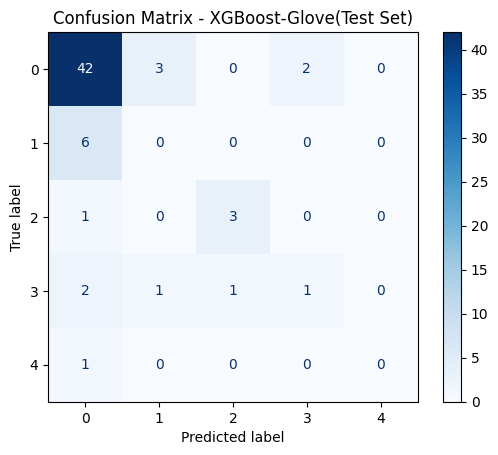

In [ ]:
# Confusion matrix based on best model
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost-Glove(Test Set)")
plt.show()

**Observations**

Though it has bit lower accuracy than the first, this model better performed on to predicting all accident levels and struggles only for level 4 and better overall Precision Score.

**Final Decision on Best Model:**

- Based on above observations of all metrics about predictions of all accident level types we can conclude **XGBoost Model with GloVe Embeddings** is our best model with Highest F1 Score of 70% and Accuracy score of 73% (slightly lesser than Random Forest + TD - IDF) model.

#### Prepration of Model 2, its Output Data & Pickle it

In [ ]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
# Assuming you have the original column names stored in `columns`
X_full2 = np.vstack([X_train_glove, X_test_glove, X_val_glove])   # combine train+val+test
y_full_pred2 = best_model.predict(X_full2)
y_full_pred2.shape

# --- Step 2: Add predictions to original dataset ---
df_with_preds2 = model2_data.copy()
df_with_preds2["Predicted_Accident_Level"] = y_full_pred2

df_with_preds2

Date     Country     Local Industry Sector  Accident Level  Gender  \
0   2016-01-01  Country_01  Local_01          Mining               0    Male   
1   2016-01-02  Country_02  Local_02          Mining               0    Male   
2   2016-01-06  Country_01  Local_03          Mining               0    Male   
3   2016-01-08  Country_01  Local_04          Mining               0    Male   
4   2016-01-10  Country_01  Local_04          Mining               3    Male   
..         ...         ...       ...             ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining               0    Male   
414 2017-07-04  Country_01  Local_03          Mining               0  Female   
415 2017-07-05  Country_02  Local_09          Metals               0    Male   
416 2017-07-06  Country_02  Local_05          Metals               0    Male   
417 2017-07-09  Country_01  Local_04          Mining               0  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  \
0          0          53  remove drill rod jumbo 08 maintenance supervis...   
1          2          53  activation sodium sulphide pump pipe uncouple ...   
2          6           1  sub station milpo locate level 170 collaborato...   
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...   
4          3           1  approximately 11 45 m circumstance mechanic an...   
..       ...         ...                                                ...   
413        5          27  approximately 5 00 m approximately lift kelly ...   
414        5          27  collaborator move infrastructure office julio ...   
415        6          27  environmental monitoring activity area employe...   
416        4          27  employee perform activity strip cathode pull c...   
417        3          27  10 00 m assistant clean floor module e central...   

     Predicted_Potential_Accident_Level  Predicted_Accident_Level  
0                                     1                         0  
1                                     0                         0  
2                                     1                         0  
3                                     4                         0  
4                                     3                         0  
..                                  ...                       ...  
413                                   2                         0  
414                                   2                         0  
415                                   2                         1  
416                                   3                         0  
417                                   3                         0  

[418 rows x 16 columns]

In [ ]:
df_m1= df_with_preds2['Accident Level'].value_counts().to_frame().reset_index()
df_m2= df_with_preds2['Predicted_Accident_Level'].value_counts().to_frame().reset_index()

df_m1.columns = ['Accident Level', 'AL_Count']
df_m2.columns = ['Predicted_Accident_Level', 'PAL_Count']

#Concatenate the DataFrames
# Side-by-side concatenation (using join='outer' to include all unique values) for comparison of model
df_m3 = pd.concat([df_m1, df_m2], axis=1, join='outer')

df_m3

Accident Level  AL_Count  Predicted_Accident_Level  PAL_Count
0               0       309                         0        315
1               1        40                         1         38
2               2        31                         2         31
3               3        30                         3         27
4               4         8                         4          7

In [ ]:
# --- Step 3: Prepare Output of Model 2 ---
# Drop original "Accident Level" (since we now use predicted one)
df_model3 = df_with_preds2.drop(columns=["Accident Level","cleaned_text","cleaned_text_without_stopwords","Description"], errors="ignore")

df_model3.to_excel("/content/drive/MyDrive/PGP-AIML/Capstone/Project/Model2_Output.xlsx", index=False)

df_model3

Date     Country     Local Industry Sector  Gender  \
0   2016-01-01  Country_01  Local_01          Mining    Male   
1   2016-01-02  Country_02  Local_02          Mining    Male   
2   2016-01-06  Country_01  Local_03          Mining    Male   
3   2016-01-08  Country_01  Local_04          Mining    Male   
4   2016-01-10  Country_01  Local_04          Mining    Male   
..         ...         ...       ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining    Male   
414 2017-07-04  Country_01  Local_03          Mining  Female   
415 2017-07-05  Country_02  Local_09          Metals    Male   
416 2017-07-06  Country_02  Local_05          Metals    Male   
417 2017-07-09  Country_01  Local_04          Mining  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  \
0          0          53  remove drill rod jumbo 08 maintenance supervis...   
1          2          53  activation sodium sulphide pump pipe uncouple ...   
2          6           1  sub station milpo locate level 170 collaborato...   
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...   
4          3           1  approximately 11 45 m circumstance mechanic an...   
..       ...         ...                                                ...   
413        5          27  approximately 5 00 m approximately lift kelly ...   
414        5          27  collaborator move infrastructure office julio ...   
415        6          27  environmental monitoring activity area employe...   
416        4          27  employee perform activity strip cathode pull c...   
417        3          27  10 00 m assistant clean floor module e central...   

     Predicted_Potential_Accident_Level  Predicted_Accident_Level  
0                                     1                         0  
1                                     0                         0  
2                                     1                         0  
3                                     4                         0  
4                                     3                         0  
..                                  ...                       ...  
413                                   2                         0  
414                                   2                         0  
415                                   2                         1  
416                                   3                         0  
417                                   3                         0  

[418 rows x 15 columns]

In [ ]:
!pip install joblib -q

In [ ]:
import joblib

# Save model to file
joblib.dump(best_model, '/content/drive/MyDrive/PGP-AIML/Capstone/Project/Model2_BestModel_XGB.pkl')

['/content/drive/MyDrive/PGP-AIML/Capstone/Project/Model2_BestModel_XGB.pkl']

## **Design, Train and Test Neural Networks Classifiers**

### **Model Building - Approach**

We will build one model predicting the Accident Level.
  * Target Variable = Accident Level.

#### Utility Function

In [ ]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal, verbose=0))).round() # Multilabel


        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='weighted')
        _val_recall = recall_score(val_targ, val_predict_classes, average='weighted')
        _val_precision = precision_score(val_targ, val_predict_classes, average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

### **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            418 non-null    datetime64[ns]
 1   Country                         418 non-null    object        
 2   Local                           418 non-null    object        
 3   Industry Sector                 418 non-null    object        
 4   Accident Level                  418 non-null    object        
 5   Potential Accident Level        418 non-null    object        
 6   Gender                          418 non-null    object        
 7   Employee Type                   418 non-null    object        
 8   Critical Risk                   418 non-null    object        
 9   Description                     418 non-null    object        
 10  Year                            418 non-null    int64         
 11  Month 

In [ ]:
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear                                       cleaned_text  \
0     Friday          53  while removing the drill rod of the jumbo 08 f...   
1   Saturday          53  during the activation of a sodium sulphide pum...   
2  Wednesday           1  in the sub station milpo located at level 170 ...   
3     Friday           1  being 9 45 am approximately in the nv 1880 cx ...   
4     Sunday           1  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Apply Label Encoding
le = LabelEncoder()
df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)
df['Weekday'] = LabelEncoder().fit_transform(df['Weekday']).astype(np.int8)

In [ ]:
df.head()

Date     Country     Local Industry Sector  Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining               0   
1 2016-01-02  Country_02  Local_02          Mining               0   
2 2016-01-06  Country_01  Local_03          Mining               0   
3 2016-01-08  Country_01  Local_04          Mining               0   
4 2016-01-10  Country_01  Local_04          Mining               3   

   Potential Accident Level Gender         Employee Type        Critical Risk  \
0                         3   Male           Third Party              Pressed   
1                         3   Male              Employee  Pressurized Systems   
2                         2   Male  Third Party (Remote)         Manual Tools   
3                         0   Male           Third Party               Others   
4                         3   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

   Weekday  WeekofYear                                       cleaned_text  \
0        0          53  while removing the drill rod of the jumbo 08 f...   
1        2          53  during the activation of a sodium sulphide pum...   
2        6           1  in the sub station milpo located at level 170 ...   
3        0           1  being 9 45 am approximately in the nv 1880 cx ...   
4        3           1  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Display accident level counts
df['Accident Level'].value_counts().sort_index()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [ ]:
# Columns
categorical_cols = ['Country', 'Local', 'Industry Sector', 'Gender','Employee Type', 'Critical Risk']
numeric_cols = ['Month','Day','Weekday','WeekofYear']
text_col = 'final_cleaned_text'

# --- Structured-only preprocessor (for Word2Vec / GloVe / Transformers)
structured_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

### **NN Model**

#### Spliting the Data

In [ ]:
Xnn = df.drop(['Accident Level','cleaned_text','cleaned_text_without_stopwords','Description'], axis = 1)
ynn = df['Accident Level']

In [ ]:
Xnn

Date     Country     Local Industry Sector  \
0   2016-01-01  Country_01  Local_01          Mining   
1   2016-01-02  Country_02  Local_02          Mining   
2   2016-01-06  Country_01  Local_03          Mining   
3   2016-01-08  Country_01  Local_04          Mining   
4   2016-01-10  Country_01  Local_04          Mining   
..         ...         ...       ...             ...   
413 2017-07-04  Country_01  Local_04          Mining   
414 2017-07-04  Country_01  Local_03          Mining   
415 2017-07-05  Country_02  Local_09          Metals   
416 2017-07-06  Country_02  Local_05          Metals   
417 2017-07-09  Country_01  Local_04          Mining   

     Potential Accident Level  Gender         Employee Type  \
0                           3    Male           Third Party   
1                           3    Male              Employee   
2                           2    Male  Third Party (Remote)   
3                           0    Male           Third Party   
4                           3    Male           Third Party   
..                        ...     ...                   ...   
413                         2    Male           Third Party   
414                         1  Female              Employee   
415                         1    Male              Employee   
416                         1    Male              Employee   
417                         1  Female           Third Party   

                    Critical Risk  Year  Month  Day  Weekday  WeekofYear  \
0                         Pressed  2016      1    1        0          53   
1             Pressurized Systems  2016      1    2        2          53   
2                    Manual Tools  2016      1    6        6           1   
3                          Others  2016      1    8        0           1   
4                          Others  2016      1   10        3           1   
..                            ...   ...    ...  ...      ...         ...   
413                        Others  2017      7    4        5          27   
414                        Others  2017      7    4        5          27   
415              Venomous Animals  2017      7    5        6          27   
416                           Cut  2017      7    6        4          27   
417  Fall prevention (same level)  2017      7    9        3          27   

                                    final_cleaned_text  
0    remove drill rod jumbo 08 maintenance supervis...  
1    activation sodium sulphide pump pipe uncouple ...  
2    sub station milpo locate level 170 collaborato...  
3    9 45 approximately nv 1880 cx 695 ob7 personne...  
4    approximately 11 45 m circumstance mechanic an...  
..                                                 ...  
413  approximately 5 00 m approximately lift kelly ...  
414  collaborator move infrastructure office julio ...  
415  environmental monitoring activity area employe...  
416  employee perform activity strip cathode pull c...  
417  10 00 m assistant clean floor module e central...  

[418 rows x 14 columns]

In [ ]:
ynn.value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

Lets transform Target Variable into format acceptable by Neural Network

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
#y_dummy = to_categorical(df['Potential Accident Level'])
y_dummy = to_categorical(ynn)
y_dummy.shape

(418, 5)

In [ ]:
X_train2, X_test2, y_train_dummy, y_test_dummy = train_test_split(Xnn, y_dummy, test_size = 0.30, random_state = 42, stratify = y_dummy)

In [ ]:
y_train_dummy

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
print ('X_train2.shape:',X_train2.shape)
print ('y_train_dummy.shape:',y_train_dummy.shape)
print ('X_test2.shape:',X_test2.shape)
print ('y_test_dummy.shape:',y_test_dummy.shape)

X_train2.shape: (292, 14)
y_train_dummy.shape: (292, 5)
X_test2.shape: (126, 14)
y_test_dummy.shape: (126, 5)


In [ ]:
from collections import Counter
print (Counter(y_train_dummy.argmax(axis=1)))

Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})


##### Preprocessing on Split Data


In [ ]:
# Fit structured features
structured_train2 = structured_preprocessor.fit_transform(X_train2)
structured_test2 = structured_preprocessor.transform(X_test2)

#### Preparation of Various Embeddings on Original Data

##### TF-IDF

In [ ]:
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf2 = tfidf_preprocessor.fit_transform(X_train2)
#X_val_tfidf   = tfidf_preprocessor.transform(X_val)
X_test_tfidf2  = tfidf_preprocessor.transform(X_test2)

#print("TF-IDF shapes:", X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape)
print("TF-IDF shapes:", X_train_tfidf2.shape, X_test_tfidf2.shape)

TF-IDF shapes: (292, 1920) (126, 1920)


##### Word2Vec

In [ ]:
# Word2Vec + Structured
def tokenize_text(text):
    return text.split()

tokenized_train2 = X_train2[text_col].apply(tokenize_text)
#tokenized_val = X_val[text_col].apply(tokenize_text)
tokenized_test2 = X_test2[text_col].apply(tokenize_text)

In [ ]:
# Train Word2Vec
w2v_model2 = Word2Vec(sentences=tokenized_train2, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train2 = np.vstack(tokenized_train2.apply(lambda x: document_vector(x, w2v_model2)))
#w2v_val   = np.vstack(tokenized_val.apply(lambda x: document_vector(x, w2v_model)))
w2v_test2  = np.vstack(tokenized_test2.apply(lambda x: document_vector(x, w2v_model2)))

X_train_w2v2 = np.hstack([w2v_train2, structured_train2.toarray()])
#X_val_w2v   = np.hstack([w2v_val, structured_val.toarray()])
X_test_w2v2  = np.hstack([w2v_test2, structured_test2.toarray()])

#print("Word2Vec shapes:", X_train_w2v.shape, X_val_w2v.shape, X_test_w2v.shape)
print("Word2Vec shapes:", X_train_w2v2.shape, X_test_w2v2.shape)

Word2Vec shapes: (292, 358) (126, 358)


##### GloVe

In [ ]:
# Load GloVe vectors
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train2 = np.vstack(tokenized_train2.apply(lambda x: glove_doc_vector(x, glove_dict)))
#glove_val   = np.vstack(tokenized_val.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test2  = np.vstack(tokenized_test2.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove2 = np.hstack([glove_train2, structured_train2.toarray()])
#X_val_glove   = np.hstack([glove_val, structured_val.toarray()])
X_test_glove2  = np.hstack([glove_test2, structured_test2.toarray()])

#print("GloVe shapes:", X_train_glove.shape, X_val_glove.shape, X_test_glove.shape)
print("GloVe shapes:", X_train_glove2.shape, X_test_glove2.shape)

GloVe shapes: (292, 158) (126, 158)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
transformer_model2 = SentenceTransformer('all-MiniLM-L6-v2')

bert_train2 = transformer_model2.encode(X_train2[text_col].tolist(), batch_size=32, show_progress_bar=True)
#bert_val   = transformer_model.encode(X_val[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test2  = transformer_model2.encode(X_test2[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert2 = np.hstack([bert_train2, structured_train2.toarray()])
#X_val_bert   = np.hstack([bert_val, structured_val.toarray()])
X_test_bert2  = np.hstack([bert_test2, structured_test2.toarray()])

#print("all-MiniLM-L6-v2 shapes:", X_train_bert.shape, X_val_bert.shape, X_test_bert.shape)
print("all-MiniLM-L6-v2 shapes:", X_train_bert2.shape, X_test_bert2.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

all-MiniLM-L6-v2 shapes: (292, 442) (126, 442)


#### Model Building (on Original Data)

In [ ]:
from keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
EPOCH = 100
BATCH_SIZE =10

feature_sets2 = {
    "TF-IDF": (X_train_tfidf2, X_test_tfidf2),
    "Word2Vec": (X_train_w2v2, X_test_w2v2),
    "GloVe": (X_train_glove2, X_test_glove2),
    "Transformer": (X_train_bert2, X_test_bert2)
}

#feature_sets3 = { "TF-IDF": (X_train_tfidf2, X_test_tfidf2) }

kernel_init = 'he_uniform'
act = 'relu'
target_type = 'multi_label'
nn_models_hist ={}
nn_models ={}

In [ ]:
# Designing the dataframe to document the model performance
NN_Model_Results = pd.DataFrame(columns=['Model Name','Training Loss', 'Testing Loss', 'Training Accuracy', 'Testing Accuracy'])

In [ ]:
# NN_Model_Results.drop(NN_Model_Results.index, inplace=True) #can be used for rerunning various combinations and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test) in feature_sets2.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  nn_model = Sequential()

  # Adding the Input Layer
  nn_model.add(Dense(256, kernel_initializer=kernel_init, input_dim = X_train.shape[1], activation=act, ))

  # Adding the Hidden Layers
  nn_model.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model.add(Dense(32, kernel_initializer=kernel_init, activation=act))

  # Adding the Output Layers
  nn_model.add(Dense(y_train_dummy.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  nn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.0001, verbose=0, model='auto')
  metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback])
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback,metrics])

  print('ANN Model with Classifier:',feat_name)
  model_name='ANN Model with Classifier:'+feat_name

  nn_models_hist[model_name]=history
  nn_models[model_name]=nn_model

  # evaluate the keras model
  train_loss, train_accuracy = nn_model.evaluate(X_train, y_train_dummy, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = nn_model.evaluate(X_test, y_test_dummy, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  NN_Model_Results.loc[len(NN_Model_Results)] = [model_name, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
ANN Model with Classifier: TF-IDF
Train accuracy: 99.66
Test accuracy: 69.84
ANN Model with Classifier: Word2Vec
Train accuracy: 79.79
Test accuracy: 73.81
ANN Model with Classifier: GloVe
Train accuracy: 78.77
Test accuracy: 73.02
ANN Model with Classifier: Transformer
Train accuracy: 98.63
Test accuracy: 72.22


In [ ]:
NN_Model_Results

Model Name  Training Loss  Testing Loss  \
0       ANN Model with Classifier:TF-IDF       0.030788      1.601380   
1     ANN Model with Classifier:Word2Vec       0.512661      1.095580   
2        ANN Model with Classifier:GloVe       0.451409      1.141528   
3  ANN Model with Classifier:Transformer       0.099960      1.282204   

   Training Accuracy  Testing Accuracy  
0           0.996575          0.698413  
1           0.797945          0.738095  
2           0.787671          0.730159  
3           0.986301          0.722222

**Observations:**
- Observing the gap between 'Testing Loss' & 'Training Loss' (huge divergence) the above models seems underfit model, indicating that the model was unable to learn the training dataset at all and models does not have a suitable capacity for the complexity of the dataset.

#### Model Improvement (on Original Data)

Lets try adding Dropout and Batch Normalization to improve the model and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test) in feature_sets2.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  nn_model2 = Sequential()

  # Adding the Input Layer
  nn_model2.add(Dense(256, kernel_initializer=kernel_init, input_dim = X_train.shape[1], activation=act))
  #nn_model2.add(Dropout(0.2))
  #nn_model2.add(tf.keras.layers.BatchNormalization())

  # Adding the Hidden Layers
  nn_model2.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  #nn_model2.add(Dropout(0.2))
  #nn_model2.add(tf.keras.layers.BatchNormalization())
  nn_model2.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  #nn_model2.add(Dropout(0.2))
  #nn_model2.add(tf.keras.layers.BatchNormalization())
  nn_model2.add(Dense(32, kernel_initializer=kernel_init, activation=act))
  #nn_model2.add(Dropout(0.2))
  #nn_model2.add(tf.keras.layers.BatchNormalization())

  # Adding dropout for the better performance
  nn_model2.add(Dropout(0.5))

  # Adding batch normalization for better performance
  nn_model2.add(BatchNormalization())

  # Adding the Output Layers
  nn_model2.add(Dense(y_train_dummy.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model2.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  nn_model2.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp2 = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.001, verbose=0, model='auto')
  metrics2 = Metrics(validation_data=(X_train, y_train_dummy, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history2 = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history2 = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history2 = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp2,callback2])
  #history2 = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp2,callback2,metrics2])

  print('Modified ANN Model with Classifier:',feat_name)
  model_name2='Modified ANN Model with Classifier:'+feat_name

  #nn_models[model_name]=history2
  nn_models_hist[model_name2]=history2
  nn_models[model_name2]=nn_model2

  # evaluate the keras model
  train_loss, train_accuracy = nn_model2.evaluate(X_train, y_train_dummy, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = nn_model2.evaluate(X_test, y_test_dummy, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  NN_Model_Results.loc[len(NN_Model_Results)] = [model_name2, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
Modified ANN Model with Classifier: TF-IDF
Train accuracy: 94.52
Test accuracy: 73.02
Modified ANN Model with Classifier: Word2Vec
Train accuracy: 77.74
Test accuracy: 73.02
Modified ANN Model with Classifier: GloVe
Train accuracy: 74.32
Test accuracy: 73.02
Modified ANN Model with Classifier: Transformer
Train accuracy: 86.99
Test accuracy: 71.43


In [ ]:
NN_Model_Results

Model Name  Training Loss  \
0                ANN Model with Classifier:TF-IDF       0.030788   
1              ANN Model with Classifier:Word2Vec       0.512661   
2                 ANN Model with Classifier:GloVe       0.451409   
3           ANN Model with Classifier:Transformer       0.099960   
4       Modified ANN Model with Classifier:TF-IDF       0.228988   
5     Modified ANN Model with Classifier:Word2Vec       0.714504   
6        Modified ANN Model with Classifier:GloVe       0.750066   
7  Modified ANN Model with Classifier:Transformer       0.409240   

   Testing Loss  Training Accuracy  Testing Accuracy  
0      1.601380           0.996575          0.698413  
1      1.095580           0.797945          0.738095  
2      1.141528           0.787671          0.730159  
3      1.282204           0.986301          0.722222  
4      1.125870           0.945205          0.730159  
5      0.996771           0.777397          0.730159  
6      0.966645           0.743151          0.730159  
7      0.980100           0.869863          0.714286

**Observations:**
- Observing the gap between 'Testing Loss' & 'Training Loss' of all the combincations, the below models seems is good fit, with a minimal gap between the two final loss values with test accuracy of 73%. So we shortlist the models from this list. We can try with upsampling data to check we can get better accuracy and reduced losses before deciding the final model.

1. **Modified ANN Model with Classifier:GloVe**
2. **Modified ANN Model with Classifier:Word2Vec**
3. **Modified ANN Model with Classifier:Transformer**


#### Preparation of Various Embeddings on Upsampled Training Data

##### TF-IDF

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ------------------------------
# TF-IDF + Structured + SMOTE
# ------------------------------
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train2_tfidf = tfidf_preprocessor.fit_transform(X_train2)
X_test2_tfidf  = tfidf_preprocessor.transform(X_test2)

print("Before SMOTE (TF-IDF):", Counter(y_train_dummy.argmax(axis=1)))
smote = SMOTE(random_state=42, k_neighbors=2)
X_train2_res_tfidf, y_train2_res_tfidf = smote.fit_resample(X_train2_tfidf, y_train_dummy)
print("After SMOTE (TF-IDF):", Counter(y_train2_res_tfidf.argmax(axis=1)))

print("TF-IDF shapes:", X_train2_res_tfidf.shape, X_test2_tfidf.shape)
#print(y_train2_res_tfidf.shape)

Before SMOTE (TF-IDF): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (TF-IDF): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
TF-IDF shapes: (1080, 1920) (126, 1920)


##### Word2Vec

In [ ]:
# ------------------------------
# Word2Vec + Structured + SMOTE
# ------------------------------
def tokenize_text(text):
    return text.split()

tokenized_train2 = X_train2[text_col].apply(tokenize_text)
tokenized_test2  = X_test2[text_col].apply(tokenize_text)

# Train Word2Vec
w2v_model2 = Word2Vec(sentences=tokenized_train2, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train2 = np.vstack(tokenized_train2.apply(lambda x: document_vector(x, w2v_model2)))
w2v_test2  = np.vstack(tokenized_test2.apply(lambda x: document_vector(x, w2v_model2)))

X_train2_w2v = np.hstack([w2v_train2, structured_train2.toarray()])
X_test2_w2v  = np.hstack([w2v_test2, structured_test2.toarray()])

print("Before SMOTE (Word2Vec):", Counter(y_train_dummy.argmax(axis=1)))
X_train2_res_w2v, y_train2_res_w2v = smote.fit_resample(X_train2_w2v, y_train_dummy)
print("After SMOTE (Word2Vec):", Counter(y_train2_res_w2v.argmax(axis=1)))

print("Word2Vec shapes:", X_train2_res_w2v.shape, X_test2_w2v.shape)

Before SMOTE (Word2Vec): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (Word2Vec): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
Word2Vec shapes: (1080, 358) (126, 358)


##### GloVe

In [ ]:
# ------------------------------
# GloVe + Structured + SMOTE
# ------------------------------
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()

        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train2 = np.vstack(tokenized_train2.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test2  = np.vstack(tokenized_test2.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train2_glove = np.hstack([glove_train2, structured_train2.toarray()])
X_test2_glove  = np.hstack([glove_test2, structured_test2.toarray()])

print("Before SMOTE (GloVe):", Counter(y_train_dummy.argmax(axis=1)))
X_train2_res_glove, y_train2_res_glove = smote.fit_resample(X_train2_glove, y_train_dummy)
print("After SMOTE (GloVe):", Counter(y_train2_res_glove.argmax(axis=1)))

print("GloVe shapes:", X_train2_res_glove.shape, X_test2_glove.shape)


Before SMOTE (GloVe): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (GloVe): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
GloVe shapes: (1080, 158) (126, 158)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
# ------------------------------
# all-MiniLM-L6-v2 + Structured + SMOTE
# ------------------------------
transformer_model = SentenceTransformer('all-MiniLM-L6-v2')

bert_train2 = transformer_model.encode(X_train2[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test2  = transformer_model.encode(X_test2[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train2_bert = np.hstack([bert_train2, structured_train2.toarray()])
X_test2_bert  = np.hstack([bert_test2, structured_test2.toarray()])

print("Before SMOTE (all-MiniLM-L6-v2):", Counter(y_train_dummy.argmax(axis=1)))
X_train2_res_bert, y_train2_res_bert = smote.fit_resample(X_train2_bert, y_train_dummy)
print("After SMOTE (all-MiniLM-L6-v2):", Counter(y_train2_res_bert.argmax(axis=1)))

print("all-MiniLM-L6-v2 shapes:", X_train2_res_bert.shape,X_test2_bert.shape)


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Before SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
all-MiniLM-L6-v2 shapes: (1080, 442) (126, 442)


#### Model Building (Upsampled Training Data)

In [ ]:
from keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
EPOCH = 100
BATCH_SIZE =10

feature_sets2_res = {
    "TF-IDF": (X_train2_res_tfidf, X_test2_tfidf, y_train2_res_tfidf),
    "Word2Vec": (X_train2_res_w2v, X_test2_w2v, y_train2_res_w2v),
    "GloVe": (X_train2_res_glove, X_test2_glove, y_train2_res_glove),
    "Transformer": (X_train2_res_bert, X_test2_bert, y_train2_res_bert)
}

#feature_sets3 = { "TF-IDF": (X_train_tfidf2, X_test_tfidf2) }

kernel_init = 'he_uniform'
act = 'relu'
target_type = 'multi_label'
nn_models_hist_res ={}
nn_models_res ={}

In [ ]:
print(X_train2_res_tfidf.shape, X_test2_tfidf.shape, y_train2_res_tfidf.shape)

(1080, 1920) (126, 1920) (1080, 5)


In [ ]:
# Designing the dataframe to document the model performance
NN_Model_Results_res = pd.DataFrame(columns=['Model Name','Training Loss', 'Testing Loss', 'Training Accuracy', 'Testing Accuracy'])

In [ ]:
NN_Model_Results_res.drop(NN_Model_Results_res.index, inplace=True) #can be used for rerunning various combinations and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test, y_train) in feature_sets2_res.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  nn_model_res = Sequential()

  # Adding the Input Layer
  nn_model_res.add(Dense(256, kernel_initializer=kernel_init, input_dim = X_train.shape[1], activation=act, ))

  # Adding the Hidden Layers
  nn_model_res.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model_res.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model_res.add(Dense(32, kernel_initializer=kernel_init, activation=act))

  # Adding the Output Layers
  nn_model_res.add(Dense(y_train.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  nn_model_res.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.0001, verbose=0, model='auto')
  metrics = Metrics(validation_data=(X_train, y_train, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history_res = nn_model_res.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback])
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback,metrics])

  print('ANN Model with Classifier (Upsampled Data):',feat_name)
  model_name='ANN Model with Classifier (Upsampled Data):'+feat_name

  nn_models_hist_res[model_name]=history_res
  nn_models_res[model_name]=nn_model_res

  # evaluate the keras model
  train_loss, train_accuracy = nn_model_res.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = nn_model_res.evaluate(X_test, y_test_dummy, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  NN_Model_Results_res.loc[len(NN_Model_Results_res)] = [model_name, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
ANN Model with Classifier (Upsampled Data): TF-IDF
Train accuracy: 99.91
Test accuracy: 73.81
ANN Model with Classifier (Upsampled Data): Word2Vec
Train accuracy: 97.50
Test accuracy: 57.94
ANN Model with Classifier (Upsampled Data): GloVe
Train accuracy: 99.72
Test accuracy: 57.94
ANN Model with Classifier (Upsampled Data): Transformer
Train accuracy: 99.91
Test accuracy: 68.25


In [ ]:
NN_Model_Results_res

Model Name  Training Loss  \
0  ANN Model with Classifier (Upsampled Data):TF-IDF       0.004526   
1  ANN Model with Classifier (Upsampled Data):Wor...       0.087064   
2   ANN Model with Classifier (Upsampled Data):GloVe       0.019995   
3  ANN Model with Classifier (Upsampled Data):Tra...       0.005379   

   Testing Loss  Training Accuracy  Testing Accuracy  
0      2.116217           0.999074          0.738095  
1      2.249360           0.975000          0.579365  
2      2.626412           0.997222          0.579365  
3      2.174678           0.999074          0.682540

**Observations:**
- Observing the gap between 'Testing Loss' & 'Training Loss' (huge divergence) the above list are underfit models, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset.

#### Model Improvement (Upsampled Training Data)

Lets try adding Dropout and Batch Normalization to improve the model and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test, y_train) in feature_sets2_res.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  nn_model2_res = Sequential()

  # Adding the Input Layer
  nn_model2_res.add(Dense(256, kernel_initializer=kernel_init, input_dim = X_train.shape[1], activation=act))
  nn_model2_res.add(Dropout(0.2))
  nn_model2_res.add(BatchNormalization())

  # Adding the Hidden Layers
  nn_model2_res.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model2_res.add(Dropout(0.2))
  nn_model2_res.add(BatchNormalization())
  nn_model2_res.add(Dense(64, kernel_initializer=kernel_init, activation=act))
  nn_model2_res.add(Dropout(0.2))
  nn_model2_res.add(BatchNormalization())
  nn_model2_res.add(Dense(32, kernel_initializer=kernel_init, activation=act))
  nn_model2_res.add(Dropout(0.2))
  nn_model2_res.add(BatchNormalization())

  # Adding dropout for the better performance
  nn_model2_res.add(Dropout(0.5))

  # Adding batch normalization for better performance
  nn_model2_res.add(BatchNormalization())

  # Adding the Output Layers
  nn_model2_res.add(Dense(y_train.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model2.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  nn_model2_res.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp2 = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.001, verbose=0, model='auto')
  metrics2 = Metrics(validation_data=(X_train, y_train, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history2_res = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history2_res = nn_model2.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history2_res = nn_model2_res.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp2,callback2])
  #history2_res = nn_model2_res.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp2,callback2,metrics2])

  print('Modified ANN Model with Classifier (Upsampled Data):',feat_name)
  model_name2='Modified ANN Model with Classifier (Upsampled Data):'+feat_name

  #nn_models[model_name]=history2
  nn_models_hist_res[model_name2]=history2_res
  nn_models_res[model_name2]=nn_model2_res

  # evaluate the keras model
  train_loss, train_accuracy = nn_model2_res.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = nn_model2_res.evaluate(X_test, y_test_dummy, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  NN_Model_Results_res.loc[len(NN_Model_Results_res)] = [model_name2, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
Modified ANN Model with Classifier (Upsampled Data): TF-IDF
Train accuracy: 99.44
Test accuracy: 70.63
Modified ANN Model with Classifier (Upsampled Data): Word2Vec
Train accuracy: 73.98
Test accuracy: 30.95
Modified ANN Model with Classifier (Upsampled Data): GloVe
Train accuracy: 85.28
Test accuracy: 38.89
Modified ANN Model with Classifier (Upsampled Data): Transformer
Train accuracy: 98.43
Test accuracy: 61.90


In [ ]:
NN_Model_Results_res

Model Name  Training Loss  \
0  ANN Model with Classifier (Upsampled Data):TF-IDF       0.004526   
1  ANN Model with Classifier (Upsampled Data):Wor...       0.087064   
2   ANN Model with Classifier (Upsampled Data):GloVe       0.019995   
3  ANN Model with Classifier (Upsampled Data):Tra...       0.005379   
4  Modified ANN Model with Classifier (Upsampled ...       0.032052   
5  Modified ANN Model with Classifier (Upsampled ...       0.768883   
6  Modified ANN Model with Classifier (Upsampled ...       0.572696   
7  Modified ANN Model with Classifier (Upsampled ...       0.073867   

   Testing Loss  Training Accuracy  Testing Accuracy  
0      2.116217           0.999074          0.738095  
1      2.249360           0.975000          0.579365  
2      2.626412           0.997222          0.579365  
3      2.174678           0.999074          0.682540  
4      1.054610           0.994444          0.706349  
5      1.539569           0.739815          0.309524  
6      1.437555           0.852778          0.388889  
7      1.286469           0.984259          0.619048

**Observations:**
- Observing the gap between 'Testing Loss' & 'Training Loss' of all the combincations, the "**Modified ANN Model with Classifier (Upsampled Data):Transformer**" seems is good fit, with a considerable gap between the two final loss values with test accuracy of 62%. So we shortlist the model from this list.

#### Final Model Selection

In [ ]:
NN_Model_Results

Model Name  Training Loss  \
0                ANN Model with Classifier:TF-IDF       0.030788   
1              ANN Model with Classifier:Word2Vec       0.512661   
2                 ANN Model with Classifier:GloVe       0.451409   
3           ANN Model with Classifier:Transformer       0.099960   
4       Modified ANN Model with Classifier:TF-IDF       0.228988   
5     Modified ANN Model with Classifier:Word2Vec       0.714504   
6        Modified ANN Model with Classifier:GloVe       0.750066   
7  Modified ANN Model with Classifier:Transformer       0.409240   

   Testing Loss  Training Accuracy  Testing Accuracy  
0      1.601380           0.996575          0.698413  
1      1.095580           0.797945          0.738095  
2      1.141528           0.787671          0.730159  
3      1.282204           0.986301          0.722222  
4      1.125870           0.945205          0.730159  
5      0.996771           0.777397          0.730159  
6      0.966645           0.743151          0.730159  
7      0.980100           0.869863          0.714286

In [ ]:
NN_Model_Results_res

Model Name  Training Loss  \
0  ANN Model with Classifier (Upsampled Data):TF-IDF       0.004526   
1  ANN Model with Classifier (Upsampled Data):Wor...       0.087064   
2   ANN Model with Classifier (Upsampled Data):GloVe       0.019995   
3  ANN Model with Classifier (Upsampled Data):Tra...       0.005379   
4  Modified ANN Model with Classifier (Upsampled ...       0.032052   
5  Modified ANN Model with Classifier (Upsampled ...       0.768883   
6  Modified ANN Model with Classifier (Upsampled ...       0.572696   
7  Modified ANN Model with Classifier (Upsampled ...       0.073867   

   Testing Loss  Training Accuracy  Testing Accuracy  
0      2.116217           0.999074          0.738095  
1      2.249360           0.975000          0.579365  
2      2.626412           0.997222          0.579365  
3      2.174678           0.999074          0.682540  
4      1.054610           0.994444          0.706349  
5      1.539569           0.739815          0.309524  
6      1.437555           0.852778          0.388889  
7      1.286469           0.984259          0.619048

**Observations:**
Observing the gap between 'Testing Loss' & 'Training Loss' of all the combincations, the below models seems is good fit, with a minimal gap between the two final loss values, So we shortlist the models from this list to decide on final best model (NN Classifiers).

1. **Modified ANN Model with Classifier:GloVe**
2. **Modified ANN Model with Classifier:Word2Vec**
3. **Modified ANN Model with Classifier:Transformer**
4. **Modified ANN Model with Classifier (Upsampled Data):Transformer**

##### Ploting the Loss and Accuracy Curves (Shortlisted Models)

**************************************************
Modified ANN Model with Classifier:Word2Vec
**************************************************


**************************************************
Modified ANN Model with Classifier:GloVe
**************************************************


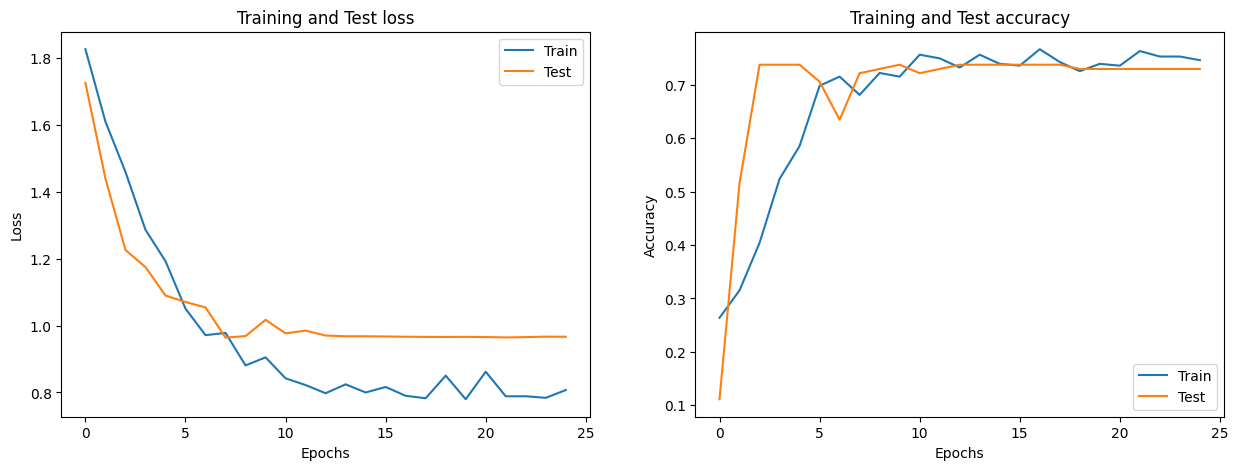

**************************************************
Modified ANN Model with Classifier:Transformer
**************************************************


**************************************************
Modified ANN Model with Classifier (Upsampled Data):Transformer
**************************************************


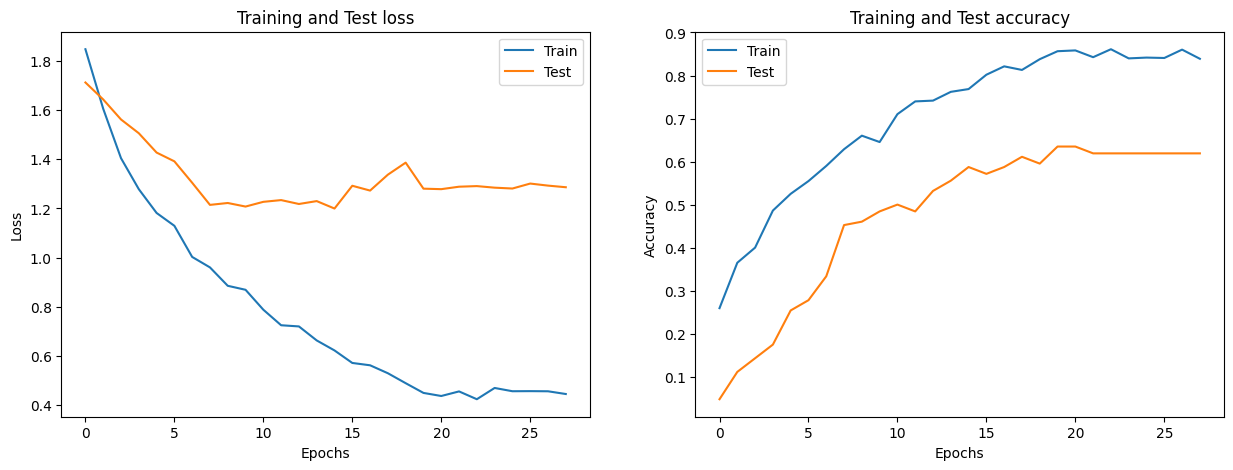

In [ ]:
shortlisted_models= [
                      "Modified ANN Model with Classifier:Word2Vec",
                      "Modified ANN Model with Classifier:GloVe",
                      "Modified ANN Model with Classifier:Transformer",
                      "Modified ANN Model with Classifier (Upsampled Data):Transformer"]

substring_to_find = "Upsampled"

for model_name in shortlisted_models:
  if substring_to_find in model_name:
    history= nn_models_hist_res.get(model_name)
  else:
    history= nn_models_hist.get(model_name)

  print('*'*50)
  print(model_name)
  print('*'*50)

  epochs2 = range(len(history.history['loss'])) # Get number of epochs
  #epochs2 = range(1,101)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  ax1.plot(epochs2, history.history['loss'], label = 'Train')
  ax1.plot(epochs2, history.history['val_loss'], label = 'Test')
  ax1.set_title('Training and Test loss')
  ax1.set(xlabel='Epochs', ylabel='Loss')
  ax1.legend()

  ax2.plot(epochs2, history.history['categorical_accuracy'], label='Train')
  ax2.plot(epochs2, history.history['val_categorical_accuracy'], label='Test')
  #ax2.plot(epochs2, history.history['accuracy'], 'g', label='Training accuracy')
  #ax2.plot(epochs2, history.history['val_accuracy'], 'b', label='validation accuracy')
  ax2.set_title('Training and Test accuracy')
  ax2.set(xlabel='Epochs', ylabel='Accuracy')
  ax2.legend()
  plt.show()

##### Classification Reports (Shortlisted Models)

In [ ]:
shortlisted_models2= [
                      "Modified ANN Model with Classifier:Word2Vec",
                      "Modified ANN Model with Classifier:GloVe",
                      "Modified ANN Model with Classifier:Transformer",
                      "Modified ANN Model with Classifier (Upsampled Data):Transformer"]

substring_to_find2 = "Upsampled"
classifier_Word2Vec = "Word2Vec"
classifier_Glove = "GloVe"
classifier_Transformer = "Transformer"

for model_name in shortlisted_models2:
  if substring_to_find2 in model_name:
    best_model_m2 = nn_models_res.get(model_name)
  else :
    best_model_m2 = nn_models.get(model_name)

  if classifier_Transformer in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test2_bert)
  elif classifier_Glove in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test_glove2)
  elif classifier_Word2Vec in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test_w2v2)

  print('*'*50)
  print(model_name)
  print('*'*50)

  y_test_pred_final_m2 = []
  for i in y_test_pred_m2:
    y_test_pred_final_m2.append(np.argmax(i))

  y_test_dummy_final= []
  for i in y_test_dummy:
    y_test_dummy_final.append(np.argmax(i))

  y_test = np.argmax(y_test_dummy, axis=-1)
  print("\nClassification Report:\n")
  #print(classification_report(y_test_dummy_final, y_test_pred_final_m2))
  print(classification_report(y_test, y_test_pred_final_m2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
**************************************************
Modified ANN Model with Classifier:Word2Vec
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.98      0.85        93
           1       0.00      0.00      0.00        12
           2       1.00      0.11      0.20         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.73       126
   macro avg       0.35      0.22      0.21       126
weighted avg       0.63      0.73      0.64       126

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
**************************************************
Modified ANN Model with Classifier:GloVe
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.99      0.

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
**************************************************
Modified ANN Model with Classifier:Transformer
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        93
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.71       126
   macro avg       0.15      0.19      0.17       126
weighted avg       0.55      0.71      0.62       126

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
**************************************************
Modified ANN Model with Classifier (Upsampled Data):Transformer
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0   

#### Final Model & its Confusion Matrix

**Observations:**
- Observing the Curves and reports, even though the first 3 models results in better accuracy (>70%), and loss curves converge, the classification report shows the models struggle to classify accident levels other than 0.
- Though the model **"Modified ANN Model with Classifier:Transformer"** on upsampled data had wider gap between Training and Testing loss, and accuracy of 62%, the classification report shows the model is able to classify all accident levels other than 4. So we select that as our **Final Best Model using NN**.

In [ ]:
# Confusion matrix based on best model
cm2 = confusion_matrix(y_test, y_test_pred_final_m2)
# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Modified ANN Model with Classifier:Transformer")
plt.show()

#### Best Model Performance on Original data and Save it

In [ ]:
best_model_nn= nn_models_res.get('Modified ANN Model with Classifier (Upsampled Data):Transformer')
best_model_nn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 256)            │       113,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,369 (1.57 MB)

 Trainable params: 137,157 (535.77 KB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 274,316 (1.05 MB)

In [ ]:
# --- Step 1: Populate Predicted_Potential_Accident_Level using best model ---
#X_full = np.vstack([X_train_glove2, X_test_glove2])
X_full = np.vstack([X_train2_bert, X_test2_bert])

#X_full.shape
y_test_pred=best_model_nn.predict(X_full)
y_test_pred_final = []
for i in y_test_pred:
    y_test_pred_final.append(np.argmax(i))

#print(len(y_test_pred_final))

# --- Step 2: Add predictions to original dataset ---
df_with_preds_nn = df.copy()
df_with_preds_nn["Predicted_Accident_Level"] = y_test_pred_final

df_with_preds_nn

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Date     Country     Local Industry Sector  Accident Level  \
0   2016-01-01  Country_01  Local_01          Mining               0   
1   2016-01-02  Country_02  Local_02          Mining               0   
2   2016-01-06  Country_01  Local_03          Mining               0   
3   2016-01-08  Country_01  Local_04          Mining               0   
4   2016-01-10  Country_01  Local_04          Mining               3   
..         ...         ...       ...             ...             ...   
413 2017-07-04  Country_01  Local_04          Mining               0   
414 2017-07-04  Country_01  Local_03          Mining               0   
415 2017-07-05  Country_02  Local_09          Metals               0   
416 2017-07-06  Country_02  Local_05          Metals               0   
417 2017-07-09  Country_01  Local_04          Mining               0   

     Potential Accident Level  Gender         Employee Type  \
0                           3    Male           Third Party   
1                           3    Male              Employee   
2                           2    Male  Third Party (Remote)   
3                           0    Male           Third Party   
4                           3    Male           Third Party   
..                        ...     ...                   ...   
413                         2    Male           Third Party   
414                         1  Female              Employee   
415                         1    Male              Employee   
416                         1    Male              Employee   
417                         1  Female           Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
413                        Others   
414                        Others   
415              Venomous Animals   
416                           Cut   
417  Fall prevention (same level)   

                                           Description  Year  Month  Day  \
0    While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1    During the activation of a sodium sulphide pum...  2016      1    2   
2    In the sub-station MILPO located at level +170...  2016      1    6   
3    Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4    Approximately at 11:45 a.m. in circumstances t...  2016      1   10   
..                                                 ...   ...    ...  ...   
413  Being approximately 5:00 a.m. approximately, w...  2017      7    4   
414  The collaborator moved from the infrastructure...  2017      7    4   
415  During the environmental monitoring activity i...  2017      7    5   
416  The Employee performed the activity of strippi...  2017      7    6   
417  At 10:00 a.m., when the assistant cleaned the ...  2017      7    9   

     Weekday  WeekofYear                                       cleaned_text  \
0          0          53  while removing the drill rod of the jumbo 08 f...   
1          2          53  during the activation of a sodium sulphide pum...   
2          6           1  in the sub station milpo located at level 170 ...   
3          0           1  being 9 45 am approximately in the nv 1880 cx ...   
4          3           1  approximately at 11 45 a m in circumstances th...   
..       ...         ...                                                ...   
413        5          27  being approximately 5 00 a m approximately whe...   
414        5          27  the collaborator moved from the infrastructure...   
415        6          27  during the environmental monitoring activity i...   
416        4          27  the employee performed the activity of strippi...   
417        3          27  at 10 00 a m when the assistant cleaned the fl...   

                        cleaned_text_without_stopwords  \
0    removing drill rod

In [ ]:
df1_nn= df_with_preds_nn['Accident Level'].value_counts().to_frame().reset_index()
df2_nn= df_with_preds_nn['Predicted_Accident_Level'].value_counts().to_frame().reset_index()

df1_nn.columns = ['Accident Level', 'PAL_Count']
df2_nn.columns = ['Predicted_Accident_Level', 'PPAL_Count']

#Concatenate the DataFrames
# Side-by-side concatenation (using join='outer' to include all unique values)
df3_nn = pd.concat([df1_nn, df2_nn], axis=1, join='outer')
df3_nn

Accident Level  PAL_Count  Predicted_Accident_Level  PPAL_Count
0               0        309                         0         300
1               1         40                         1          45
2               2         31                         2          36
3               3         30                         3          30
4               4          8                         4           7

In [ ]:
# --- Step 3: Prepare dataset for Model 2 ---
# Drop original "Potential Accident Level" (since we now use predicted one)
df_nn = df_with_preds_nn.drop(columns=["Potential Accident Level","cleaned_text","cleaned_text_without_stopwords","Description"], errors="ignore")
df_nn.to_excel("/content/drive/MyDrive/PGP-AIML/Capstone/Project/Dataset_output_nn.xlsx", index=False)

df_nn

Date     Country     Local Industry Sector  Accident Level  Gender  \
0   2016-01-01  Country_01  Local_01          Mining               0    Male   
1   2016-01-02  Country_02  Local_02          Mining               0    Male   
2   2016-01-06  Country_01  Local_03          Mining               0    Male   
3   2016-01-08  Country_01  Local_04          Mining               0    Male   
4   2016-01-10  Country_01  Local_04          Mining               3    Male   
..         ...         ...       ...             ...             ...     ...   
413 2017-07-04  Country_01  Local_04          Mining               0    Male   
414 2017-07-04  Country_01  Local_03          Mining               0  Female   
415 2017-07-05  Country_02  Local_09          Metals               0    Male   
416 2017-07-06  Country_02  Local_05          Metals               0    Male   
417 2017-07-09  Country_01  Local_04          Mining               0  Female   

            Employee Type                 Critical Risk  Year  Month  Day  \
0             Third Party                       Pressed  2016      1    1   
1                Employee           Pressurized Systems  2016      1    2   
2    Third Party (Remote)                  Manual Tools  2016      1    6   
3             Third Party                        Others  2016      1    8   
4             Third Party                        Others  2016      1   10   
..                    ...                           ...   ...    ...  ...   
413           Third Party                        Others  2017      7    4   
414              Employee                        Others  2017      7    4   
415              Employee              Venomous Animals  2017      7    5   
416              Employee                           Cut  2017      7    6   
417           Third Party  Fall prevention (same level)  2017      7    9   

     Weekday  WeekofYear                                 final_cleaned_text  \
0          0          53  remove drill rod jumbo 08 maintenance supervis...   
1          2          53  activation sodium sulphide pump pipe uncouple ...   
2          6           1  sub station milpo locate level 170 collaborato...   
3          0           1  9 45 approximately nv 1880 cx 695 ob7 personne...   
4          3           1  approximately 11 45 m circumstance mechanic an...   
..       ...         ...                                                ...   
413        5          27  approximately 5 00 m approximately lift kelly ...   
414        5          27  collaborator move infrastructure office julio ...   
415        6          27  environmental monitoring activity area employe...   
416        4          27  employee perform activity strip cathode pull c...   
417        3          27  10 00 m assistant clean floor module e central...   

     Predicted_Accident_Level  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
..                        ...  
413                         0  
414                         2  
415                         0  
416                         0  
417                         0  

[418 rows x 15 columns]

In [ ]:
!pip install joblib -q

In [ ]:
import joblib

# Save model to file
joblib.dump(best_model_nn, '/content/drive/MyDrive/PGP-AIML/Capstone/Project/BestModel_nn.pkl')

['/content/drive/MyDrive/PGP-AIML/Capstone/Project/BestModel_nn.pkl']

## **Design, Train and Test RNN or LSTM classifiers**

### **Model Building - Approach**

We will build one model predicting the Accident Level.
  * Target Variable = Accident Level.

##### Utility Function

In [ ]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal, verbose=0))).round() # Multilabel


        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='weighted')
        _val_recall = recall_score(val_targ, val_predict_classes, average='weighted')
        _val_precision = precision_score(val_targ, val_predict_classes, average='weighted')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

### **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            418 non-null    datetime64[ns]
 1   Country                         418 non-null    object        
 2   Local                           418 non-null    object        
 3   Industry Sector                 418 non-null    object        
 4   Accident Level                  418 non-null    int8          
 5   Potential Accident Level        418 non-null    int8          
 6   Gender                          418 non-null    object        
 7   Employee Type                   418 non-null    object        
 8   Critical Risk                   418 non-null    object        
 9   Description                     418 non-null    object        
 10  Year                            418 non-null    int64         
 11  Month 

In [ ]:
df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee Type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear                                       cleaned_text  \
0     Friday          53  while removing the drill rod of the jumbo 08 f...   
1   Saturday          53  during the activation of a sodium sulphide pum...   
2  Wednesday           1  in the sub station milpo located at level 170 ...   
3     Friday           1  being 9 45 am approximately in the nv 1880 cx ...   
4     Sunday           1  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Apply Label Encoding
le = LabelEncoder()
df['Accident Level'] = LabelEncoder().fit_transform(df['Accident Level']).astype(np.int8)
df['Potential Accident Level'] = LabelEncoder().fit_transform(df['Potential Accident Level']).astype(np.int8)
df['Weekday'] = LabelEncoder().fit_transform(df['Weekday']).astype(np.int8)

In [ ]:
df.head()

Date     Country     Local Industry Sector  Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining               0   
1 2016-01-02  Country_02  Local_02          Mining               0   
2 2016-01-06  Country_01  Local_03          Mining               0   
3 2016-01-08  Country_01  Local_04          Mining               0   
4 2016-01-10  Country_01  Local_04          Mining               3   

   Potential Accident Level Gender         Employee Type        Critical Risk  \
0                         3   Male           Third Party              Pressed   
1                         3   Male              Employee  Pressurized Systems   
2                         2   Male  Third Party (Remote)         Manual Tools   
3                         0   Male           Third Party               Others   
4                         3   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

   Weekday  WeekofYear                                       cleaned_text  \
0        0          53  while removing the drill rod of the jumbo 08 f...   
1        2          53  during the activation of a sodium sulphide pum...   
2        6           1  in the sub station milpo located at level 170 ...   
3        0           1  being 9 45 am approximately in the nv 1880 cx ...   
4        3           1  approximately at 11 45 a m in circumstances th...   

                      cleaned_text_without_stopwords  \
0  removing drill rod jumbo 08 maintenance superv...   
1  activation sodium sulphide pump piping uncoupl...   
2  sub station milpo located level 170 collaborat...   
3  9 45 approximately nv 1880 cx 695 ob7 personne...   
4  approximately 11 45 m circumstances mechanics ...   

                                  final_cleaned_text  
0  remove drill rod jumbo 08 maintenance supervis...  
1  activation sodium sulphide pump pipe uncouple ...  
2  sub station milpo locate level 170 collaborato...  
3  9 45 approximately nv 1880 cx 695 ob7 personne...  
4  approximately 11 45 m circumstance mechanic an...

In [ ]:
# Display accident level counts
df['Accident Level'].value_counts().sort_index()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

In [ ]:
# Columns
categorical_cols = ['Country', 'Local', 'Industry Sector', 'Gender','Employee Type', 'Critical Risk']
numeric_cols = ['Month','Day','Weekday','WeekofYear']
text_col = 'final_cleaned_text'

# --- Structured-only preprocessor (for Word2Vec / GloVe / Transformers)
structured_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

### **RNN**

#### Spliting the Data

In [ ]:
X_rnn = df.drop(['Accident Level','cleaned_text','cleaned_text_without_stopwords','Description'], axis = 1)
y_rnn = df['Accident Level']

In [ ]:
X_rnn

Date     Country     Local Industry Sector  \
0   2016-01-01  Country_01  Local_01          Mining   
1   2016-01-02  Country_02  Local_02          Mining   
2   2016-01-06  Country_01  Local_03          Mining   
3   2016-01-08  Country_01  Local_04          Mining   
4   2016-01-10  Country_01  Local_04          Mining   
..         ...         ...       ...             ...   
413 2017-07-04  Country_01  Local_04          Mining   
414 2017-07-04  Country_01  Local_03          Mining   
415 2017-07-05  Country_02  Local_09          Metals   
416 2017-07-06  Country_02  Local_05          Metals   
417 2017-07-09  Country_01  Local_04          Mining   

     Potential Accident Level  Gender         Employee Type  \
0                           3    Male           Third Party   
1                           3    Male              Employee   
2                           2    Male  Third Party (Remote)   
3                           0    Male           Third Party   
4                           3    Male           Third Party   
..                        ...     ...                   ...   
413                         2    Male           Third Party   
414                         1  Female              Employee   
415                         1    Male              Employee   
416                         1    Male              Employee   
417                         1  Female           Third Party   

                    Critical Risk  Year  Month  Day  Weekday  WeekofYear  \
0                         Pressed  2016      1    1        0          53   
1             Pressurized Systems  2016      1    2        2          53   
2                    Manual Tools  2016      1    6        6           1   
3                          Others  2016      1    8        0           1   
4                          Others  2016      1   10        3           1   
..                            ...   ...    ...  ...      ...         ...   
413                        Others  2017      7    4        5          27   
414                        Others  2017      7    4        5          27   
415              Venomous Animals  2017      7    5        6          27   
416                           Cut  2017      7    6        4          27   
417  Fall prevention (same level)  2017      7    9        3          27   

                                    final_cleaned_text  
0    remove drill rod jumbo 08 maintenance supervis...  
1    activation sodium sulphide pump pipe uncouple ...  
2    sub station milpo locate level 170 collaborato...  
3    9 45 approximately nv 1880 cx 695 ob7 personne...  
4    approximately 11 45 m circumstance mechanic an...  
..                                                 ...  
413  approximately 5 00 m approximately lift kelly ...  
414  collaborator move infrastructure office julio ...  
415  environmental monitoring activity area employe...  
416  employee perform activity strip cathode pull c...  
417  10 00 m assistant clean floor module e central...  

[418 rows x 14 columns]

In [ ]:
y_rnn.value_counts()

Accident Level
0    309
1     40
2     31
3     30
4      8
Name: count, dtype: int64

Lets transform Target Variable into format acceptable by Neural Network

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
#y_dummy = to_categorical(df['Potential Accident Level'])
y_dummy = to_categorical(y_rnn)
y_dummy.shape

(418, 5)

In [ ]:
X_train_rnn, X_test_rnn, y_train_dummy_rnn, y_test_dummy_rnn = train_test_split(X_rnn, y_dummy, test_size = 0.30, random_state = 42, stratify = y_dummy)

In [ ]:
y_train_dummy_rnn

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
print ('X_train_rnn.shape:',X_train_rnn.shape)
print ('y_train_dummy_rnn.shape:',y_train_dummy_rnn.shape)
print ('X_test_rnn.shape:',X_test_rnn.shape)
print ('y_test_dummy_rnn.shape:',y_test_dummy_rnn.shape)

X_train_rnn.shape: (292, 14)
y_train_dummy_rnn.shape: (292, 5)
X_test_rnn.shape: (126, 14)
y_test_dummy_rnn.shape: (126, 5)


In [ ]:
from collections import Counter
print (Counter(y_train_dummy.argmax(axis=1)))

Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})


##### Preprocessing on Split Data


In [ ]:
# Fit structured features
structured_train_rnn = structured_preprocessor.fit_transform(X_train_rnn)
structured_test_rnn = structured_preprocessor.transform(X_test_rnn)

#### Preparation of Various Embeddings (Original Data)

##### TF-IDF

In [ ]:
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf_rnn = tfidf_preprocessor.fit_transform(X_train_rnn)
X_test_tfidf_rnn  = tfidf_preprocessor.transform(X_test_rnn)

print("TF-IDF shapes:", X_train_tfidf_rnn.shape, X_test_tfidf_rnn.shape)

TF-IDF shapes: (292, 1920) (126, 1920)


##### Word2Vec

In [ ]:
# Word2Vec + Structured
def tokenize_text(text):
    return text.split()

tokenized_train_rnn = X_train_rnn[text_col].apply(tokenize_text)
tokenized_test_rnn = X_test_rnn[text_col].apply(tokenize_text)

In [ ]:
# Train Word2Vec
w2v_model2 = Word2Vec(sentences=tokenized_train_rnn, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train_rnn = np.vstack(tokenized_train_rnn.apply(lambda x: document_vector(x, w2v_model2)))
w2v_test_rnn  = np.vstack(tokenized_test_rnn.apply(lambda x: document_vector(x, w2v_model2)))

X_train_w2v2_rnn = np.hstack([w2v_train_rnn, structured_train_rnn.toarray()])
X_test_w2v2_rnn  = np.hstack([w2v_test_rnn, structured_test_rnn.toarray()])

print("Word2Vec shapes:", X_train_w2v2_rnn.shape, X_test_w2v2_rnn.shape)

Word2Vec shapes: (292, 358) (126, 358)


##### GloVe

In [ ]:
# Load GloVe vectors
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train_rnn = np.vstack(tokenized_train_rnn.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test_rnn  = np.vstack(tokenized_test_rnn.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove_rnn = np.hstack([glove_train_rnn, structured_train_rnn.toarray()])
X_test_glove_rnn  = np.hstack([glove_test_rnn, structured_test_rnn.toarray()])

print("GloVe shapes:", X_train_glove_rnn.shape, X_test_glove_rnn.shape)

GloVe shapes: (292, 158) (126, 158)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
transformer_model_rnn = SentenceTransformer('all-MiniLM-L6-v2')

bert_train_rnn = transformer_model_rnn.encode(X_train_rnn[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test_rnn  = transformer_model_rnn.encode(X_test_rnn[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert_rnn = np.hstack([bert_train_rnn, structured_train_rnn.toarray()])
X_test_bert_rnn  = np.hstack([bert_test_rnn, structured_test_rnn.toarray()])

print("all-MiniLM-L6-v2 shapes:", X_train_bert_rnn.shape, X_test_bert_rnn.shape)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

all-MiniLM-L6-v2 shapes: (292, 442) (126, 442)


#### Model Building (Original Data)

In [ ]:
print("TF-IDF shapes:", X_train_tfidf_rnn.shape, X_test_tfidf_rnn.shape)
print("Word2Vec shapes:", X_train_w2v2_rnn.shape, X_test_w2v2_rnn.shape)
print("GloVe shapes:", X_train_glove_rnn.shape, X_test_glove_rnn.shape)
print("all-MiniLM-L6-v2 shapes:", X_train_bert_rnn.shape, X_test_bert_rnn.shape)

TF-IDF shapes: (292, 1920) (126, 1920)
Word2Vec shapes: (292, 358) (126, 358)
GloVe shapes: (292, 158) (126, 158)
all-MiniLM-L6-v2 shapes: (292, 442) (126, 442)


In [ ]:
from keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
EPOCH = 100
BATCH_SIZE =10

feature_sets2 = {
    "TF-IDF": (X_train_tfidf_rnn, X_test_tfidf_rnn),
    "Word2Vec": (X_train_w2v2_rnn, X_test_w2v2_rnn),
    "GloVe": (X_train_glove_rnn, X_test_glove_rnn),
    "Transformer": (X_train_bert_rnn, X_test_bert_rnn)
}

#feature_sets3 = { "TF-IDF": (X_train_tfidf2, X_test_tfidf2) }

kernel_init = 'he_uniform'
act = 'relu'
target_type = 'multi_label'
rnn_models_hist ={}
rnn_models ={}

In [ ]:
# Designing the dataframe to document the model performance
RNN_Model_Results = pd.DataFrame(columns=['Model Name','Training Loss', 'Testing Loss', 'Training Accuracy', 'Testing Accuracy'])

In [ ]:
RNN_Model_Results.drop(RNN_Model_Results.index, inplace=True) #can be used for rerunning various combinations and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test) in feature_sets2.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  rnn_model = Sequential()

  # Adding the Input Layer
  rnn_model.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))

  # Adding the second RNN layer and some Dropout regularization
  rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
  rnn_model.add(Dropout(0.2))

  # Adding the third RNN layer and some Dropout regularization
  rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
  rnn_model.add(Dropout(0.2))

  # Adding the fourth RNN layer and some Dropout regularization
  rnn_model.add(SimpleRNN(32, activation='relu'))
  rnn_model.add(Dropout(0.2))

  #Adding the output layer
  rnn_model.add(Dense(y_train_dummy_rnn.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  rnn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.0001, verbose=0, model='auto')
  metrics = Metrics(validation_data=(X_train, y_train_dummy_rnn, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history = rnn_model.fit(X_train, y_train_dummy_rnn, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy_rnn), callbacks=[rlrp,callback])
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback,metrics])

  print('RNN Model with Classifier:',feat_name)
  model_name='RNN Model with Classifier:'+feat_name

  rnn_models_hist[model_name]=history
  rnn_models[model_name]=rnn_model

  # evaluate the keras model
  train_loss, train_accuracy = rnn_model.evaluate(X_train, y_train_dummy_rnn, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = rnn_model.evaluate(X_test, y_test_dummy_rnn, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  RNN_Model_Results.loc[len(RNN_Model_Results)] = [model_name, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
RNN Model with Classifier: TF-IDF
Train accuracy: 73.97
Test accuracy: 73.81
RNN Model with Classifier: Word2Vec
Train accuracy: 73.97
Test accuracy: 73.81
RNN Model with Classifier: GloVe
Train accuracy: 73.97
Test accuracy: 73.81
RNN Model with Classifier: Transformer
Train accuracy: 73.97
Test accuracy: 73.81


In [ ]:
RNN_Model_Results

Model Name  Training Loss  Testing Loss  \
0       RNN Model with Classifier:TF-IDF       0.807409      0.964071   
1     RNN Model with Classifier:Word2Vec       0.839932      0.981023   
2        RNN Model with Classifier:GloVe       0.833339      0.942167   
3  RNN Model with Classifier:Transformer       0.823884      0.976241   

   Training Accuracy  Testing Accuracy  
0           0.739726          0.738095  
1           0.739726          0.738095  
2           0.739726          0.738095  
3           0.739726          0.738095

**Observations:**
- Observing the gap between Losses and Accuracies of all the combincations, the below models seems is good fit, with a minimal gap between the two final loss values with test accuracy of 74%. So we shortlist the models from this list.

1. **RNN Model with Classifier:Word2Vec**
2. **RNN Model with Classifier:GloVe**
3. **RNN Model with Classifier:Transformer**


#### Preparation of Various Embeddings on Upsampled Training Data

##### TF-IDF

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# ------------------------------
# TF-IDF + Structured + SMOTE
# ------------------------------
tfidf_preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            min_df=2,
            max_df=0.85
        ), text_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='drop'
)

X_train_tfidf_rnn2 = tfidf_preprocessor.fit_transform(X_train_rnn)
X_test_tfidf_rnn2  = tfidf_preprocessor.transform(X_test_rnn)

print("Before SMOTE (TF-IDF):", Counter(y_train_dummy_rnn.argmax(axis=1)))
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_tfidf_rnn_res, y_train_tfidf_rnn_res = smote.fit_resample(X_train_tfidf_rnn2, y_train_dummy_rnn)
print("After SMOTE (TF-IDF):", Counter(y_train_tfidf_rnn_res.argmax(axis=1)))

print("TF-IDF shapes:", X_train_tfidf_rnn_res.shape, X_test_tfidf_rnn2.shape)

Before SMOTE (TF-IDF): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (TF-IDF): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
TF-IDF shapes: (1080, 1920) (126, 1920)


##### Word2Vec

In [ ]:
# ------------------------------
# Word2Vec + Structured + SMOTE
# ------------------------------
def tokenize_text(text):
    return text.split()

tokenized_train_rnn2 = X_train_rnn[text_col].apply(tokenize_text)
tokenized_test_rnn2  = X_test_rnn[text_col].apply(tokenize_text)

# Train Word2Vec
w2v_model2 = Word2Vec(sentences=tokenized_train_rnn2, vector_size=300, window=5, min_count=2, workers=4)

def document_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

w2v_train_rnn2 = np.vstack(tokenized_train_rnn2.apply(lambda x: document_vector(x, w2v_model2)))
w2v_test_rnn2  = np.vstack(tokenized_test_rnn2.apply(lambda x: document_vector(x, w2v_model2)))

X_train_w2v2_rnn2 = np.hstack([w2v_train_rnn2, structured_train_rnn.toarray()])
X_test_w2v2_rnn2  = np.hstack([w2v_test_rnn2, structured_test_rnn.toarray()])

print("Before SMOTE (Word2Vec):", Counter(y_train_dummy_rnn.argmax(axis=1)))
X_train_w2v2_rnn_res, y_train_w2v2_rnn_res = smote.fit_resample(X_train_w2v2_rnn2, y_train_dummy_rnn)
print("After SMOTE (Word2Vec):", Counter(y_train_w2v2_rnn_res.argmax(axis=1)))

print("Word2Vec shapes:", X_train_w2v2_rnn_res.shape, X_test_w2v2_rnn2.shape)

Before SMOTE (Word2Vec): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (Word2Vec): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
Word2Vec shapes: (1080, 358) (126, 358)


##### GloVe

In [ ]:
# ------------------------------
# GloVe + Structured + SMOTE
# ------------------------------
glove_path = "/content/drive/MyDrive/PGP-AIML/Capstone/Project/glove.6B.100d.txt.word2vec"

glove_dict = {}
glove_dim = 100

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()

        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_dict[word] = vector

def glove_doc_vector(tokens, glove_dict, dim=glove_dim):
    vectors = [glove_dict[w] for w in tokens if w in glove_dict]
    if not vectors:
        return np.zeros(dim)
    return np.mean(vectors, axis=0)

glove_train_rnn_res = np.vstack(tokenized_train_rnn2.apply(lambda x: glove_doc_vector(x, glove_dict)))
glove_test_rnn_res  = np.vstack(tokenized_test_rnn2.apply(lambda x: glove_doc_vector(x, glove_dict)))

X_train_glove_rnn2 = np.hstack([glove_train_rnn_res, structured_train_rnn.toarray()])
X_test_glove_rnn2  = np.hstack([glove_test_rnn_res, structured_test_rnn.toarray()])

print("Before SMOTE (GloVe):", Counter(y_train_dummy_rnn.argmax(axis=1)))
X_train_glove_rnn_res, y_train_glove_rnn_res = smote.fit_resample(X_train_glove_rnn2, y_train_dummy_rnn)
print("After SMOTE (GloVe):", Counter(y_train_glove_rnn_res.argmax(axis=1)))

print("GloVe shapes:", X_train_glove_rnn_res.shape, X_test_glove_rnn2.shape)


Before SMOTE (GloVe): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (GloVe): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
GloVe shapes: (1080, 158) (126, 158)


##### Transformers (all-MiniLM-L6-v2)

In [ ]:
# ------------------------------
# all-MiniLM-L6-v2 + Structured + SMOTE
# ------------------------------
transformer_model_rnn_res = SentenceTransformer('all-MiniLM-L6-v2')

bert_train_rnn_res = transformer_model_rnn_res.encode(X_train_rnn[text_col].tolist(), batch_size=32, show_progress_bar=True)
bert_test_rnn_res  = transformer_model_rnn_res.encode(X_test_rnn[text_col].tolist(), batch_size=32, show_progress_bar=True)

X_train_bert_rnn2 = np.hstack([bert_train_rnn_res, structured_train_rnn.toarray()])
X_test_bert_rnn2  = np.hstack([bert_test_rnn_res, structured_test_rnn.toarray()])

print("Before SMOTE (all-MiniLM-L6-v2):", Counter(y_train_dummy_rnn.argmax(axis=1)))
X_train_bert_rnn_res, y_train_bert_rnn_res = smote.fit_resample(X_train_bert_rnn2, y_train_dummy_rnn)
print("After SMOTE (all-MiniLM-L6-v2):", Counter(y_train_bert_rnn_res.argmax(axis=1)))

print("all-MiniLM-L6-v2 shapes:", X_train_bert_rnn_res.shape,X_test_bert_rnn2.shape)


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Before SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 1: 28, 2: 22, 3: 21, 4: 5})
After SMOTE (all-MiniLM-L6-v2): Counter({0: 216, 1: 216, 3: 216, 2: 216, 4: 216})
all-MiniLM-L6-v2 shapes: (1080, 442) (126, 442)


#### Model Building (Upsampled Training Data)

In [ ]:
print("TF-IDF shapes:", X_train_tfidf_rnn_res.shape, X_test_tfidf_rnn2.shape)
print("Word2Vec shapes:", X_train_w2v2_rnn_res.shape, X_test_w2v2_rnn2.shape)
print("GloVe shapes:", X_train_glove_rnn_res.shape, X_test_glove_rnn2.shape)
print("all-MiniLM-L6-v2 shapes:", X_train_bert_rnn_res.shape,X_test_bert_rnn2.shape)

TF-IDF shapes: (1080, 1920) (126, 1920)
Word2Vec shapes: (1080, 358) (126, 358)
GloVe shapes: (1080, 158) (126, 158)
all-MiniLM-L6-v2 shapes: (1080, 442) (126, 442)
(1080, 5)
(292, 5)


In [ ]:
from keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
EPOCH = 100
BATCH_SIZE =10

feature_sets2_rnn_res = {
    "TF-IDF": (X_train_tfidf_rnn_res, X_test_tfidf_rnn2, y_train_tfidf_rnn_res),
    "Word2Vec": (X_train_w2v2_rnn_res, X_test_w2v2_rnn2, y_train_w2v2_rnn_res),
    "GloVe": (X_train_glove_rnn_res, X_test_glove_rnn2, y_train_glove_rnn_res),
    "Transformer": (X_train_bert_rnn_res, X_test_bert_rnn2, y_train_bert_rnn_res)
}

#feature_sets3 = { "TF-IDF": (X_train_tfidf2, X_test_tfidf2) }

kernel_init = 'he_uniform'
act = 'relu'
target_type = 'multi_label'
rnn_models_hist_res ={}
rnn_models_res ={}

In [ ]:
# Designing the dataframe to document the model performance
RNN_Model_Results_res = pd.DataFrame(columns=['Model Name','Training Loss', 'Testing Loss', 'Training Accuracy', 'Testing Accuracy'])

In [ ]:
RNN_Model_Results_res.drop(NN_Model_Results_res.index, inplace=True) #can be used for rerunning various combinations and see the results.

In [ ]:
print('*'*50)
print('Metrics')
print('*'*50)
for feat_name, (X_train, X_test, y_train) in feature_sets2_rnn_res.items():
  #print(feat_name,'', X_train.shape,'',X_test.shape)
  rnn_model_res = Sequential()

  # Adding the Input Layer
  rnn_model_res.add(SimpleRNN(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))

  # Adding the second RNN layer and some Dropout regularization
  rnn_model_res.add(SimpleRNN(64, activation='relu', return_sequences=True))
  rnn_model_res.add(Dropout(0.2))

  # Adding the third RNN layer and some Dropout regularization
  rnn_model_res.add(SimpleRNN(64, activation='relu', return_sequences=True))
  rnn_model_res.add(Dropout(0.2))

  # Adding the fourth RNN layer and some Dropout regularization
  rnn_model_res.add(SimpleRNN(32, activation='relu'))
  rnn_model_res.add(Dropout(0.2))

  #Adding the output layer
  rnn_model_res.add(Dense(y_train.shape[1], activation='softmax'))

  #Creating a SGD Optimizer object
  #opt = optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True)
  opt = optimizers.Adam(learning_rate=1e-3)

  # Compiling the network
  #nn_model.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
  rnn_model_res.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['categorical_accuracy'])

  # Use earlystopping
  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, min_delta=0.0001, verbose=0, model='auto')
  metrics = Metrics(validation_data=(X_train, y_train, target_type))

  #Training the model with the training data, callbacks and other parameters
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy))
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp])
  history_rnn_res = rnn_model_res.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy_rnn), callbacks=[rlrp,callback])
  #history = nn_model.fit(X_train, y_train_dummy, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=0, validation_split = 0.2, validation_data=(X_test, y_test_dummy), callbacks=[rlrp,callback,metrics])

  print('RNN Model with Classifier (Upsampled Data):',feat_name)
  model_name='RNN Model with Classifier (Upsampled Data):'+feat_name

  rnn_models_hist_res[model_name]=history_rnn_res
  rnn_models_res[model_name]=rnn_model_res

  # evaluate the keras model
  train_loss, train_accuracy = rnn_model_res.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
  test_loss, test_accuracy = rnn_model_res.evaluate(X_test, y_test_dummy_rnn, batch_size=BATCH_SIZE, verbose=0)
  print('Train accuracy: %.2f' % (train_accuracy*100))
  print('Test accuracy: %.2f' % (test_accuracy*100))

  RNN_Model_Results_res.loc[len(RNN_Model_Results_res)] = [model_name, train_loss, test_loss, train_accuracy, test_accuracy]

**************************************************
Metrics
**************************************************
RNN Model with Classifier (Upsampled Data): TF-IDF
Train accuracy: 72.87
Test accuracy: 24.60
RNN Model with Classifier (Upsampled Data): Word2Vec
Train accuracy: 75.65
Test accuracy: 26.19
RNN Model with Classifier (Upsampled Data): GloVe
Train accuracy: 72.22
Test accuracy: 25.40
RNN Model with Classifier (Upsampled Data): Transformer
Train accuracy: 69.26
Test accuracy: 17.46


In [ ]:
RNN_Model_Results_res

Model Name  Training Loss  \
4  RNN Model with Classifier (Upsampled Data):TF-IDF       0.730978   
5  RNN Model with Classifier (Upsampled Data):Wor...       0.685873   
6   RNN Model with Classifier (Upsampled Data):GloVe       0.779156   
7  RNN Model with Classifier (Upsampled Data):Tra...       0.857142   

   Testing Loss  Training Accuracy  Testing Accuracy  
4      1.936755           0.728704          0.246032  
5      1.771621           0.756481          0.261905  
6      1.779655           0.722222          0.253968  
7      1.822197           0.692593          0.174603

**Observations:**
- Observing the gap between Losses (huge divergence) and Test Accuracy is very less, the above list are underfit models, indicating that the model was unable to learn the training dataset even after **Upsampled Training data** and models does not have a suitable capacity for the complexity of the dataset. So No models from this list is shortlisted.

#### Ploting the Loss and Accuracy Curves (Shortlisted Models)

**************************************************
RNN Model with Classifier:Word2Vec
**************************************************


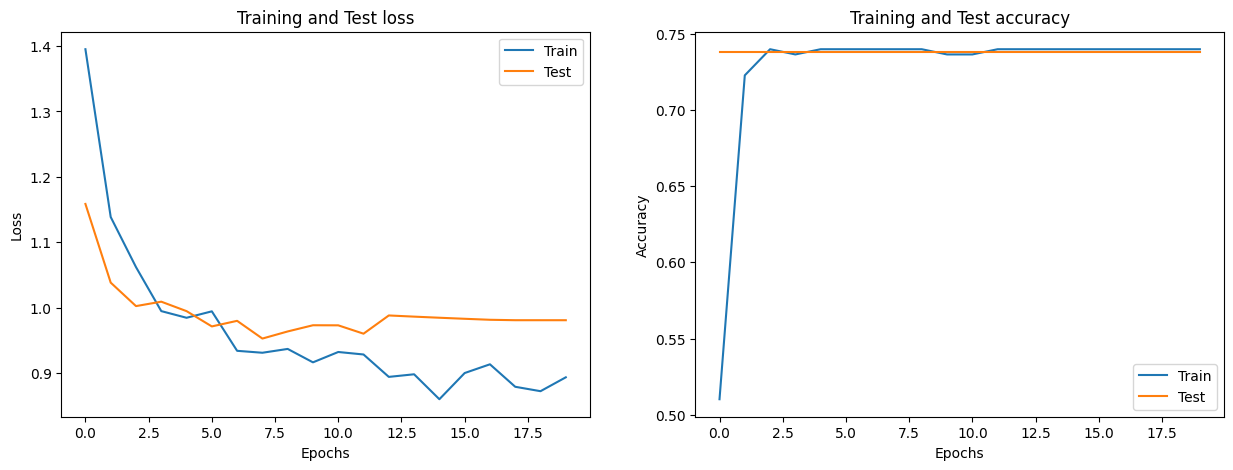

**************************************************
RNN Model with Classifier:GloVe
**************************************************


**************************************************
RNN Model with Classifier:Transformer
**************************************************


In [ ]:
shortlisted_models= [
                      "RNN Model with Classifier:Word2Vec",
                      "RNN Model with Classifier:GloVe",
                      "RNN Model with Classifier:Transformer"
                     ]

substring_to_find = "Upsampled"

for model_name in shortlisted_models:
  if substring_to_find in model_name:
    history= rnn_models_hist_res.get(model_name)
  else:
    history= rnn_models_hist.get(model_name)

  print('*'*50)
  print(model_name)
  print('*'*50)

  epochs2 = range(len(history.history['loss'])) # Get number of epochs
  #epochs2 = range(1,101)
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  ax1.plot(epochs2, history.history['loss'], label = 'Train')
  ax1.plot(epochs2, history.history['val_loss'], label = 'Test')
  ax1.set_title('Training and Test loss')
  ax1.set(xlabel='Epochs', ylabel='Loss')
  ax1.legend()

  ax2.plot(epochs2, history.history['categorical_accuracy'], label='Train')
  ax2.plot(epochs2, history.history['val_categorical_accuracy'], label='Test')
  #ax2.plot(epochs2, history.history['accuracy'], 'g', label='Training accuracy')
  #ax2.plot(epochs2, history.history['val_accuracy'], 'b', label='validation accuracy')
  ax2.set_title('Training and Test accuracy')
  ax2.set(xlabel='Epochs', ylabel='Accuracy')
  ax2.legend()
  plt.show()

#### Confusion Matrix and Classification Report

In [ ]:
shortlisted_models2= [
                      "RNN Model with Classifier:Word2Vec",
                      "RNN Model with Classifier:GloVe",
                      "RNN Model with Classifier:Transformer"
                     ]

substring_to_find2 = "Upsampled"
classifier_Word2Vec = "Word2Vec"
classifier_Glove = "GloVe"
classifier_Transformer = "Transformer"

for model_name in shortlisted_models2:
  if substring_to_find2 in model_name:
    best_model_m2 = rnn_models_res.get(model_name)
  else :
    best_model_m2 = rnn_models.get(model_name)

  if classifier_Transformer in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test_bert_rnn)
  elif classifier_Glove in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test_glove_rnn)
  elif classifier_Word2Vec in model_name:
    y_test_pred_m2=best_model_m2.predict(X_test_w2v2_rnn)

  print('*'*50)
  print(model_name)
  print('*'*50)

  y_test_pred_final_m2 = []
  for i in y_test_pred_m2:
    y_test_pred_final_m2.append(np.argmax(i))

  y_test_dummy_final= []
  for i in y_test_dummy:
    y_test_dummy_final.append(np.argmax(i))

  y_test = np.argmax(y_test_dummy_rnn, axis=-1)
  print("\nClassification Report:\n")
  #print(classification_report(y_test_dummy_final, y_test_pred_final_m2))
  print(classification_report(y_test, y_test_pred_final_m2))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
**************************************************
RNN Model with Classifier:Word2Vec
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        93
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         3

    accuracy                           0.74       126
   macro avg       0.15      0.20      0.17       126
weighted avg       0.54      0.74      0.63       126

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step
**************************************************
RNN Model with Classifier:GloVe
**************************************************

Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        93
   

**Observations:**
- Observing the Curves and reports, even though the shortlisted models results in good accuracy score of 74% and loss curves converge, the classification report shows the **models struggle to classify accident levels other than 0**. So we can either try improving RNN model with upsampled data OR try with LTSM models. We decided to explore the LSTM models as well.


### **LSTM**

#### Process Structured Features

In [ ]:
# Preprocess the data

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
le = LabelEncoder()
df['label'] = le.fit_transform(df['Accident Level'])

# Separate features
text_col = 'final_cleaned_text'
target_col = 'label'
structured_cols = [col for col in df.columns if col not in [text_col, 'Accident Level', target_col]]

# Encode categoricals and scale numericals
categorical_cols = df[structured_cols].select_dtypes(include='object').columns.tolist()
numerical_cols = df[structured_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

X_structured = pd.concat([df_encoded, df_scaled], axis=1)
y = df[target_col]

#### Spliting Data into Train and Test

In [ ]:
from tensorflow.keras.utils import to_categorical

X_text = df[text_col]
y = df['label']
y_cat = to_categorical(y)

X_text_train, X_text_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    X_text, X_structured, y_cat, test_size=0.2, stratify=y, random_state=42
)

#### Preparation of Embeddings (Original Data)

##### Word2Vec

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text_train)
X_train_seq = tokenizer.texts_to_sequences(X_text_train)
X_test_seq = tokenizer.texts_to_sequences(X_text_test)
max_len = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Word2Vec
w2v_model = Word2Vec(sentences=[text.split() for text in X_text_train], vector_size=100, window=5, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

##### GloVe

In [ ]:
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Cap_Project/Work/glove.6B.100d.txt.word2vec", binary=False)

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_glove = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix_glove[i] = glove_model[word]

##### MiniLM & BERT

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, AutoModel

# MiniLM
minilm_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_minilm = minilm_model.encode(X_text_train.tolist())
X_test_minilm = minilm_model.encode(X_text_test.tolist())

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = AutoModel.from_pretrained('bert-base-uncased')

def bert_embed(texts):
    encoded = bert_tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = bert_model(**encoded)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

X_train_bert = bert_embed(X_text_train)
X_test_bert = bert_embed(X_text_test)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

#### Model Building (Original Data)

**Create a logging dataframe**

In [ ]:
import json
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

metrics_log_1 = {}

##### Utility Functions

In [ ]:
# Hybrid Model that integrates embedded text and structured data

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, BatchNormalization

def build_hybrid_model(text_input_shape, struct_input_shape, embedding_matrix=None, vocab_size=None,
                       embed_dim=100, use_lstm=True, num_classes=3):

    # Text input branch
    text_input = Input(shape=(text_input_shape,), name='text_input')

    if use_lstm:
        x_text = Embedding(input_dim=vocab_size,
                           output_dim=embed_dim,
                           weights=[embedding_matrix],
                           input_length=text_input_shape,
                           trainable=False)(text_input)
        x_text = LSTM(128, return_sequences=True)(x_text)
        x_text = Dropout(0.3)(x_text)
        x_text = LSTM(64, return_sequences=False)(x_text)
        x_text = Dropout(0.3)(x_text)
        x_text = Dense(32, activation='relu')(x_text)
        x_text = BatchNormalization()(x_text)
        x_text = Dropout(0.2)(x_text)
    else:
        x_text = Dense(128, activation='relu')(text_input)

    # Structured input branch
    struct_input = Input(shape=(struct_input_shape,), name='struct_input')
    x_struct = Dense(64, activation='relu')(struct_input)
    x_struct = Dropout(0.3)(x_struct)

    # Merge branches
    x = Concatenate()([x_text, x_struct])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Build and compile
    model = Model(inputs=[text_input, struct_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# Function definition that runs the model and logs vital outputs
from sklearn.utils.class_weight import compute_class_weight

def train_and_evaluate(name, X_text_train, X_text_test, X_struct_train, X_struct_test,
                       embedding_matrix=None, vocab_size=None, text_input_shape=None, use_lstm=True):

    model = build_hybrid_model(text_input_shape, X_struct_train.shape[1], embedding_matrix, vocab_size, use_lstm=use_lstm, num_classes=y_train.shape[1])

    history = model.fit([X_text_train, X_struct_train], y_train, validation_data=([X_text_test, X_struct_test], y_test),
                        epochs=5, batch_size=32, verbose=0)


    y_pred = model.predict([X_text_test, X_struct_test]).argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    # Log metrics
    metrics_log_1[name] = {
        "accuracy": round(acc, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1_score": round(f1, 4),
        "confusion_matrix": confusion_matrix(y_true, y_pred).tolist(),
        "loss_curve": {
            "train_loss": [round(l, 4) for l in history.history['loss']],
            "val_loss": [round(l, 4) for l in history.history['val_loss']]
        },
        "y_pred": y_pred.tolist(),
        "y_true": y_true.tolist()
    }

    # Plot loss and accuracy
    import matplotlib.pyplot as plt

    # Create side-by-side plots
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Curve
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Val Loss')
    axs[0].set_title(f'{name} Loss Curve')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Accuracy Curve
    axs[1].plot(history.history['accuracy'], label='Train Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axs[1].set_title(f'{name} Accuracy Curve')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


    return model

**Define model invoking using embeddings**

In [ ]:
# Create list of models, along with their invoking parameters
embedding_runs = [
    {
        "name": "Word2Vec_default",
        "X_train": X_train_pad,
        "X_test": X_test_pad,
        "embedding_matrix": embedding_matrix,
        "vocab_size": len(tokenizer.word_index) + 1,
        "text_input_shape": max_len,
        "use_lstm": True
    },
    {
        "name": "GloVe_default",
        "X_train": X_train_pad,
        "X_test": X_test_pad,
        "embedding_matrix": embedding_matrix_glove,
        "vocab_size": len(tokenizer.word_index) + 1,
        "text_input_shape": max_len,
        "use_lstm": True
    },
    {
        "name": "MiniLM_default",
        "X_train": X_train_minilm,
        "X_test": X_test_minilm,
        "embedding_matrix": None,
        "vocab_size": None,
        "text_input_shape": X_train_minilm.shape[1],
        "use_lstm": False
    },
    {
        "name": "BERT_default",
        "X_train": X_train_bert,
        "X_test": X_test_bert,
        "embedding_matrix": None,
        "vocab_size": None,
        "text_input_shape": X_train_bert.shape[1],
        "use_lstm": False
    }
]

##### Model Training

**Create a model registry**

In [ ]:
trained_models_1 = {}

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step


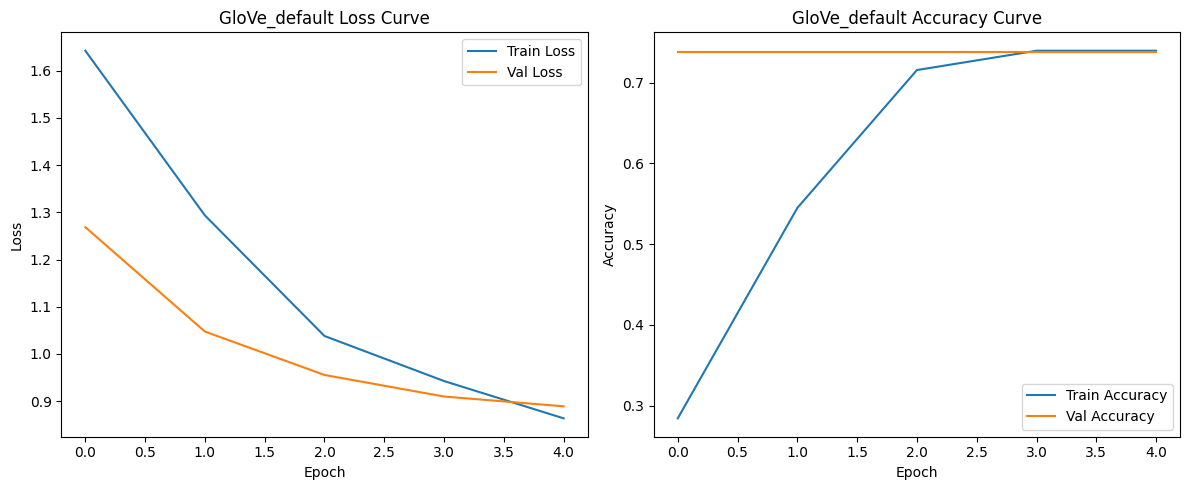

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


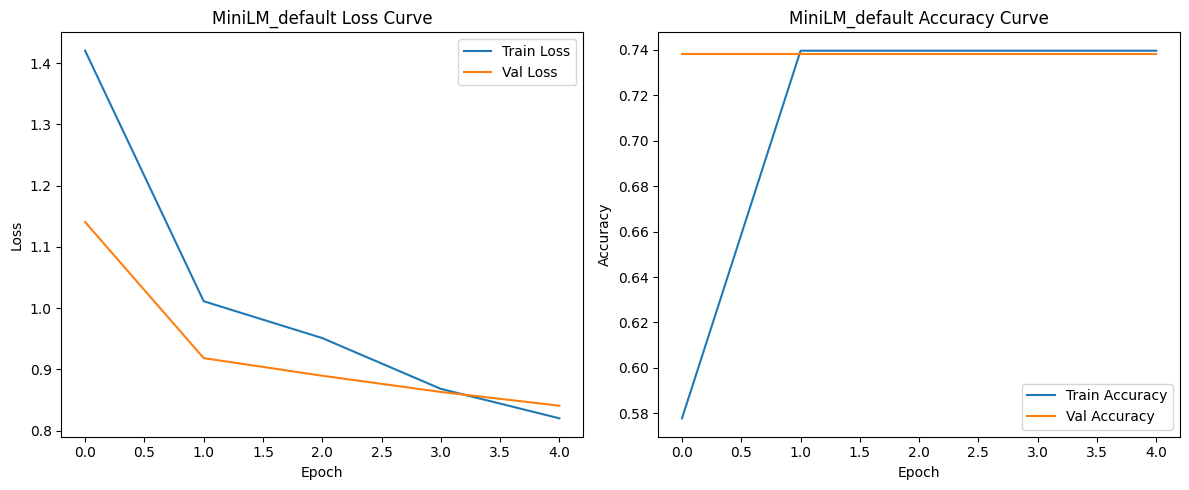

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


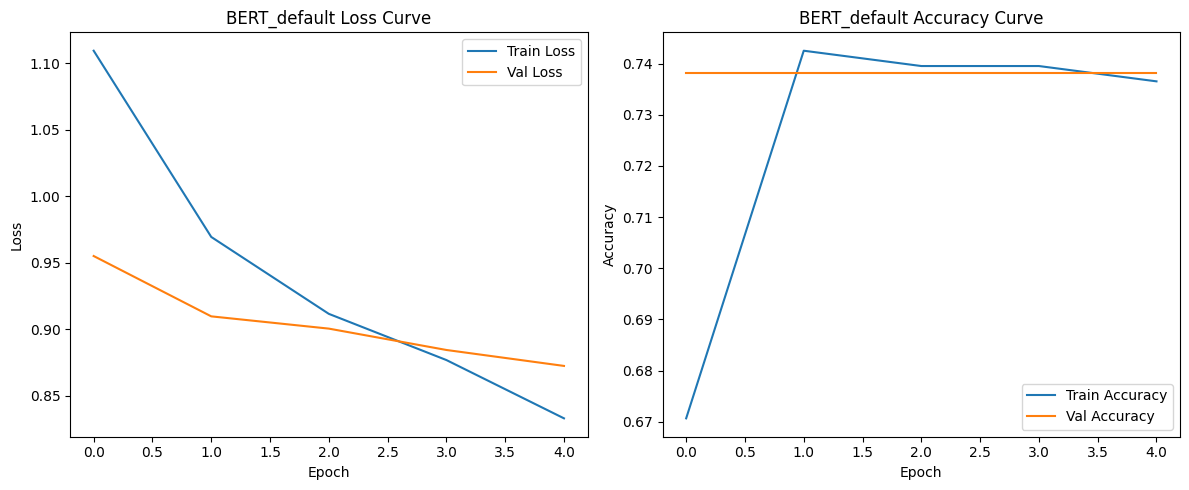

In [ ]:
# Invoke running of models in an iterative loop and store the model information
for config in embedding_runs:
    model = train_and_evaluate(
        config["name"],
        config["X_train"],
        config["X_test"],
        X_struct_train,
        X_struct_test,
        config["embedding_matrix"],
        config["vocab_size"],
        config["text_input_shape"],
        use_lstm=config["use_lstm"]
    )
    trained_models_1[config["name"]] = model  # Store for reuse

**Save Metrics to file**

In [ ]:
with open("metrics_log_1.json", "w") as f:
    json.dump(metrics_log_1, f, indent=2)

##### Confusion Matrix and Classification Report

**Confusion Matrix for all the models**

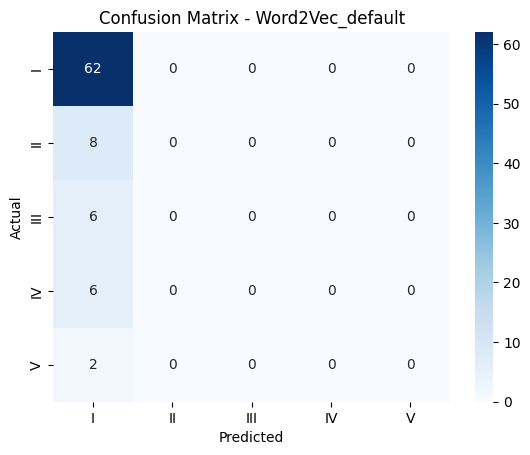


 Accuracy Score: 0.7381

------------------------------------------------------------




 Accuracy Score: 0.7381

------------------------------------------------------------




 Accuracy Score: 0.7381

------------------------------------------------------------



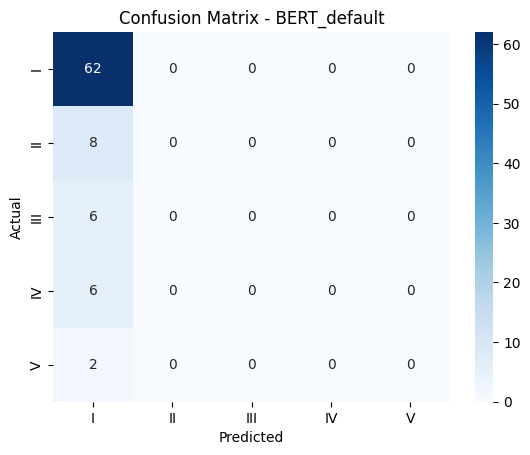


 Accuracy Score: 0.7381

------------------------------------------------------------



In [ ]:
embed_models = ['Word2Vec_default', 'GloVe_default', 'MiniLM_default', 'BERT_default']
for i in embed_models:
  cm = metrics_log_1[i]["confusion_matrix"]
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix - " + str(i))
  plt.show()

  # Add blank line between plots
  print("\n Accuracy Score: " + str(metrics_log_1[i]["accuracy"]))
  print("\n" + "-"*60 + "\n")

**Classification Report**

In [ ]:
for model_name in metrics_log_1:
    y_pred = metrics_log_1[model_name]["y_pred"]
    y_true = metrics_log_1[model_name]["y_true"]
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, digits=4))


Classification Report for Word2Vec_default:

              precision    recall  f1-score   support

           0     0.7381    1.0000    0.8493        62
           1     0.0000    0.0000    0.0000         8
           2     0.0000    0.0000    0.0000         6
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         2

    accuracy                         0.7381        84
   macro avg     0.1476    0.2000    0.1699        84
weighted avg     0.5448    0.7381    0.6269        84


Classification Report for GloVe_default:

              precision    recall  f1-score   support

           0     0.7381    1.0000    0.8493        62
           1     0.0000    0.0000    0.0000         8
           2     0.0000    0.0000    0.0000         6
           3     0.0000    0.0000    0.0000         6
           4     0.0000    0.0000    0.0000         2

    accuracy                         0.7381        84
   macro avg     0.1476    0.2000    0.169

**Model performance**

In [ ]:
vit_met = ['accuracy', 'precision', 'recall', 'f1_score']

metric_df = pd.DataFrame()

for i in embed_models:
  for p in vit_met:
    metric_df.loc[i,p] = metrics_log_1[i][p]
    metric_df.loc[i,'train_loss'] = metrics_log_1[i]["loss_curve"]['train_loss'][-1]
    metric_df.loc[i,'val_loss'] = metrics_log_1[i]["loss_curve"]['val_loss'][-1]

In [ ]:
metric_df

accuracy  train_loss  val_loss  precision  recall  f1_score
Word2Vec_default    0.7381      0.8668    0.8970     0.5448  0.7381    0.6269
GloVe_default       0.7381      0.8637    0.8892     0.5448  0.7381    0.6269
MiniLM_default      0.7381      0.8201    0.8407     0.5448  0.7381    0.6269
BERT_default        0.7381      0.8329    0.8723     0.5448  0.7381    0.6269

**Observations:**
* All the models have given Accuracy above 70%
* But the individual class predictions are not satisfactory, as per Classification_report.
* This is primarily because of Imbalanced Class distrubutions as we have seen in Exploratory Data Analysis
* As a next step, the data will be Upscaled using SMOTE to remove the class imbalance and re-run the same models and assess the performance.

#### Preparation of Embeddings (Upsampled Training Data)

##### Preprocess & Split the data

**Import data from saved file**

In [ ]:
df = pd.read_excel("/content/drive/My Drive/Cap_Project/Work/clean_data.xlsx")

In [ ]:
# Preprocess the data

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target
le = LabelEncoder()
df['label'] = le.fit_transform(df['Accident Level'])

# Separate features
text_col = 'final_cleaned_text'
target_col = 'label'
structured_cols = [col for col in df.columns if col not in [text_col, 'Accident Level', target_col]]

# Encode categoricals and scale numericals
categorical_cols = df[structured_cols].select_dtypes(include='object').columns.tolist()
numerical_cols = df[structured_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

X_struct = pd.concat([df_encoded, df_scaled], axis=1)
y = df[target_col]

In [ ]:
df_text = df[['final_cleaned_text', 'label']].reset_index(drop=True)

**Apply SMOTE to Structured Feature**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_struct_bal, y_bal = smote.fit_resample(X_struct, df['label'])

**Reattach Text and Split**

In [ ]:
import numpy as np

# Create a new text column by sampling from original text per class
def sample_texts(y_bal, df_text):
    sampled_texts = []
    for label in y_bal:
        candidates = df_text[df_text['label'] == label]['final_cleaned_text']
        sampled_texts.append(np.random.choice(candidates.values))
    return sampled_texts

X_text_bal = sample_texts(y_bal, df_text)

**Split the data for Model training**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

y_bal_cat = to_categorical(y_bal)

X_text_train, X_text_test, X_struct_train, X_struct_test, y_train, y_test = train_test_split(
    X_text_bal, X_struct_bal, y_bal_cat, test_size=0.2, stratify=y_bal, random_state=42
)

##### Word2Vec

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text_train)
X_train_seq = tokenizer.texts_to_sequences(X_text_train)
X_test_seq = tokenizer.texts_to_sequences(X_text_test)
max_len = max([len(x) for x in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

w2v_model = Word2Vec(sentences=[text.split() for text in X_text_train], vector_size=100, window=5, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

##### GloVe

In [ ]:
from gensim.models import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("/content/drive/My Drive/Cap_Project/Work/glove.6B.100d.txt.word2vec", binary=False)

embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_glove = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix_glove[i] = glove_model[word]

##### MiniLM & BERT

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer, AutoModel

# MiniLM
minilm_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_minilm = minilm_model.encode(X_text_train)
X_test_minilm = minilm_model.encode(X_text_test)

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = AutoModel.from_pretrained('bert-base-uncased')

def bert_embed(texts):
    encoded = bert_tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        outputs = bert_model(**encoded)
    return outputs.last_hidden_state[:, 0, :].numpy()  # CLS token

X_train_bert = bert_embed(X_text_train)
X_test_bert = bert_embed(X_text_test)

#### Model Building (Upsampled Training Data)

**Create a Logging Dictionary**

In [ ]:
import json
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

metrics_log = {}

##### Utility Functions

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, BatchNormalization

def build_hybrid_model(text_input_shape, struct_input_shape, embedding_matrix=None, vocab_size=None,
                       embed_dim=100, use_lstm=True, num_classes=3):

    # Text input branch
    text_input = Input(shape=(text_input_shape,), name='text_input')

    if use_lstm:
        x_text = Embedding(input_dim=vocab_size,
                           output_dim=embed_dim,
                           weights=[embedding_matrix],
                           input_length=text_input_shape,
                           trainable=False)(text_input)
        x_text = LSTM(128, return_sequences=True)(x_text)
        x_text = Dropout(0.3)(x_text)
        x_text = LSTM(64, return_sequences=False)(x_text)
        x_text = Dropout(0.3)(x_text)
        x_text = Dense(32, activation='relu')(x_text)
        x_text = BatchNormalization()(x_text)
        x_text = Dropout(0.2)(x_text)
    else:
        x_text = Dense(128, activation='relu')(text_input)

    # Structured input branch
    struct_input = Input(shape=(struct_input_shape,), name='struct_input')
    x_struct = Dense(64, activation='relu')(struct_input)
    x_struct = Dropout(0.3)(x_struct)

    # Merge branches
    x = Concatenate()([x_text, x_struct])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    output = Dense(num_classes, activation='softmax')(x)

    # Build and compile
    model = Model(inputs=[text_input, struct_input], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

def train_and_evaluate(name, X_text_train, X_text_test, X_struct_train, X_struct_test,
                       embedding_matrix=None, vocab_size=None, text_input_shape=None, use_lstm=True):

    model = build_hybrid_model(text_input_shape, X_struct_train.shape[1], embedding_matrix, vocab_size, use_lstm=use_lstm, num_classes=y_train.shape[1])

    history = model.fit([X_text_train, X_struct_train], y_train, validation_data=([X_text_test, X_struct_test], y_test),
                        epochs=5, batch_size=32, verbose=0)


    y_pred = model.predict([X_text_test, X_struct_test]).argmax(axis=1)
    y_true = y_test.argmax(axis=1)

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    # Log metrics
    metrics_log[name] = {
        "accuracy": round(acc, 4),
        "precision": round(precision, 4),
        "recall": round(recall, 4),
        "f1_score": round(f1, 4),
        "confusion_matrix": confusion_matrix(y_true, y_pred).tolist(),
        "loss_curve": {
            "train_loss": [round(l, 4) for l in history.history['loss']],
            "val_loss": [round(l, 4) for l in history.history['val_loss']]
        },
        "acc_curve": {
            "train_accuracy": [round(l, 4) for l in history.history['accuracy']],
            "val_accuracy": [round(l, 4) for l in history.history['val_accuracy']]
        },
        "y_pred": y_pred.tolist(),
        "y_true": y_true.tolist()
    }

    #print(f"\n {name} Metrics:")
    #print(json.dumps(metrics_log[name], indent=2))

    return model

**Define model invoking using embeddings**

In [ ]:
embedding_runs = [
    {
        "name": "Word2Vec",
        "X_train": X_train_pad,
        "X_test": X_test_pad,
        "embedding_matrix": embedding_matrix,
        "vocab_size": len(tokenizer.word_index) + 1,
        "text_input_shape": max_len,
        "use_lstm": True
    },
    {
        "name": "GloVe",
        "X_train": X_train_pad,
        "X_test": X_test_pad,
        "embedding_matrix": embedding_matrix_glove,
        "vocab_size": len(tokenizer.word_index) + 1,
        "text_input_shape": max_len,
        "use_lstm": True
    },
    {
        "name": "MiniLM",
        "X_train": X_train_minilm,
        "X_test": X_test_minilm,
        "embedding_matrix": None,
        "vocab_size": None,
        "text_input_shape": X_train_minilm.shape[1],
        "use_lstm": False
    },
    {
        "name": "BERT",
        "X_train": X_train_bert,
        "X_test": X_test_bert,
        "embedding_matrix": None,
        "vocab_size": None,
        "text_input_shape": X_train_bert.shape[1],
        "use_lstm": False
    }
]

##### Model Training

**Create a model registry**

In [ ]:
trained_models = {}


**Train the models using different Embeddings**

In [ ]:
for config in embedding_runs:
    model = train_and_evaluate(
        config["name"],
        config["X_train"],
        config["X_test"],
        X_struct_train,
        X_struct_test,
        config["embedding_matrix"],
        config["vocab_size"],
        config["text_input_shape"],
        use_lstm=config["use_lstm"]
    )
    trained_models[config["name"]] = model  # Store for reuse


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


**Save Metrics to file**

In [ ]:
with open("metrics_log.json", "w") as f:
    json.dump(metrics_log, f, indent=2)

**Performance Comparision**

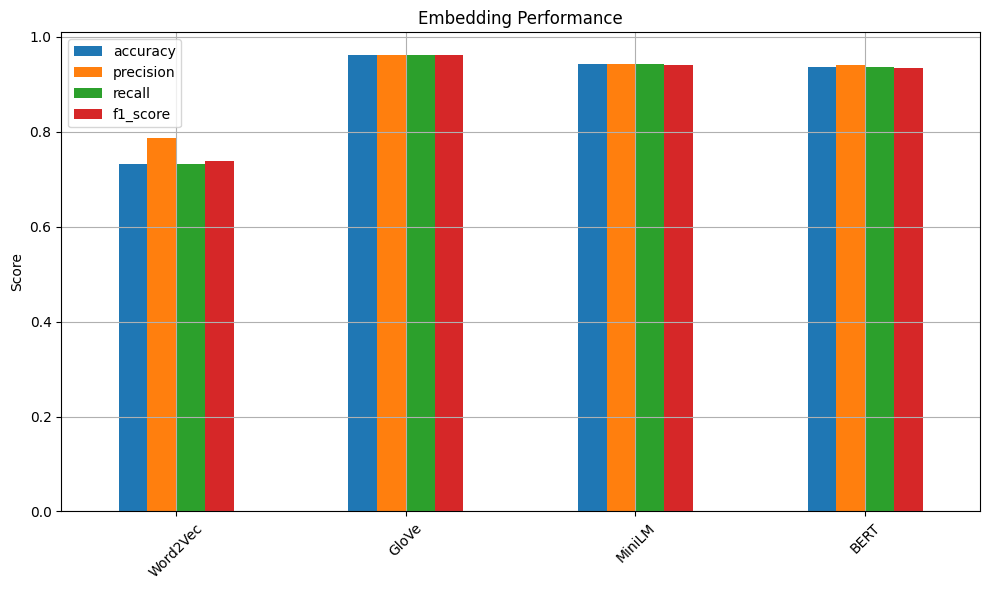

In [ ]:
df_metrics = pd.DataFrame(metrics_log).T
df_metrics[['accuracy', 'precision', 'recall', 'f1_score']].astype(float).plot(
    kind='bar', figsize=(10, 6), title="Embedding Performance"
)
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### Ploting the Loss and Accuracy Curves

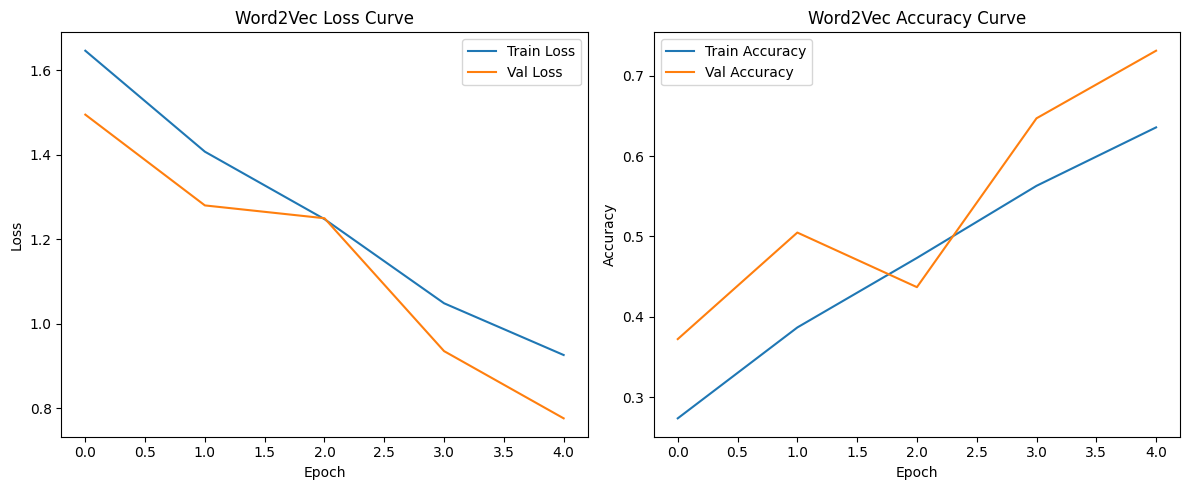

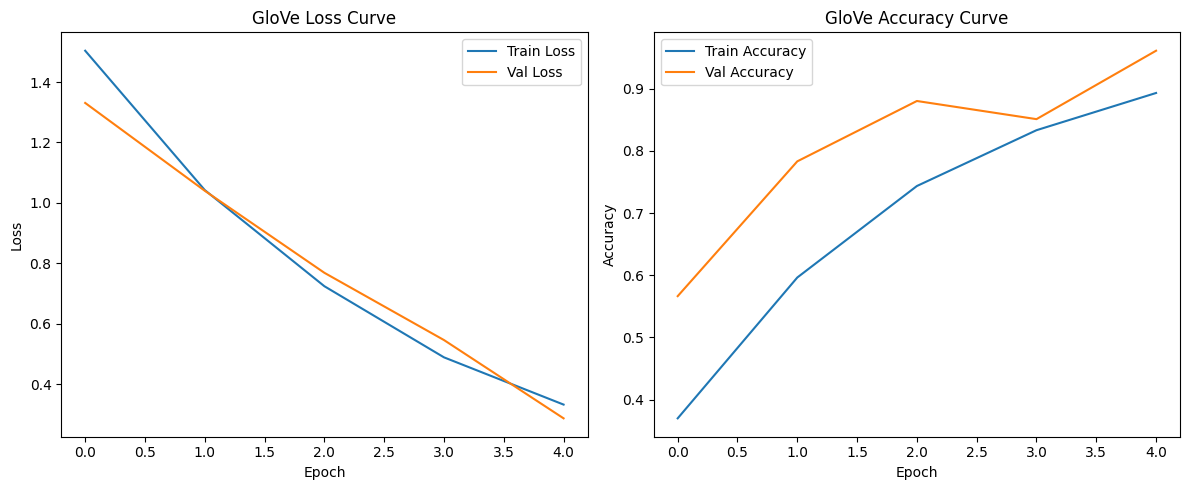

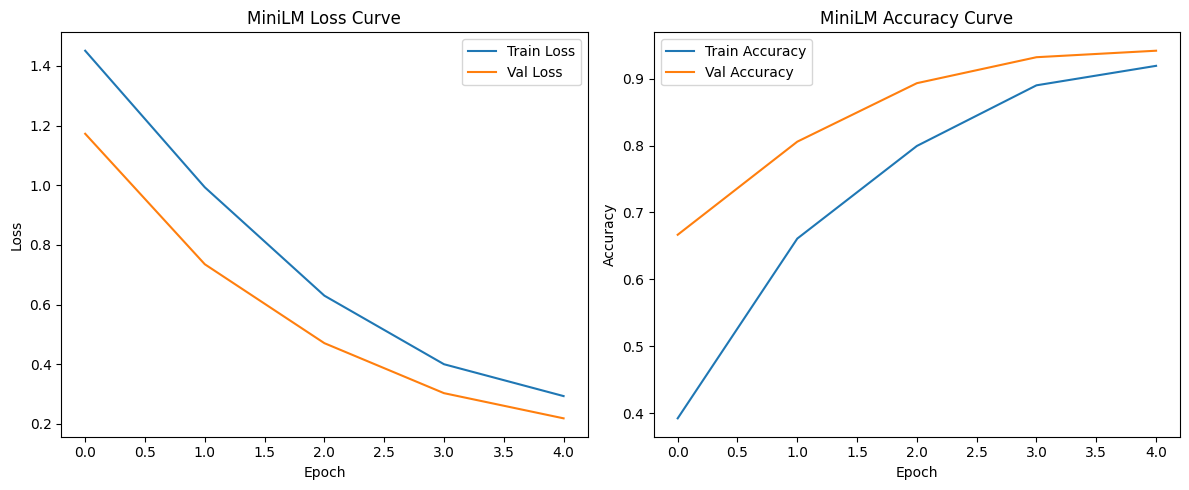

In [ ]:
# Generate Loss and Accuracy curves for each model

for i in trained_models.keys():
  # Create side-by-side plots
  fig, axs = plt.subplots(1, 2, figsize=(12, 5))

  # Loss Curve
  axs[0].plot(metrics_log[i]["loss_curve"]['train_loss'], label='Train Loss')
  axs[0].plot(metrics_log[i]["loss_curve"]['val_loss'], label='Val Loss')
  axs[0].set_title(f'{i} Loss Curve')
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Loss')
  axs[0].legend()

  # Accuracy Curve
  axs[1].plot(metrics_log[i]["acc_curve"]['train_accuracy'], label='Train Accuracy')
  axs[1].plot(metrics_log[i]["acc_curve"]['val_accuracy'], label='Val Accuracy')
  axs[1].set_title(f'{i} Accuracy Curve')
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Accuracy')
  axs[1].legend()

  plt.tight_layout()
  plt.show()

* All the models are showing improved accuracy performance and loss curves.

##### Confusion Matrix and Classification Report

Confusion Matrix


 Accuracy Score: 0.7314

------------------------------------------------------------



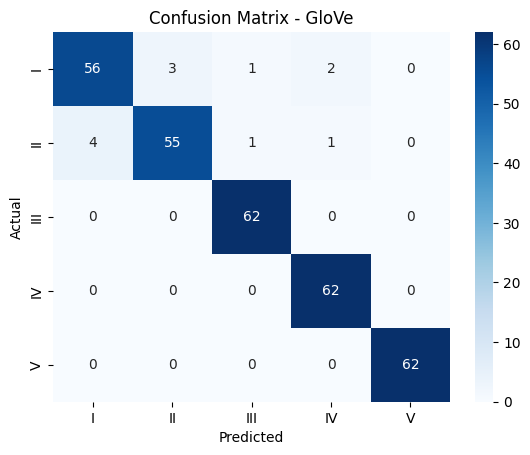


 Accuracy Score: 0.9612

------------------------------------------------------------




 Accuracy Score: 0.9417

------------------------------------------------------------



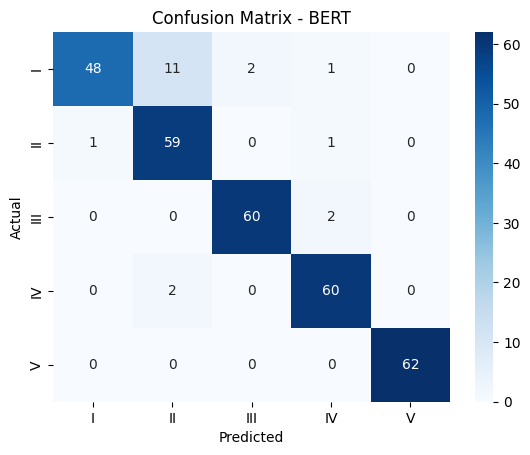


 Accuracy Score: 0.9353

------------------------------------------------------------



In [ ]:
# Confusion Matrix
embed_models = ['Word2Vec', 'GloVe', 'MiniLM', 'BERT']
for i in embed_models:
  cm = metrics_log[i]["confusion_matrix"]
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix - " + str(i))
  plt.show()

  # Add blank line between plots
  print("\n Accuracy Score: " + str(metrics_log[i]["accuracy"]))
  print("\n" + "-"*60 + "\n")

Classification Report

In [ ]:
for model_name in metrics_log:
    y_pred = metrics_log[model_name]["y_pred"]
    y_true = metrics_log[model_name]["y_true"]
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_true, y_pred, digits=4))



Classification Report for Word2Vec:

              precision    recall  f1-score   support

           0     0.9250    0.5968    0.7255        62
           1     0.4766    0.8361    0.6071        61
           2     0.6667    0.5484    0.6018        62
           3     0.8750    0.6774    0.7636        62
           4     0.9841    1.0000    0.9920        62

    accuracy                         0.7314       309
   macro avg     0.7855    0.7317    0.7380       309
weighted avg     0.7865    0.7314    0.7384       309


Classification Report for GloVe:

              precision    recall  f1-score   support

           0     0.9333    0.9032    0.9180        62
           1     0.9483    0.9016    0.9244        61
           2     0.9688    1.0000    0.9841        62
           3     0.9538    1.0000    0.9764        62
           4     1.0000    1.0000    1.0000        62

    accuracy                         0.9612       309
   macro avg     0.9608    0.9610    0.9606       309
weig

##### Model Performance

In [ ]:
metric_df_opt = pd.DataFrame()

for i in embed_models:
  for p in vit_met:
    metric_df_opt.loc[i,p] = metrics_log[i][p]
    metric_df_opt.loc[i,'train_loss'] = metrics_log[i]["loss_curve"]['train_loss'][-1]
    metric_df_opt.loc[i,'val_loss'] = metrics_log[i]["loss_curve"]['val_loss'][-1]

In [ ]:
metric_df_opt

accuracy  train_loss  val_loss  precision  recall  f1_score
Word2Vec    0.7314      0.9263    0.7766     0.7865  0.7314    0.7384
GloVe       0.9612      0.3328    0.2873     0.9609  0.9612    0.9607
MiniLM      0.9417      0.2933    0.2187     0.9421  0.9417    0.9411
BERT        0.9353      0.3573    0.2475     0.9412  0.9353    0.9346

#### Final Model Selection

* Observaing the metric stats on all the models with original data and upsampled data, models trained with upsampled data have shown improved performance.
* **LSTM Model with GloVe Classifer** trained with upsample data showing best metrics with Accuracy& F1 score of 96% on training data, so we are selecting it as our **Best model**.

#### Best Model Performance Metrics (Test Accuracy) and Saving the Model, Metrics

**Best Model summary**

In [ ]:
trained_models["GloVe"].summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_input          │ (None, 95)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 95, 100)   │    228,100 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 95, 128)   │    117,248 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 95, 128)   │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 64)        │     49,408 │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 64)        │          0 │ lstm_7[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 32)        │      2,080 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ struct_input        │ (None, 64)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_20[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │      4,160 │ struct_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32)        │          0 │ batch_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 64)        │          0 │ dense_21[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 96)        │          0 │ dropout_21[0][0], │
│ (Concatenate)       │                   │            │ dropout_22[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      6,208 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 64)        │          0 │ dense_22[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 5)         │        325 │ dropout_23[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 766,645 (2.92 MB)

 Trainable params: 179,493 (701.14 KB)

 Non-trainable params: 228,164 (891.27 KB)

 Optimizer params: 358,988 (1.37 MB)

**Saving the GloVe model in .h5 format**

In [ ]:
glove_model = trained_models["GloVe"]

# Save the model
glove_model.save("/content/drive/My Drive/Cap_Project/Work/glove_hybrid_model.h5")

**Load the saved model**

In [ ]:
# Whenever required, uncomment the following lines and load the saved model

#from tensorflow.keras.models import load_model

# Load the model
# glove_model = load_model("/content/drive/My Drive/Cap_Project/Work/glove_hybrid_model.h5")

**Save embedding tokenizer**

In [ ]:
import pickle

# Save tokenizer
with open("/content/drive/My Drive/Cap_Project/Work/tokenizer_glove.pkl", "wb") as f:
    pickle.dump({"tokenizer": tokenizer, "max_len": max_len}, f)

**Tokenize entire dataset**

In [ ]:
text_new = df['final_cleaned_text']

In [ ]:
# Load tokenizer
with open("/content/drive/My Drive/Cap_Project/Work/tokenizer_glove.pkl", "rb") as f:
    data = pickle.load(f)
tokenizer = data["tokenizer"]
max_len = data["max_len"]

# Use it to preprocess new text
X_test_seq = tokenizer.texts_to_sequences(text_new)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)  # Use same max_len as training

**Predict Target variable on new data**

In [ ]:
glove_model = trained_models["GloVe"]

In [ ]:
# Predict on new data
# y_new_pred = model.predict([X_new_text_pad, X_new_struct])
y_new_pred = glove_model.predict([X_test_pad, X_struct])

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


**Create a new Dataframe and add the predicted Target variable**

In [ ]:
df_new = df.copy()

In [ ]:
# Convert from probabilities to class labels
y_new_pred_labels = y_new_pred.argmax(axis=1)

In [ ]:
df_new['Predicted_Accident_Level'] = y_new_pred_labels

**Aligning the Predicted class labels to actual labels**

In [ ]:
# Converting the predicted accicent levels to same labels as of Accident level
label_map = {0: 'I', 1: 'II', 2: 'III', 3: 'IV', 4: 'V'}
df_new['Predicted_Accident_Level'] = df_new['Predicted_Accident_Level'].map(label_map)

**Calculating the Test Accuracy**

In [ ]:
Test_accuracy = accuracy_score(df_new['Accident Level'], df_new['Predicted_Accident_Level'])
print(f"Accuracy: {Test_accuracy:.4f}")

Accuracy: 0.8493


**Plot Predicted versus Actual value**

<Axes: xlabel='Accident_Level', ylabel='Count'>

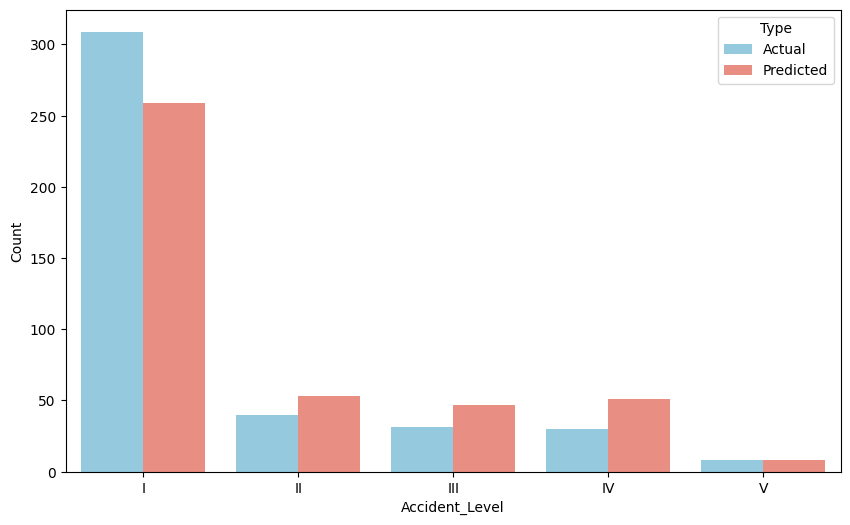

In [ ]:
# Define consistent class order
class_order = ['I', 'II', 'III', 'IV', 'V']

# Count actual and predicted values
actual_counts = df_new['Accident Level'].value_counts().reindex(class_order, fill_value=0)
predicted_counts = df_new['Predicted_Accident_Level'].value_counts().reindex(class_order, fill_value=0)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Accident_Level': class_order * 2,
    'Count': list(actual_counts.values) + list(predicted_counts.values),
    'Type': ['Actual'] * len(class_order) + ['Predicted'] * len(class_order)
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident_Level', y='Count', hue='Type', data=plot_df, palette=['skyblue', 'salmon'])

# Add counts on bars

**Confusion Matrix Heatmap**

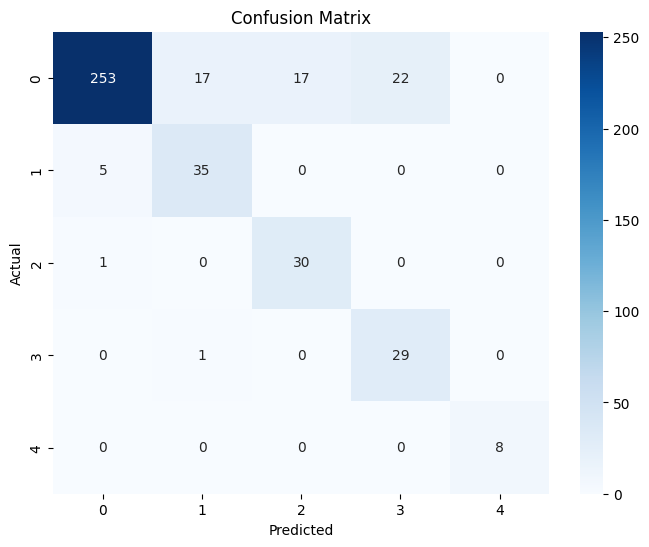

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_new['Accident Level'], df_new['Predicted_Accident_Level'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Class-wise Predictions**

In [ ]:
glove1_lstm= df_new['Accident Level'].value_counts().to_frame().reset_index()
glove2_lstm= df_new['Predicted_Accident_Level'].value_counts().to_frame().reset_index()

glove1_lstm.columns = ['Accident Level', 'PAL_Count']
glove2_lstm.columns = ['Predicted_Accident_Level', 'PPAL_Count']

#Concatenate the DataFrames
# Side-by-side concatenation (using join='outer' to include all unique values)
glove3_lstm = pd.concat([glove1_lstm, glove2_lstm], axis=1, join='outer')
glove3_lstm

Accident Level  PAL_Count Predicted_Accident_Level  PPAL_Count
0              I        309                        I         259
1             II         40                       II          53
2            III         31                       IV          51
3             IV         30                      III          47
4              V          8                        V           8

**Observations:**
* Classifications are predicted almost at 85% accuracy
* The entire dataset is considered as the Test data
* This data still has imbalanced classes in Target variable - Accident Level


## **Final Model Selection**

In [ ]:
!pip install opencv-python

We have analysed the data and predicted the "Accident Level" with models built using
1. Basic ML Classifiers and Embeddings combinations
2. Neural Network Classifiers and Embeddings combinations
3. RNN & LSTM Classifiers and Embeddings combinations.

**Performance Metrics for Basic ML Classifers**

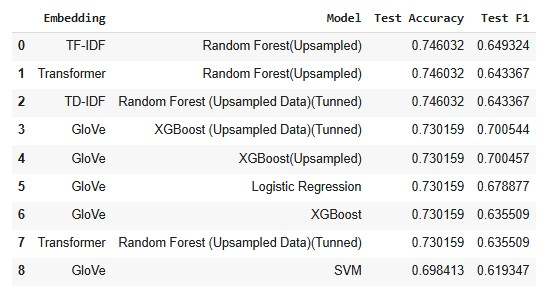

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#path="/content/drive/My Drive/Cap_Project/Work/"
path="/content/drive/MyDrive/PGP-AIML/Capstone/Project/"
ml_df = "ML_Classifier_FinalDF.jpg"
nn_df = "NN_Classifier_FinalDF.jpg"
rnn_df = "RNN_Classifier_FinalDF.jpg"
lstm_df = "LSTM_Classifier_FinalDF.jpg"

img = cv2.imread(path+ml_df)
cv2_imshow(img)

* Based on observations of all models and embeddings and its metrics, We **shortlisted**  below models:
    1. Random Forest Model (trained with upsampled data) with TF-IDF Embeddings on the original Data has highest Accuracy of 74.6% and F1 score of 65%.
    2. XGBoost Model (trained with upsampled data) with GloVe Embeddings on the original Data has highest F1 of 70% and Accuracy score of 73%.

* Based on observations of confusion matrix and classification reports (refer relevant sections above) about predictions of all accident level types we can conclude **XGBoost Model with GloVe Embeddings** is our **Best model using Basic ML Classifiers**  with **Highest F1 Score of 70% and Accuracy score of 73%** (slightly lesser than Random Forest + TD - IDF) model.

**Performance Metrics for Neural Network Classifers**

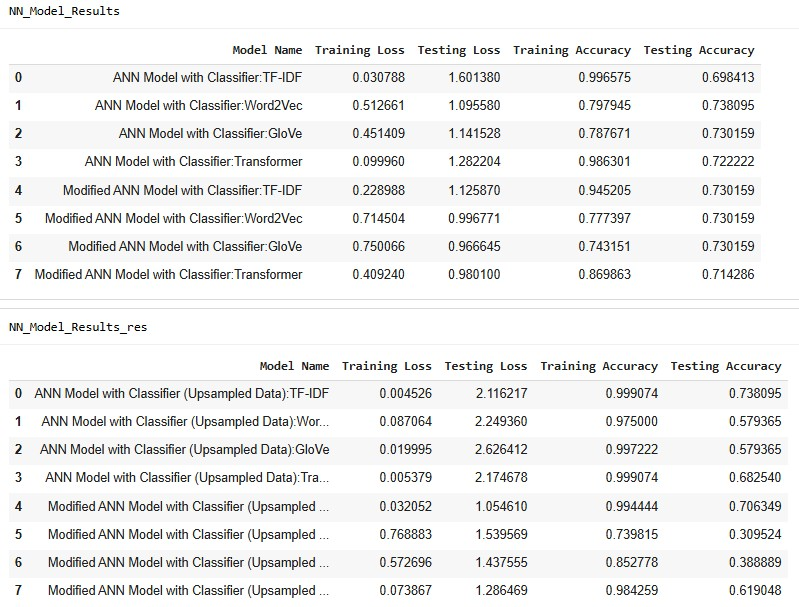

In [ ]:
img2 = cv2.imread(path+nn_df)
cv2_imshow(img2)

- Observing the gap between 'Testing Loss' & 'Training Loss' of all the combincations, the below models seems is good fit, with a minimal gap between the two final loss values, So we **shortlisted** the below models from this list to decide on final best model (NN Classifiers).
    1. Modified ANN Model with Classifier:GloVe
    2. Modified ANN Model with Classifier:Word2Vec
    3. Modified ANN Model with Classifier:Transformer
    4. Modified ANN Model with Classifier (Upsampled Data):Transformer

- Observing the Curves and reports, even though the first 3 models results in better accuracy (>70%), and loss curves converge, the classification report shows the models struggle to classify accident levels other than 0.
Though the model **"Modified ANN Model with Classifier:Transformer"** on upsampled data had wider gap between Training and Testing loss, and **Accuracy of 62%, the classification report shows the model is able to classify all accident levels other than 4**. So we select that as our Final **Best Model using NN Classifiers**.

**Performance Metrics for RNN Classifers**

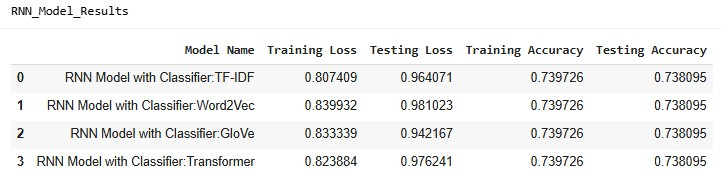

In [ ]:
img3 = cv2.imread(path+rnn_df)
cv2_imshow(img3)

- Observing the gap between Losses and Accuracies of all the combincations, the below models seems is good fit, with a minimal gap between the two final loss values with test accuracy of 74%. So we shortlist the models from this list.

  1. RNN Model with Classifier:Word2Vec
  2. RNN Model with Classifier:GloVe
  3. RNN Model with Classifier:Transformer

- Observing the Curves and reports, even though the shortlisted models results in good accuracy score of 74% and loss curves converge, because of the **Classification report showing the models struggle to classify accident levels other than 0** and model's high execution time, So we decided to proceed with LTSM models.

**Performance Metrics for LSTM Classifers**

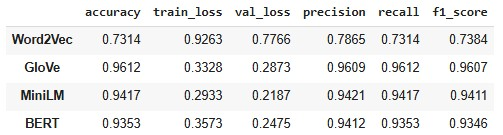

In [ ]:
img4 = cv2.imread(path+lstm_df)
cv2_imshow(img4)

* Observaing the metric stats on all the models with original data and upsampled data, models trained with upsampled data have shown improved performance.
* **LSTM Model with GloVe Classifer** trained with upsample data showing best metrics with Training Accuracy & F1 score of 96% on training data and **Test Accuracy of 85%**, so we are selecting it as our **Best model using LSTM Classifiers**.

**Verdict**: Based on the analysis, observations, metrics above, the model performed well on the original data and was able to classify all the accident level types with Test Accuracy of 85% is **LSTM Classifier with Glove Embeddings** is our **Final Best Model** to deal with this dataset and predict "Accident Level" based on other independent variables (columns).

## **Conclusions and Recommendations**

1. The Dataset is highly imbalanced and volume of the data is also on the lower side required upsampling to finalize the best model. Company needs to collect more data and collect data across all accident levels to keep the data balanced.
Data Duplicates should be avoided as much as possible.
2. Our final best model can be deployed to predict the Accident Level upfront and act on it.
3. The number of types/levels of Potential Accident Level and Accident Level can be kept in-sync.  The 'Critical Risk' categories can be made more granular instead of parking it under 'Others' for better analysis.
4. Common Incident Themes:
    - Human Involvement: Words like employee, operator, worker, assistant, collaborator indicate high human presence in the events.
    - Actions Leading to Incidents: Terms like causing, hit, cut, fall suggest physical contact or movement is often the cause.
    - Equipment/Environment References: equipment, pipe, truck, pump, floor highlight frequent involvement of machinery and workplace infrastructure
5. Situational Context: Words like time, moment, level, height, right hand, left hand may point to situational factors (e.g., location on site, part of the body affected).
6. Risk Indicators : Words such as injury, accident, fall highlight safety  concerns. Presence of height suggests possible fall-from-height risks. Right hand and left hand indicate hand injuries are common.
7. Plants in certain countries show systematically higher severity levels — this may point to:
    - Lower safety standards.
    - Higher operational complexity.
    - Differences in reporting culture.
8. Models using ML Classifiers can be improved by finding the best possible hypertunning parameters for better Accuracy and other performance metrics.
9. Neural Network based models can be improved further to reduce the gap between the losses and better accuracies.
10. Ways to reduce the RNN Model execution time and availablity of pre-trained RNN models if any to be explored.
11. Though our basic LSTM model gave us best test accuracy, we can further explore Bidirectional, CNN, Advanced CNN based LSTM models for better accuracy.
12.	Automate risk alerts for high-potential or severe incidents trigger immediate response.
13.	Predictive modeling should be applied to “potential accident levels” for preventive action.
14.	Develop dashboards showing accident trends by plant, country, and sector for management insights.
15.	Build and Integrate chatbot into reporting workflows for seamless adoption by safety teams.
16.	Use near-miss analysis to improve preventive measures before accidents escalate.
17.	Conduct targeted training programs based on recurring risk types and vulnerable groups.
18.	Focus on third-party safety policies since contractors are also frequently involved.
19.	Continuously retrain models with new data to adapt to evolving workplace risks.
20.	Benchmark across plants and countries to identify best practices from safer sites.

